In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [3]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
    phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_survival_all_WI_FI_RR2.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [5]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [6]:
ADWD_model_equations = "ADWI = intercept + Batch  + EntryAge + FinPenBatch + SowID"
ADWD_R=5
ADWD_model=build_model(ADWD_model_equations,ADWD_R);

In [7]:
set_covariate(ADWD_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [8]:
ADWD_G1=0.304603E-01
set_random(ADWD_model,"FinPenBatch",ADWD_G1)

In [9]:
ADWD_G2=0.218792
set_random(ADWD_model,"SowID",ADWD_G2)

In [10]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 30.523089 seconds (19.27 k allocations: 10.392 GiB, 0.11% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [12]:
ADWD_G3=3
@time add_genotypes(ADWD_model,M,ADWD_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 14.992743 seconds (7.96 M allocations: 15.982 GiB, 1.45% gc time)


4.0f0

In [13]:
@time ADWD_outB=runMCMC(ADWD_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0005 in the row 4 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0009 in the row 6 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0010 in the row 7 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0011 in the row 8 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0012 in the row 9 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0013 in the row 10 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0014 in the row 11 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0015

running MCMC ...100%|███████████████████████████████████| Time: 4:01:21




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


14526.770295 seconds (90.24 G allocations: 2.016 TiB, 2.28% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "EBV_ADWI"                     => 3205×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 885×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 435172×5 DataFrame…
  "genetic_variance"             => 1×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [14]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADWI
,Int64,Float64
1,1,0.457728
2,2,0.360657
3,3,0.50475
4,4,0.430056
5,5,0.466833
6,6,0.397032
7,7,0.458432
8,8,0.459753
9,9,0.542781


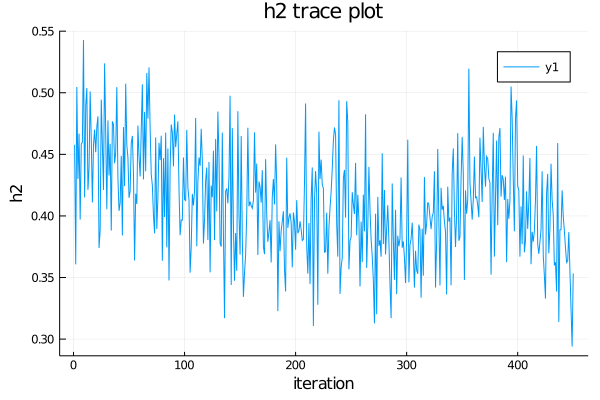

In [15]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [16]:
@time ADWD_outB,ADWD_winVarProps = GWAS("MCMC_samples_marker_effects_geno_ADWI.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    ADWD_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:23:12


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 0.0516492      │ 0.0392358   │ 2.94     │ 0.855556   │ 0.855556  │
│ 2    │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 0.0204024      │ 0.025284    │ 1.14     │ 0.677778   │ 0.766667  │
│ 3    │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 0.01941        │ 0.023502    │ 1.08     │ 0.633333   │ 0.722222  │
│ 4    │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 0.0140511      │ 0.0196552   │ 0.8      │ 0.531111   │ 0.674444  │
│ 5    │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 0.0180309      │ 0.0276756   │ 1.01     │ 0.515556   │ 0.642667  │
│ 6    │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 0.0156145      │ 0.0245613   │ 0.88     │ 0.44       │ 0.608889  │
│ 7    │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 0.0116141      │ 0.0221027   │ 0.66     │ 0.38       │ 0.57619   │
│ 8    │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 0.00791031     │ 0.0161347   │ 0.45     │ 0.371111   │ 0.550556  │
│ 9    │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 0.00747413     │ 0.0156016   │ 0.44     │ 0.366667   │ 0.530123  │
│ 10   │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 0.0085818      │ 0.0156276   │ 0.48     │ 0.364444   │ 0.513556  │
│ 11   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.0133406      │ 0.0265216   │ 0.76     │ 0.355556   │ 0.499192  │
│ 12   │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 0.00728788     │ 0.0151588   │ 0.4      │ 0.326667   │ 0.484815  │
│ 13   │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 0.00730074     │ 0.0154636   │ 0.4      │ 0.322222   │ 0.472308  │
│ 14   │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 0.00593143     │ 0.0126635   │ 0.34     │ 0.32       │ 0.461429  │
│ 15   │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 0.0078077      │ 0.0174044   │ 0.44     │ 0.317778   │ 0.451852  │
│ 16   │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 0.00811143     │ 0.0169861   │ 0.45     │ 0.308889   │ 0.442917  │
│ 17   │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 0.00473328     │ 0.0103605   │ 0.27     │ 0.306667   │ 0.434902  │
│ 18   │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 0.00645685     │ 0.0131477   │ 0.37     │ 0.304444   │ 0.427654  │
│ 19   │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 0.00519794     │ 0.0116716   │ 0.3      │ 0.291111   │ 0.420468  │
│ 20   │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 0.00447196     │ 0.0104598   │ 0.26     │ 0.291111   │ 0.414     │
│ 21   │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 0.00343014     │ 0.00775685  │ 0.2      │ 0.28       │ 0.407619  │
│ 22   │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 0.00412349     │ 0.010478    │ 0.23     │ 0.264444   │ 0.401111  │
│ 23   │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 0.00502409     │ 0.0131169   │ 0.28     │ 0.26       │ 0.394976  │
│ 24   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.00360729     │ 0.00877859  │ 0.21     │ 0.26       │ 0.389352  │
│ 25   │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.00307218     │ 0.00724246  │ 0.18     │ 0.26       │ 0.384178  │
│ 26   │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 0.00768726     │ 0.0203689   │ 0.43     │ 0.253333   │ 0.379145  │
│ 27   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 0.00463843     │ 0.0112639   │ 0.27     │ 0.251111   │ 0.374403  │
│ 28   │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.00353425     │ 0.00877548  │ 0.2      │ 0.246667   │ 0.369841  │
│ 29   │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 0.0038982      │ 0.0110559   │ 0.22     │ 0.237778   │ 0.365287  │
│ 30   │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 0.00629566     │ 0.0154216   │ 0.36     │ 0.237778   │ 0.361037  │
│ 31   │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 0.00400382     │ 0.010914    │ 0.23     │ 0.235556   │ 0.356989  │
│ 32   │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 0.00351936     │ 0.00936576  │ 0.2      │ 0.233333   │ 0.353125  │
│ 33   │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 0.00339762     │ 0.00885009  │ 0.19     │ 0.231111   │ 0.349428  │
│ 34   │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 0.00323529     │ 0.0085147   │ 0.18     │ 0.231111   │ 0.345948  │
│ 35   │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 0.00280539     │ 0.00717929  │ 0.16     │ 0.231111   │ 0.342667  │
│ 36   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 0.00400383     │ 0.0110034   │ 0.23     │ 0.228889   │ 0.339506  │
│ 37   │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 0.00355354     │ 0.00968252  │ 0.2      │ 0.226667   │ 0.336456  │
│ 38   │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 0.00354237     │ 0.0096796   │ 0.2      │ 0.226667   │ 0.333567  │
│ 39   │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 0.00259238     │ 0.00679063  │ 0.15     │ 0.224444   │ 0.330769  │
│ 40   │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 0.00323683     │ 0.00856289  │ 0.18     │ 0.222222   │ 0.328056  │
│ 41   │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 0.00234956     │ 0.0059071   │ 0.14     │ 0.217778   │ 0.325366  │
│ 42   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 0.00528068     │ 0.0156402   │ 0.28     │ 0.217778   │ 0.322804  │
│ 43   │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 0.00275324     │ 0.00852264  │ 0.16     │ 0.217778   │ 0.320362  │
│ 44   │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 0.00571466     │ 0.015522    │ 0.33     │ 0.213333   │ 0.317929  │
│ 45   │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 0.00289418     │ 0.00821242  │ 0.16     │ 0.211111   │ 0.315556  │
│ 46   │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 0.0031626      │ 0.0101741   │ 0.17     │ 0.208889   │ 0.313237  │
│ 47   │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 0.00300419     │ 0.00854556  │ 0.17     │ 0.208889   │ 0.311017  │
│ 48   │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 0.0038579      │ 0.0109497   │ 0.22     │ 0.208889   │ 0.308889  │
│ 49   │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 0.00404436     │ 0.0111094   │ 0.22     │ 0.206667   │ 0.306803  │
│ 50   │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 0.00312753     │ 0.00912907  │ 0.18     │ 0.204444   │ 0.304756  │
│ 51   │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 0.00314333     │ 0.00924907  │ 0.17     │ 0.202222   │ 0.302745  │
│ 52   │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 0.00392528     │ 0.0120664   │ 0.22     │ 0.2        │ 0.300769  │
│ 53   │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 0.00246422     │ 0.0069931   │ 0.14     │ 0.197778   │ 0.298826  │
│ 54   │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 0.00294891     │ 0.00867307  │ 0.17     │ 0.197778   │ 0.296955  │
│ 55   │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 0.00222254     │ 0.00617599  │ 0.13     │ 0.197778   │ 0.295152  │
│ 56   │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 0.00262202     │ 0.00771401  │ 0.15     │ 0.195556   │ 0.293373  │
│ 57   │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 0.00189978     │ 0.0052151   │ 0.11     │ 0.195556   │ 0.291657  │
│ 58   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 0.00211343     │ 0.00642622  │ 0.12     │ 0.193333   │ 0.289962  │
│ 59   │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 0.00340351     │ 0.0097      │ 0.2      │ 0.193333   │ 0.288324  │
│ 60   │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 0.00443062     │ 0.0151436   │ 0.25     │ 0.193333   │ 0.286741  │
│ 61   │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 0.00293413     │ 0.00810711  │ 0.17     │ 0.191111   │ 0.285173  │
│ 62   │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 0.00231781     │ 0.00653199  │ 0.13     │ 0.188889   │ 0.28362   │
│ 63   │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 0.00357708     │ 0.0103821   │ 0.2      │ 0.188889   │ 0.282116  │
│ 64   │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 0.00346439     │ 0.00982719  │ 0.2      │ 0.188889   │ 0.28066   │
│ 65   │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 0.00344716     │ 0.0109685   │ 0.19     │ 0.188889   │ 0.279248  │
│ 66   │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 0.0024232      │ 0.00674934  │ 0.14     │ 0.186667   │ 0.277845  │
│ 67   │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 0.00444358     │ 0.0134042   │ 0.25     │ 0.186667   │ 0.276484  │
│ 68   │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 0.00170716     │ 0.00501898  │ 0.1      │ 0.186667   │ 0.275163  │
│ 69   │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 0.0025918      │ 0.00755479  │ 0.14     │ 0.184444   │ 0.273849  │
│ 70   │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 0.0024989      │ 0.0080683   │ 0.14     │ 0.184444   │ 0.272571  │
│ 71   │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 0.0031977      │ 0.0105136   │ 0.18     │ 0.182222   │ 0.271299  │
│ 72   │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 0.00349624     │ 0.0104541   │ 0.19     │ 0.182222   │ 0.270062  │
│ 73   │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 0.00241204     │ 0.00804405  │ 0.14     │ 0.182222   │ 0.268858  │
│ 74   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 0.00209176     │ 0.00668829  │ 0.12     │ 0.18       │ 0.267658  │
│ 75   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.00263003     │ 0.00854817  │ 0.15     │ 0.18       │ 0.266489  │
│ 76   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.00268227     │ 0.00787037  │ 0.16     │ 0.18       │ 0.265351  │
│ 77   │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 0.00221679     │ 0.00666206  │ 0.12     │ 0.18       │ 0.264242  │
│ 78   │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 0.0022652      │ 0.0079119   │ 0.13     │ 0.18       │ 0.263162  │
│ 79   │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 0.00205565     │ 0.0063157   │ 0.12     │ 0.177778   │ 0.262082  │
│ 80   │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 0.00261812     │ 0.0102496   │ 0.15     │ 0.177778   │ 0.261028  │
│ 81   │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 0.00218789     │ 0.00807587  │ 0.12     │ 0.177778   │ 0.26      │
│ 82   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 0.00205087     │ 0.00609783  │ 0.12     │ 0.175556   │ 0.25897   │
│ 83   │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 0.00233529     │ 0.00701759  │ 0.14     │ 0.175556   │ 0.257965  │
│ 84   │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 0.00198078     │ 0.00610054  │ 0.11     │ 0.173333   │ 0.256958  │
│ 85   │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 0.00248322     │ 0.00799756  │ 0.14     │ 0.173333   │ 0.255974  │
│ 86   │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 0.00272288     │ 0.00798986  │ 0.16     │ 0.171111   │ 0.254987  │
│ 87   │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 0.00184547     │ 0.00593855  │ 0.1      │ 0.171111   │ 0.254023  │
│ 88   │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 0.00212975     │ 0.00663881  │ 0.12     │ 0.171111   │ 0.253081  │
│ 89   │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 0.00426865     │ 0.0127561   │ 0.24     │ 0.171111   │ 0.25216   │
│ 90   │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 0.00250842     │ 0.00791113  │ 0.14     │ 0.168889   │ 0.251235  │
│ 91   │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 0.00154659     │ 0.00452156  │ 0.09     │ 0.168889   │ 0.25033   │
│ 92   │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 0.00210489     │ 0.00655194  │ 0.12     │ 0.168889   │ 0.249444  │
│ 93   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 0.00183868     │ 0.0056177   │ 0.11     │ 0.168889   │ 0.248578  │
│ 94   │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 0.00160646     │ 0.00508315  │ 0.09     │ 0.168889   │ 0.24773   │
│ 95   │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 0.00172354     │ 0.00512741  │ 0.1      │ 0.168889   │ 0.246901  │
│ 96   │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 0.00199609     │ 0.00615702  │ 0.11     │ 0.166667   │ 0.246065  │
│ 97   │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 0.00215035     │ 0.00732965  │ 0.12     │ 0.166667   │ 0.245246  │
│ 98   │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 0.00279468     │ 0.00881023  │ 0.16     │ 0.166667   │ 0.244444  │
│ 99   │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 0.00176283     │ 0.00598593  │ 0.1      │ 0.166667   │ 0.243659  │
│ 100  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 0.00253965     │ 0.00871542  │ 0.14     │ 0.166667   │ 0.242889  │
│ 101  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 0.00205395     │ 0.00680818  │ 0.11     │ 0.166667   │ 0.242134  │
│ 102  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 0.00219934     │ 0.00793735  │ 0.13     │ 0.164444   │ 0.241373  │
│ 103  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 0.0017183      │ 0.00522882  │ 0.1      │ 0.164444   │ 0.240626  │
│ 104  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 0.00225737     │ 0.00743439  │ 0.13     │ 0.164444   │ 0.239893  │
│ 105  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00257393     │ 0.00975535  │ 0.15     │ 0.164444   │ 0.239175  │
│ 106  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 0.00158934     │ 0.00539025  │ 0.09     │ 0.164444   │ 0.23847   │
│ 107  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 0.00142102     │ 0.00481679  │ 0.08     │ 0.162222   │ 0.237757  │
│ 108  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 0.00197364     │ 0.00701073  │ 0.11     │ 0.162222   │ 0.237058  │
│ 109  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 0.00174695     │ 0.00644779  │ 0.1      │ 0.162222   │ 0.236371  │
│ 110  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 0.00203079     │ 0.00650984  │ 0.12     │ 0.162222   │ 0.235697  │
│ 111  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 0.00229452     │ 0.00832835  │ 0.13     │ 0.162222   │ 0.235035  │
│ 112  │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 0.00267052     │ 0.00859423  │ 0.15     │ 0.162222   │ 0.234385  │
│ 113  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 0.00222839     │ 0.00723962  │ 0.13     │ 0.162222   │ 0.233746  │
│ 114  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 0.00255615     │ 0.00803728  │ 0.15     │ 0.16       │ 0.233099  │
│ 115  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 0.00183429     │ 0.00602202  │ 0.11     │ 0.16       │ 0.232464  │
│ 116  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 0.00194146     │ 0.00708911  │ 0.11     │ 0.157778   │ 0.23182   │
│ 117  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 0.00202961     │ 0.00747385  │ 0.11     │ 0.157778   │ 0.231187  │
│ 118  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 0.00192816     │ 0.00688769  │ 0.11     │ 0.157778   │ 0.230565  │
│ 119  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 0.00257325     │ 0.00796871  │ 0.15     │ 0.157778   │ 0.229953  │
│ 120  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 0.00179515     │ 0.0063834   │ 0.1      │ 0.157778   │ 0.229352  │
│ 121  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 0.00186085     │ 0.00597372  │ 0.1      │ 0.157778   │ 0.22876   │
│ 122  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 0.0014817      │ 0.0045485   │ 0.09     │ 0.157778   │ 0.228179  │
│ 123  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 0.00155067     │ 0.00458205  │ 0.09     │ 0.157778   │ 0.227606  │
│ 124  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 0.00305307     │ 0.0124242   │ 0.18     │ 0.155556   │ 0.227025  │
│ 125  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 0.00171627     │ 0.00622834  │ 0.1      │ 0.155556   │ 0.226453  │
│ 126  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 0.00291453     │ 0.00898368  │ 0.17     │ 0.155556   │ 0.225891  │
│ 127  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 0.00135908     │ 0.00402017  │ 0.08     │ 0.155556   │ 0.225337  │
│ 128  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 0.00165012     │ 0.00586194  │ 0.09     │ 0.155556   │ 0.224792  │
│ 129  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 0.0017991      │ 0.00574183  │ 0.1      │ 0.155556   │ 0.224255  │
│ 130  │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 0.00195014     │ 0.00717397  │ 0.11     │ 0.155556   │ 0.223726  │
│ 131  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 0.00215487     │ 0.00773018  │ 0.13     │ 0.155556   │ 0.223206  │
│ 132  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 0.00120645     │ 0.00344546  │ 0.07     │ 0.155556   │ 0.222694  │
│ 133  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 0.00213107     │ 0.00715246  │ 0.12     │ 0.153333   │ 0.222172  │
│ 134  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 0.00233119     │ 0.00833138  │ 0.13     │ 0.153333   │ 0.221658  │
│ 135  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 0.00158938     │ 0.00540398  │ 0.09     │ 0.153333   │ 0.221152  │
│ 136  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 0.00159193     │ 0.00506073  │ 0.09     │ 0.153333   │ 0.220654  │
│ 137  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 0.00155365     │ 0.00599361  │ 0.09     │ 0.153333   │ 0.220162  │
│ 138  │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 0.00166681     │ 0.00554812  │ 0.1      │ 0.153333   │ 0.219678  │
│ 139  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 0.00215582     │ 0.00829536  │ 0.12     │ 0.153333   │ 0.219201  │
│ 140  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 0.00191214     │ 0.00642991  │ 0.11     │ 0.151111   │ 0.218714  │
│ 141  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 0.00208178     │ 0.00747961  │ 0.12     │ 0.151111   │ 0.218235  │
│ 142  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 0.00194688     │ 0.00635145  │ 0.11     │ 0.151111   │ 0.217762  │
│ 143  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 0.00145725     │ 0.00498627  │ 0.09     │ 0.151111   │ 0.217296  │
│ 144  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 0.00202471     │ 0.00651108  │ 0.12     │ 0.151111   │ 0.216836  │
│ 145  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 0.0025654      │ 0.00835483  │ 0.15     │ 0.151111   │ 0.216383  │
│ 146  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 0.00148758     │ 0.00446555  │ 0.08     │ 0.151111   │ 0.215936  │
│ 147  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 0.0012305      │ 0.00396064  │ 0.07     │ 0.151111   │ 0.215495  │
│ 148  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 0.00182343     │ 0.00593266  │ 0.11     │ 0.151111   │ 0.21506   │
│ 149  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 0.00233868     │ 0.00903224  │ 0.13     │ 0.151111   │ 0.214631  │
│ 150  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 0.00147514     │ 0.00462665  │ 0.08     │ 0.148889   │ 0.214193  │
│ 151  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 0.00200417     │ 0.00723885  │ 0.11     │ 0.148889   │ 0.21376   │
│ 152  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 0.00155059     │ 0.00526222  │ 0.09     │ 0.148889   │ 0.213333  │
│ 153  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 0.00133196     │ 0.00416518  │ 0.08     │ 0.148889   │ 0.212912  │
│ 154  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 0.00149501     │ 0.00478129  │ 0.09     │ 0.148889   │ 0.212496  │
│ 155  │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 0.00182644     │ 0.00643075  │ 0.1      │ 0.148889   │ 0.212086  │
│ 156  │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 0.00190683     │ 0.00649068  │ 0.11     │ 0.148889   │ 0.211681  │
│ 157  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 0.00262373     │ 0.00969711  │ 0.14     │ 0.146667   │ 0.211267  │
│ 158  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 0.00167078     │ 0.00546647  │ 0.09     │ 0.146667   │ 0.210858  │
│ 159  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 0.00171887     │ 0.00611753  │ 0.09     │ 0.146667   │ 0.210454  │
│ 160  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 0.00162083     │ 0.00526627  │ 0.09     │ 0.146667   │ 0.210056  │
│ 161  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 0.00182716     │ 0.00641165  │ 0.1      │ 0.146667   │ 0.209662  │
│ 162  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 0.00169377     │ 0.00640112  │ 0.09     │ 0.146667   │ 0.209273  │
│ 163  │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 0.00225562     │ 0.0079246   │ 0.13     │ 0.146667   │ 0.208889  │
│ 164  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 0.00156098     │ 0.00562446  │ 0.09     │ 0.146667   │ 0.208509  │
│ 165  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 0.00145625     │ 0.00467583  │ 0.08     │ 0.146667   │ 0.208135  │
│ 166  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 0.00127748     │ 0.00406263  │ 0.08     │ 0.146667   │ 0.207764  │
│ 167  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 0.00158849     │ 0.00563566  │ 0.09     │ 0.144444   │ 0.207385  │
│ 168  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 0.00169043     │ 0.00585132  │ 0.09     │ 0.144444   │ 0.207011  │
│ 169  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 0.00117389     │ 0.00388167  │ 0.07     │ 0.144444   │ 0.20664   │
│ 170  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 0.00246461     │ 0.00884834  │ 0.14     │ 0.144444   │ 0.206275  │
│ 171  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 0.00165966     │ 0.00537015  │ 0.09     │ 0.144444   │ 0.205913  │
│ 172  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 0.00108442     │ 0.0034325   │ 0.06     │ 0.142222   │ 0.205543  │
│ 173  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 0.00126354     │ 0.00395965  │ 0.07     │ 0.142222   │ 0.205177  │
│ 174  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 0.00168061     │ 0.00660939  │ 0.1      │ 0.142222   │ 0.204815  │
│ 175  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 0.00178022     │ 0.00610729  │ 0.1      │ 0.142222   │ 0.204457  │
│ 176  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 0.001798       │ 0.00695492  │ 0.1      │ 0.142222   │ 0.204104  │
│ 177  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 0.00124382     │ 0.00407799  │ 0.07     │ 0.142222   │ 0.203754  │
│ 178  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 0.00142074     │ 0.00511199  │ 0.08     │ 0.142222   │ 0.203408  │
│ 179  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 0.00135968     │ 0.00456928  │ 0.08     │ 0.142222   │ 0.203066  │
│ 180  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 0.00244892     │ 0.0110799   │ 0.13     │ 0.14       │ 0.202716  │
│ 181  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 0.0020299      │ 0.00684214  │ 0.12     │ 0.14       │ 0.20237   │
│ 182  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 0.00163979     │ 0.00560461  │ 0.09     │ 0.14       │ 0.202027  │
│ 183  │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 0.00157137     │ 0.00626985  │ 0.09     │ 0.14       │ 0.201688  │
│ 184  │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 0.00127625     │ 0.00436197  │ 0.07     │ 0.14       │ 0.201353  │
│ 185  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 0.00153911     │ 0.00606963  │ 0.09     │ 0.14       │ 0.201021  │
│ 186  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 0.00186178     │ 0.00662613  │ 0.11     │ 0.14       │ 0.200693  │
│ 187  │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.00174203     │ 0.00617951  │ 0.1      │ 0.14       │ 0.200368  │
│ 188  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.00113828     │ 0.00388166  │ 0.07     │ 0.14       │ 0.200047  │
│ 189  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 0.0012954      │ 0.00440252  │ 0.07     │ 0.14       │ 0.19973   │
│ 190  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 0.00153674     │ 0.00477412  │ 0.09     │ 0.14       │ 0.199415  │
│ 191  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 0.00151459     │ 0.00537709  │ 0.08     │ 0.14       │ 0.199104  │
│ 192  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 0.00127013     │ 0.00436033  │ 0.07     │ 0.14       │ 0.198796  │
│ 193  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 0.0011201      │ 0.00356012  │ 0.06     │ 0.14       │ 0.198492  │
│ 194  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 0.00211605     │ 0.00854006  │ 0.11     │ 0.137778   │ 0.198179  │
│ 195  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 0.00137519     │ 0.00545722  │ 0.07     │ 0.137778   │ 0.197869  │
│ 196  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 0.00156787     │ 0.00638746  │ 0.09     │ 0.137778   │ 0.197562  │
│ 197  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 0.00132859     │ 0.00464142  │ 0.07     │ 0.137778   │ 0.197259  │
│ 198  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 0.00161898     │ 0.0055737   │ 0.09     │ 0.137778   │ 0.196958  │
│ 199  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.00158996     │ 0.00514809  │ 0.09     │ 0.137778   │ 0.196661  │
│ 200  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 0.00129578     │ 0.00436328  │ 0.07     │ 0.137778   │ 0.196367  │
│ 201  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 0.00151781     │ 0.00560583  │ 0.09     │ 0.137778   │ 0.196075  │
│ 202  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 0.00176199     │ 0.00609377  │ 0.1      │ 0.135556   │ 0.195776  │
│ 203  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 0.00143878     │ 0.00525802  │ 0.09     │ 0.135556   │ 0.195479  │
│ 204  │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 0.00153145     │ 0.00542797  │ 0.09     │ 0.135556   │ 0.195185  │
│ 205  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 0.00147803     │ 0.00552913  │ 0.09     │ 0.135556   │ 0.194894  │
│ 206  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 0.00144366     │ 0.00478114  │ 0.08     │ 0.135556   │ 0.194606  │
│ 207  │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 0.00150514     │ 0.00612988  │ 0.09     │ 0.135556   │ 0.194321  │
│ 208  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 0.00122727     │ 0.00423284  │ 0.07     │ 0.135556   │ 0.194038  │
│ 209  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 0.00114457     │ 0.00387352  │ 0.07     │ 0.135556   │ 0.193759  │
│ 210  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 0.00194896     │ 0.00666051  │ 0.11     │ 0.133333   │ 0.193471  │
│ 211  │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 0.00286237     │ 0.0112027   │ 0.16     │ 0.133333   │ 0.193186  │
│ 212  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.00116783     │ 0.00402272  │ 0.07     │ 0.133333   │ 0.192904  │
│ 213  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 0.00143548     │ 0.00495601  │ 0.08     │ 0.133333   │ 0.192624  │
│ 214  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 0.00145549     │ 0.00504706  │ 0.08     │ 0.133333   │ 0.192347  │
│ 215  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 0.00189015     │ 0.00618208  │ 0.1      │ 0.133333   │ 0.192072  │
│ 216  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 0.00202204     │ 0.00770308  │ 0.11     │ 0.133333   │ 0.1918    │
│ 217  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 0.0012708      │ 0.0043035   │ 0.07     │ 0.133333   │ 0.191531  │
│ 218  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 0.00149074     │ 0.00610626  │ 0.09     │ 0.133333   │ 0.191264  │
│ 219  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 0.00131373     │ 0.00508184  │ 0.08     │ 0.133333   │ 0.190999  │
│ 220  │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 0.00129199     │ 0.00449928  │ 0.08     │ 0.133333   │ 0.190737  │
│ 221  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 0.00151411     │ 0.00597261  │ 0.09     │ 0.133333   │ 0.190478  │
│ 222  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 0.00162541     │ 0.00571423  │ 0.09     │ 0.133333   │ 0.19022   │
│ 223  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 0.00201833     │ 0.00873562  │ 0.12     │ 0.133333   │ 0.189965  │
│ 224  │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 0.00215661     │ 0.00734909  │ 0.12     │ 0.131111   │ 0.189702  │
│ 225  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 0.00131382     │ 0.00419088  │ 0.07     │ 0.131111   │ 0.189442  │
│ 226  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 0.00115641     │ 0.0041092   │ 0.06     │ 0.131111   │ 0.189184  │
│ 227  │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 0.00105702     │ 0.00375382  │ 0.06     │ 0.131111   │ 0.188928  │
│ 228  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 0.00167012     │ 0.00611749  │ 0.1      │ 0.131111   │ 0.188674  │
│ 229  │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 0.00184393     │ 0.00706834  │ 0.1      │ 0.131111   │ 0.188423  │
│ 230  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 0.00128514     │ 0.00419195  │ 0.07     │ 0.131111   │ 0.188174  │
│ 231  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 0.00131737     │ 0.00424992  │ 0.07     │ 0.131111   │ 0.187927  │
│ 232  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 0.00161176     │ 0.00651642  │ 0.09     │ 0.131111   │ 0.187682  │
│ 233  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 0.000967901    │ 0.00317094  │ 0.05     │ 0.128889   │ 0.18743   │
│ 234  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 0.00187855     │ 0.00745287  │ 0.11     │ 0.128889   │ 0.187179  │
│ 235  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 0.00221247     │ 0.00857629  │ 0.12     │ 0.128889   │ 0.186931  │
│ 236  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 0.00107435     │ 0.00403177  │ 0.06     │ 0.128889   │ 0.186685  │
│ 237  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 0.000956099    │ 0.00290582  │ 0.05     │ 0.128889   │ 0.186442  │
│ 238  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 0.00137679     │ 0.00520778  │ 0.08     │ 0.128889   │ 0.1862    │
│ 239  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 0.00126888     │ 0.00434078  │ 0.07     │ 0.128889   │ 0.18596   │
│ 240  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 0.000933495    │ 0.0030792   │ 0.05     │ 0.128889   │ 0.185722  │
│ 241  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 0.00087512     │ 0.00270452  │ 0.05     │ 0.128889   │ 0.185486  │
│ 242  │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 0.00207955     │ 0.00731232  │ 0.11     │ 0.128889   │ 0.185253  │
│ 243  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 0.00162222     │ 0.00667881  │ 0.09     │ 0.128889   │ 0.185021  │
│ 244  │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 0.00128648     │ 0.00463817  │ 0.07     │ 0.126667   │ 0.184781  │
│ 245  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 0.00135949     │ 0.00497879  │ 0.08     │ 0.126667   │ 0.184544  │
│ 246  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 0.00120143     │ 0.00469002  │ 0.07     │ 0.126667   │ 0.184309  │
│ 247  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 0.00108962     │ 0.00370067  │ 0.06     │ 0.126667   │ 0.184076  │
│ 248  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 0.0015448      │ 0.00562995  │ 0.09     │ 0.126667   │ 0.183844  │
│ 249  │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 0.00138906     │ 0.00616956  │ 0.08     │ 0.126667   │ 0.183614  │
│ 250  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 0.00150293     │ 0.00473726  │ 0.09     │ 0.126667   │ 0.183387  │
│ 251  │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 0.00180037     │ 0.00686301  │ 0.1      │ 0.126667   │ 0.183161  │
│ 252  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 0.00170979     │ 0.00653831  │ 0.1      │ 0.126667   │ 0.182937  │
│ 253  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 0.0016069      │ 0.00591635  │ 0.09     │ 0.126667   │ 0.182714  │
│ 254  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 0.000903361    │ 0.00300738  │ 0.05     │ 0.126667   │ 0.182493  │
│ 255  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 0.0014313      │ 0.00568104  │ 0.08     │ 0.126667   │ 0.182275  │
│ 256  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 0.00124104     │ 0.00480134  │ 0.07     │ 0.126667   │ 0.182057  │
│ 257  │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 0.00238343     │ 0.00861905  │ 0.13     │ 0.126667   │ 0.181842  │
│ 258  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 0.00147707     │ 0.00545655  │ 0.08     │ 0.126667   │ 0.181628  │
│ 259  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 0.00128688     │ 0.00442074  │ 0.07     │ 0.124444   │ 0.181407  │
│ 260  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 0.00147849     │ 0.00535284  │ 0.08     │ 0.124444   │ 0.181188  │
│ 261  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 0.001364       │ 0.00505667  │ 0.08     │ 0.124444   │ 0.180971  │
│ 262  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 0.000947685    │ 0.00310376  │ 0.05     │ 0.124444   │ 0.180755  │
│ 263  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 0.00135588     │ 0.00506486  │ 0.08     │ 0.124444   │ 0.180541  │
│ 264  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 0.00175059     │ 0.00659161  │ 0.1      │ 0.124444   │ 0.180328  │
│ 265  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.00141747     │ 0.00579725  │ 0.08     │ 0.124444   │ 0.180117  │
│ 266  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 0.00125297     │ 0.00471626  │ 0.07     │ 0.124444   │ 0.179908  │
│ 267  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 0.00138699     │ 0.0049236   │ 0.08     │ 0.124444   │ 0.1797    │
│ 268  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 0.00148046     │ 0.00568609  │ 0.08     │ 0.124444   │ 0.179494  │
│ 269  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 0.00122877     │ 0.00452619  │ 0.07     │ 0.124444   │ 0.17929   │
│ 270  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 0.00110724     │ 0.00406755  │ 0.06     │ 0.124444   │ 0.179086  │
│ 271  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 0.00102637     │ 0.00382071  │ 0.06     │ 0.124444   │ 0.178885  │
│ 272  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 0.00134868     │ 0.00452462  │ 0.08     │ 0.124444   │ 0.178685  │
│ 273  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 0.00130036     │ 0.00446473  │ 0.07     │ 0.124444   │ 0.178486  │
│ 274  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 0.00123087     │ 0.00431624  │ 0.07     │ 0.124444   │ 0.178289  │
│ 275  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 0.000998316    │ 0.0029749   │ 0.06     │ 0.124444   │ 0.178093  │
│ 276  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 0.00133851     │ 0.00500232  │ 0.08     │ 0.124444   │ 0.177899  │
│ 277  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 0.000872593    │ 0.00277391  │ 0.05     │ 0.122222   │ 0.177698  │
│ 278  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 0.00150811     │ 0.00579291  │ 0.09     │ 0.122222   │ 0.177498  │
│ 279  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 0.00126753     │ 0.00529451  │ 0.07     │ 0.122222   │ 0.1773    │
│ 280  │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 0.00218929     │ 0.00795058  │ 0.12     │ 0.122222   │ 0.177103  │
│ 281  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 0.000809916    │ 0.00272141  │ 0.05     │ 0.122222   │ 0.176908  │
│ 282  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 0.00127502     │ 0.00483786  │ 0.07     │ 0.122222   │ 0.176714  │
│ 283  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 0.00142177     │ 0.00564848  │ 0.08     │ 0.122222   │ 0.176521  │
│ 284  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.00110453     │ 0.00398546  │ 0.06     │ 0.122222   │ 0.17633   │
│ 285  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 0.0015499      │ 0.0060254   │ 0.09     │ 0.122222   │ 0.17614   │
│ 286  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 0.00122112     │ 0.0042634   │ 0.07     │ 0.122222   │ 0.175952  │
│ 287  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 0.000920461    │ 0.00331775  │ 0.05     │ 0.122222   │ 0.175765  │
│ 288  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 0.00109613     │ 0.00457283  │ 0.06     │ 0.122222   │ 0.175579  │
│ 289  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 0.00161134     │ 0.0065263   │ 0.09     │ 0.122222   │ 0.175394  │
│ 290  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 0.00154807     │ 0.00579888  │ 0.08     │ 0.122222   │ 0.175211  │
│ 291  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 0.00101291     │ 0.00340806  │ 0.06     │ 0.122222   │ 0.175029  │
│ 292  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 0.00126863     │ 0.00478857  │ 0.07     │ 0.122222   │ 0.174848  │
│ 293  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 0.000927214    │ 0.0030758   │ 0.05     │ 0.122222   │ 0.174668  │
│ 294  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 0.0013312      │ 0.00520746  │ 0.07     │ 0.122222   │ 0.17449   │
│ 295  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 0.00142239     │ 0.00551942  │ 0.08     │ 0.122222   │ 0.174313  │
│ 296  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 0.00148498     │ 0.00643038  │ 0.08     │ 0.122222   │ 0.174137  │
│ 297  │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 0.00133415     │ 0.00486488  │ 0.08     │ 0.122222   │ 0.173962  │
│ 298  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 0.00106035     │ 0.00366149  │ 0.06     │ 0.12       │ 0.173781  │
│ 299  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 0.00122969     │ 0.00461717  │ 0.07     │ 0.12       │ 0.173601  │
│ 300  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 0.00114155     │ 0.00433651  │ 0.07     │ 0.12       │ 0.173422  │
│ 301  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 0.00149596     │ 0.00698782  │ 0.08     │ 0.12       │ 0.173245  │
│ 302  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 0.00112313     │ 0.00384463  │ 0.07     │ 0.12       │ 0.173068  │
│ 303  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 0.00116836     │ 0.00404245  │ 0.07     │ 0.12       │ 0.172893  │
│ 304  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.00124731     │ 0.00503841  │ 0.07     │ 0.12       │ 0.172719  │
│ 305  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 0.00152813     │ 0.00624749  │ 0.09     │ 0.12       │ 0.172546  │
│ 306  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 0.00122359     │ 0.00474245  │ 0.07     │ 0.12       │ 0.172375  │
│ 307  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 0.0012012      │ 0.0041422   │ 0.07     │ 0.12       │ 0.172204  │
│ 308  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 0.00111698     │ 0.00451214  │ 0.06     │ 0.12       │ 0.172035  │
│ 309  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 0.00102895     │ 0.00370889  │ 0.06     │ 0.12       │ 0.171866  │
│ 310  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 0.00177016     │ 0.00656003  │ 0.1      │ 0.117778   │ 0.171692  │
│ 311  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 0.00115692     │ 0.00438485  │ 0.07     │ 0.117778   │ 0.171518  │
│ 312  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 0.00128454     │ 0.00505104  │ 0.07     │ 0.117778   │ 0.171346  │
│ 313  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 0.00107362     │ 0.00423622  │ 0.06     │ 0.117778   │ 0.171175  │
│ 314  │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 0.00157706     │ 0.00594579  │ 0.09     │ 0.117778   │ 0.171005  │
│ 315  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 0.00134626     │ 0.0048861   │ 0.08     │ 0.117778   │ 0.170836  │
│ 316  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 0.00118636     │ 0.00430363  │ 0.07     │ 0.117778   │ 0.170668  │
│ 317  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 0.00107869     │ 0.0039304   │ 0.06     │ 0.117778   │ 0.170501  │
│ 318  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 0.000894794    │ 0.00309837  │ 0.05     │ 0.117778   │ 0.170335  │
│ 319  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 0.00232632     │ 0.00855055  │ 0.13     │ 0.117778   │ 0.170171  │
│ 320  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 0.00105337     │ 0.00365468  │ 0.06     │ 0.117778   │ 0.170007  │
│ 321  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 0.000783228    │ 0.00251155  │ 0.05     │ 0.117778   │ 0.169844  │
│ 322  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 0.00103339     │ 0.00419512  │ 0.06     │ 0.117778   │ 0.169683  │
│ 323  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 0.00110137     │ 0.00391069  │ 0.06     │ 0.117778   │ 0.169522  │
│ 324  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 0.00106997     │ 0.00356134  │ 0.06     │ 0.117778   │ 0.169362  │
│ 325  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 0.00129693     │ 0.00487834  │ 0.07     │ 0.117778   │ 0.169203  │
│ 326  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 0.00119488     │ 0.00443429  │ 0.07     │ 0.117778   │ 0.169046  │
│ 327  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 0.00115375     │ 0.00428551  │ 0.07     │ 0.117778   │ 0.168889  │
│ 328  │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 0.00162877     │ 0.00570775  │ 0.09     │ 0.117778   │ 0.168733  │
│ 329  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 0.000751393    │ 0.00230774  │ 0.04     │ 0.117778   │ 0.168578  │
│ 330  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 0.00128154     │ 0.00571323  │ 0.07     │ 0.117778   │ 0.168424  │
│ 331  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 0.00107212     │ 0.00353242  │ 0.06     │ 0.115556   │ 0.168265  │
│ 332  │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 0.00110462     │ 0.00390619  │ 0.06     │ 0.115556   │ 0.168106  │
│ 333  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 0.00103637     │ 0.00386051  │ 0.06     │ 0.115556   │ 0.167948  │
│ 334  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 0.00180782     │ 0.00895401  │ 0.1      │ 0.115556   │ 0.167791  │
│ 335  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 0.00152282     │ 0.00523476  │ 0.09     │ 0.115556   │ 0.167635  │
│ 336  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 0.00115153     │ 0.00422444  │ 0.06     │ 0.115556   │ 0.16748   │
│ 337  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 0.00119579     │ 0.00488224  │ 0.07     │ 0.115556   │ 0.167326  │
│ 338  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 0.00135641     │ 0.00477963  │ 0.08     │ 0.115556   │ 0.167173  │
│ 339  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 0.00097307     │ 0.00319374  │ 0.05     │ 0.115556   │ 0.167021  │
│ 340  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 0.00108439     │ 0.00419233  │ 0.06     │ 0.115556   │ 0.166869  │
│ 341  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 0.000751053    │ 0.00245471  │ 0.04     │ 0.115556   │ 0.166719  │
│ 342  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 0.00114806     │ 0.0042277   │ 0.07     │ 0.115556   │ 0.166569  │
│ 343  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 0.000897353    │ 0.00306819  │ 0.05     │ 0.115556   │ 0.16642   │
│ 344  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 0.00134885     │ 0.00536429  │ 0.07     │ 0.115556   │ 0.166273  │
│ 345  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 0.00137664     │ 0.00610208  │ 0.08     │ 0.115556   │ 0.166126  │
│ 346  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 0.00116042     │ 0.00388967  │ 0.06     │ 0.115556   │ 0.165979  │
│ 347  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 0.00129261     │ 0.00512652  │ 0.07     │ 0.115556   │ 0.165834  │
│ 348  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 0.00157271     │ 0.00602869  │ 0.09     │ 0.115556   │ 0.16569   │
│ 349  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 0.000948091    │ 0.00348369  │ 0.05     │ 0.113333   │ 0.16554   │
│ 350  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 0.00101822     │ 0.00468949  │ 0.06     │ 0.113333   │ 0.16539   │
│ 351  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 0.00137314     │ 0.00528047  │ 0.08     │ 0.113333   │ 0.165242  │
│ 352  │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 0.00111291     │ 0.00401696  │ 0.07     │ 0.113333   │ 0.165095  │
│ 353  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 0.00144423     │ 0.00625156  │ 0.09     │ 0.113333   │ 0.164948  │
│ 354  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 0.00133906     │ 0.00455311  │ 0.08     │ 0.113333   │ 0.164802  │
│ 355  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 0.00135042     │ 0.00534663  │ 0.08     │ 0.113333   │ 0.164657  │
│ 356  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 0.000823232    │ 0.00284887  │ 0.05     │ 0.113333   │ 0.164513  │
│ 357  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 0.00109761     │ 0.00386285  │ 0.06     │ 0.113333   │ 0.16437   │
│ 358  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 0.00124127     │ 0.00519082  │ 0.07     │ 0.113333   │ 0.164227  │
│ 359  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 0.00182443     │ 0.00669348  │ 0.1      │ 0.113333   │ 0.164085  │
│ 360  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 0.00093581     │ 0.00312917  │ 0.05     │ 0.113333   │ 0.163944  │
│ 361  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 0.00102577     │ 0.00391156  │ 0.06     │ 0.113333   │ 0.163804  │
│ 362  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 0.000711699    │ 0.00216744  │ 0.04     │ 0.113333   │ 0.163665  │
│ 363  │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 0.0012268      │ 0.0047512   │ 0.07     │ 0.113333   │ 0.163526  │
│ 364  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 0.00154187     │ 0.00625377  │ 0.08     │ 0.113333   │ 0.163388  │
│ 365  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 0.000898954    │ 0.00287495  │ 0.05     │ 0.113333   │ 0.163251  │
│ 366  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 0.000981886    │ 0.00348792  │ 0.06     │ 0.113333   │ 0.163115  │
│ 367  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 0.00120671     │ 0.00473493  │ 0.07     │ 0.113333   │ 0.162979  │
│ 368  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 0.00101629     │ 0.0042541   │ 0.06     │ 0.111111   │ 0.162838  │
│ 369  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 0.00135579     │ 0.00566947  │ 0.08     │ 0.111111   │ 0.162698  │
│ 370  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 0.000952336    │ 0.00353196  │ 0.05     │ 0.111111   │ 0.162559  │
│ 371  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 0.000845774    │ 0.00314981  │ 0.05     │ 0.111111   │ 0.16242   │
│ 372  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 0.00133011     │ 0.00517001  │ 0.07     │ 0.111111   │ 0.162282  │
│ 373  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 0.00101282     │ 0.00365446  │ 0.06     │ 0.111111   │ 0.162145  │
│ 374  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 0.00120488     │ 0.00477594  │ 0.06     │ 0.111111   │ 0.162008  │
│ 375  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 0.00120919     │ 0.0049824   │ 0.07     │ 0.111111   │ 0.161873  │
│ 376  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 0.000995259    │ 0.00354323  │ 0.06     │ 0.111111   │ 0.161738  │
│ 377  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 0.000933326    │ 0.00353994  │ 0.05     │ 0.111111   │ 0.161603  │
│ 378  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 0.000705233    │ 0.00230727  │ 0.04     │ 0.111111   │ 0.16147   │
│ 379  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 0.00140712     │ 0.00573848  │ 0.08     │ 0.111111   │ 0.161337  │
│ 380  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 0.0014177      │ 0.00584036  │ 0.08     │ 0.111111   │ 0.161205  │
│ 381  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 0.00103193     │ 0.00410322  │ 0.06     │ 0.111111   │ 0.161073  │
│ 382  │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 0.00119851     │ 0.00446325  │ 0.07     │ 0.111111   │ 0.160942  │
│ 383  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 0.00126086     │ 0.00473803  │ 0.07     │ 0.111111   │ 0.160812  │
│ 384  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 0.00101076     │ 0.00364339  │ 0.06     │ 0.111111   │ 0.160683  │
│ 385  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 0.000988072    │ 0.00408688  │ 0.06     │ 0.111111   │ 0.160554  │
│ 386  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 0.000854193    │ 0.00400119  │ 0.05     │ 0.111111   │ 0.160426  │
│ 387  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 0.00131507     │ 0.00644518  │ 0.08     │ 0.111111   │ 0.160299  │
│ 388  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 0.00130068     │ 0.00491074  │ 0.07     │ 0.111111   │ 0.160172  │
│ 389  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 0.000745766    │ 0.00238677  │ 0.04     │ 0.111111   │ 0.160046  │
│ 390  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 0.00109085     │ 0.00447582  │ 0.06     │ 0.108889   │ 0.159915  │
│ 391  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 0.000892995    │ 0.0032441   │ 0.05     │ 0.108889   │ 0.159784  │
│ 392  │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 0.000977803    │ 0.00376335  │ 0.05     │ 0.108889   │ 0.159654  │
│ 393  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 0.000855577    │ 0.00362592  │ 0.05     │ 0.108889   │ 0.159525  │
│ 394  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 0.000832891    │ 0.00302268  │ 0.05     │ 0.108889   │ 0.159397  │
│ 395  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 0.00131575     │ 0.00548044  │ 0.07     │ 0.108889   │ 0.159269  │
│ 396  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 0.000943679    │ 0.00327563  │ 0.05     │ 0.108889   │ 0.159141  │
│ 397  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 0.00140042     │ 0.00534077  │ 0.08     │ 0.108889   │ 0.159015  │
│ 398  │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 0.00137968     │ 0.00604559  │ 0.08     │ 0.108889   │ 0.158889  │
│ 399  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 0.000979528    │ 0.00382612  │ 0.06     │ 0.108889   │ 0.158764  │
│ 400  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 0.000913126    │ 0.00325258  │ 0.05     │ 0.108889   │ 0.158639  │
│ 401  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 0.000987061    │ 0.00328201  │ 0.06     │ 0.108889   │ 0.158515  │
│ 402  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 0.00132694     │ 0.00559731  │ 0.08     │ 0.108889   │ 0.158391  │
│ 403  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 0.00112754     │ 0.00456314  │ 0.06     │ 0.108889   │ 0.158269  │
│ 404  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 0.00137667     │ 0.00601439  │ 0.08     │ 0.108889   │ 0.158146  │
│ 405  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 0.000841206    │ 0.00329817  │ 0.05     │ 0.108889   │ 0.158025  │
│ 406  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 0.00150695     │ 0.00622885  │ 0.09     │ 0.108889   │ 0.157904  │
│ 407  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 0.000807929    │ 0.00325269  │ 0.05     │ 0.108889   │ 0.157783  │
│ 408  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 0.000820464    │ 0.00280156  │ 0.05     │ 0.108889   │ 0.157663  │
│ 409  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 0.000942003    │ 0.00353031  │ 0.05     │ 0.108889   │ 0.157544  │
│ 410  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 0.00111609     │ 0.00403547  │ 0.06     │ 0.108889   │ 0.157425  │
│ 411  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 0.00105348     │ 0.0038981   │ 0.06     │ 0.108889   │ 0.157307  │
│ 412  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 0.000797136    │ 0.00331451  │ 0.05     │ 0.108889   │ 0.15719   │
│ 413  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 0.000804929    │ 0.00288728  │ 0.05     │ 0.108889   │ 0.157073  │
│ 414  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 0.000839771    │ 0.00339249  │ 0.05     │ 0.106667   │ 0.156951  │
│ 415  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 0.00111206     │ 0.00488451  │ 0.06     │ 0.106667   │ 0.15683   │
│ 416  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 0.000955006    │ 0.00333501  │ 0.06     │ 0.106667   │ 0.156709  │
│ 417  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 0.000911263    │ 0.00324584  │ 0.05     │ 0.106667   │ 0.156589  │
│ 418  │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 0.000912512    │ 0.0032151   │ 0.05     │ 0.106667   │ 0.15647   │
│ 419  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 0.000835434    │ 0.00361928  │ 0.05     │ 0.106667   │ 0.156351  │
│ 420  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 0.000929255    │ 0.00340535  │ 0.05     │ 0.106667   │ 0.156233  │
│ 421  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 0.00108063     │ 0.00459954  │ 0.06     │ 0.106667   │ 0.156115  │
│ 422  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 0.000981197    │ 0.0037984   │ 0.06     │ 0.106667   │ 0.155998  │
│ 423  │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 0.00103543     │ 0.00393313  │ 0.06     │ 0.106667   │ 0.155881  │
│ 424  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 0.00084875     │ 0.00282334  │ 0.05     │ 0.106667   │ 0.155765  │
│ 425  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 0.00123872     │ 0.00523131  │ 0.07     │ 0.106667   │ 0.15565   │
│ 426  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 0.00116252     │ 0.00475195  │ 0.07     │ 0.106667   │ 0.155535  │
│ 427  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 0.001047       │ 0.00398893  │ 0.06     │ 0.106667   │ 0.15542   │
│ 428  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 0.00113292     │ 0.00533416  │ 0.06     │ 0.106667   │ 0.155306  │
│ 429  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 0.000964905    │ 0.00356568  │ 0.06     │ 0.106667   │ 0.155193  │
│ 430  │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 0.000895812    │ 0.00351992  │ 0.05     │ 0.106667   │ 0.15508   │
│ 431  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 0.000830417    │ 0.00300036  │ 0.05     │ 0.106667   │ 0.154968  │
│ 432  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 0.000618405    │ 0.00230638  │ 0.04     │ 0.106667   │ 0.154856  │
│ 433  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.000710708    │ 0.00233529  │ 0.04     │ 0.106667   │ 0.154745  │
│ 434  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 0.00103009     │ 0.00411078  │ 0.06     │ 0.106667   │ 0.154634  │
│ 435  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 0.00082439     │ 0.00308331  │ 0.05     │ 0.106667   │ 0.154524  │
│ 436  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 0.00111821     │ 0.00444411  │ 0.07     │ 0.106667   │ 0.154414  │
│ 437  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 0.000876694    │ 0.00340791  │ 0.05     │ 0.106667   │ 0.154305  │
│ 438  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 0.00113119     │ 0.00456608  │ 0.07     │ 0.106667   │ 0.154196  │
│ 439  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 0.00109506     │ 0.00460636  │ 0.06     │ 0.106667   │ 0.154088  │
│ 440  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 0.000813963    │ 0.00297915  │ 0.05     │ 0.106667   │ 0.15398   │
│ 441  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 0.000785876    │ 0.00270482  │ 0.05     │ 0.104444   │ 0.153867  │
│ 442  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 0.000719344    │ 0.00269633  │ 0.04     │ 0.104444   │ 0.153756  │
│ 443  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 0.00074715     │ 0.00262386  │ 0.04     │ 0.104444   │ 0.153644  │
│ 444  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 0.00213528     │ 0.0111216   │ 0.12     │ 0.104444   │ 0.153534  │
│ 445  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 0.000702248    │ 0.00258049  │ 0.04     │ 0.104444   │ 0.153423  │
│ 446  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 0.00073287     │ 0.00245869  │ 0.04     │ 0.104444   │ 0.153313  │
│ 447  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 0.000715146    │ 0.00238088  │ 0.04     │ 0.104444   │ 0.153204  │
│ 448  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 0.00101501     │ 0.00395631  │ 0.06     │ 0.104444   │ 0.153095  │
│ 449  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 0.00095809     │ 0.0041773   │ 0.06     │ 0.104444   │ 0.152987  │
│ 450  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 0.000851714    │ 0.0036214   │ 0.05     │ 0.104444   │ 0.152879  │
│ 451  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 0.00107853     │ 0.00394056  │ 0.06     │ 0.104444   │ 0.152772  │
│ 452  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 0.000965336    │ 0.00348718  │ 0.05     │ 0.104444   │ 0.152665  │
│ 453  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 0.000989656    │ 0.0038374   │ 0.06     │ 0.104444   │ 0.152558  │
│ 454  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 0.000852131    │ 0.00321751  │ 0.05     │ 0.104444   │ 0.152452  │
│ 455  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 0.000839823    │ 0.00320213  │ 0.05     │ 0.104444   │ 0.152347  │
│ 456  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 0.00118502     │ 0.0047932   │ 0.07     │ 0.104444   │ 0.152242  │
│ 457  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 0.000863192    │ 0.00312653  │ 0.05     │ 0.104444   │ 0.152137  │
│ 458  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 0.00077157     │ 0.00266403  │ 0.04     │ 0.104444   │ 0.152033  │
│ 459  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 0.000667392    │ 0.00228575  │ 0.04     │ 0.102222   │ 0.151924  │
│ 460  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 0.000911287    │ 0.00384961  │ 0.05     │ 0.102222   │ 0.151816  │
│ 461  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 0.000991571    │ 0.00389449  │ 0.06     │ 0.102222   │ 0.151709  │
│ 462  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 0.00128909     │ 0.00553543  │ 0.08     │ 0.102222   │ 0.151602  │
│ 463  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 0.00112814     │ 0.00485353  │ 0.07     │ 0.102222   │ 0.151495  │
│ 464  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 0.00119479     │ 0.00505986  │ 0.07     │ 0.102222   │ 0.151389  │
│ 465  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 0.000818613    │ 0.00286822  │ 0.05     │ 0.102222   │ 0.151283  │
│ 466  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 0.00087633     │ 0.00380972  │ 0.05     │ 0.102222   │ 0.151178  │
│ 467  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 0.000739704    │ 0.00254897  │ 0.04     │ 0.102222   │ 0.151073  │
│ 468  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 0.00116621     │ 0.00508299  │ 0.07     │ 0.102222   │ 0.150969  │
│ 469  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 0.000584919    │ 0.00194284  │ 0.03     │ 0.102222   │ 0.150865  │
│ 470  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 0.00105953     │ 0.00438751  │ 0.06     │ 0.102222   │ 0.150761  │
│ 471  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 0.00113939     │ 0.00494523  │ 0.07     │ 0.102222   │ 0.150658  │
│ 472  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 0.000695575    │ 0.00267866  │ 0.04     │ 0.102222   │ 0.150556  │
│ 473  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 0.000997616    │ 0.00397332  │ 0.06     │ 0.102222   │ 0.150453  │
│ 474  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 0.000616058    │ 0.00229171  │ 0.04     │ 0.102222   │ 0.150352  │
│ 475  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 0.000822206    │ 0.00346081  │ 0.04     │ 0.102222   │ 0.15025   │
│ 476  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 0.000967681    │ 0.00374634  │ 0.06     │ 0.102222   │ 0.150149  │
│ 477  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 0.000821673    │ 0.00318552  │ 0.05     │ 0.102222   │ 0.150049  │
│ 478  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 0.000837539    │ 0.00322808  │ 0.05     │ 0.102222   │ 0.149949  │
│ 479  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 0.00106832     │ 0.00423746  │ 0.06     │ 0.102222   │ 0.149849  │
│ 480  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 0.000942894    │ 0.00347754  │ 0.05     │ 0.102222   │ 0.14975   │
│ 481  │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 0.00119683     │ 0.00546063  │ 0.07     │ 0.102222   │ 0.149651  │
│ 482  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 0.000829796    │ 0.00309226  │ 0.05     │ 0.102222   │ 0.149553  │
│ 483  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 0.00100987     │ 0.00448235  │ 0.06     │ 0.102222   │ 0.149455  │
│ 484  │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 0.00148706     │ 0.00536759  │ 0.08     │ 0.102222   │ 0.149357  │
│ 485  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 0.000826187    │ 0.00312697  │ 0.05     │ 0.102222   │ 0.14926   │
│ 486  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 0.00087077     │ 0.0035378   │ 0.05     │ 0.102222   │ 0.149163  │
│ 487  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 0.000953919    │ 0.00421111  │ 0.05     │ 0.102222   │ 0.149067  │
│ 488  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 0.000793811    │ 0.00305251  │ 0.05     │ 0.102222   │ 0.148971  │
│ 489  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 0.000664968    │ 0.00222028  │ 0.04     │ 0.1        │ 0.148871  │
│ 490  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 0.00108718     │ 0.00456629  │ 0.06     │ 0.1        │ 0.148771  │
│ 491  │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 0.000897577    │ 0.00426373  │ 0.05     │ 0.1        │ 0.148672  │
│ 492  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 0.000658689    │ 0.00200019  │ 0.04     │ 0.1        │ 0.148573  │
│ 493  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 0.000814096    │ 0.00323995  │ 0.04     │ 0.1        │ 0.148474  │
│ 494  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 0.00100455     │ 0.00447736  │ 0.06     │ 0.1        │ 0.148376  │
│ 495  │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 0.00135654     │ 0.00806648  │ 0.08     │ 0.1        │ 0.148278  │
│ 496  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.000716515    │ 0.00251083  │ 0.04     │ 0.1        │ 0.148181  │
│ 497  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 0.0010392      │ 0.00406308  │ 0.06     │ 0.1        │ 0.148084  │
│ 498  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 0.000799847    │ 0.00289574  │ 0.05     │ 0.1        │ 0.147988  │
│ 499  │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 0.000753461    │ 0.00305304  │ 0.04     │ 0.1        │ 0.147891  │
│ 500  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 0.000854594    │ 0.00339745  │ 0.05     │ 0.1        │ 0.147796  │
│ 501  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 0.000742019    │ 0.00320923  │ 0.04     │ 0.1        │ 0.1477    │
│ 502  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 0.000695945    │ 0.00245984  │ 0.04     │ 0.1        │ 0.147605  │
│ 503  │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 0.00144318     │ 0.0062993   │ 0.08     │ 0.1        │ 0.14751   │
│ 504  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 0.000831048    │ 0.00340104  │ 0.05     │ 0.1        │ 0.147416  │
│ 505  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 0.000791759    │ 0.00342741  │ 0.05     │ 0.1        │ 0.147322  │
│ 506  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 0.000753543    │ 0.00291352  │ 0.04     │ 0.1        │ 0.147229  │
│ 507  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 0.000970207    │ 0.00411481  │ 0.06     │ 0.1        │ 0.147136  │
│ 508  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 0.00111512     │ 0.00424403  │ 0.06     │ 0.1        │ 0.147043  │
│ 509  │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 0.000846523    │ 0.00415785  │ 0.05     │ 0.1        │ 0.14695   │
│ 510  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 0.000824072    │ 0.00329916  │ 0.05     │ 0.1        │ 0.146858  │
│ 511  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 0.0010255      │ 0.00376094  │ 0.06     │ 0.1        │ 0.146767  │
│ 512  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 0.00100976     │ 0.00425048  │ 0.06     │ 0.1        │ 0.146675  │
│ 513  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 0.000773948    │ 0.00266168  │ 0.04     │ 0.1        │ 0.146584  │
│ 514  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 0.00128605     │ 0.00541194  │ 0.07     │ 0.1        │ 0.146494  │
│ 515  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 0.000856629    │ 0.00308988  │ 0.05     │ 0.1        │ 0.146403  │
│ 516  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 0.000954115    │ 0.0035829   │ 0.05     │ 0.1        │ 0.146314  │
│ 517  │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 0.000695948    │ 0.0024173   │ 0.04     │ 0.1        │ 0.146224  │
│ 518  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 0.000716986    │ 0.00273115  │ 0.04     │ 0.0977778  │ 0.14613   │
│ 519  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 0.000925174    │ 0.00410442  │ 0.05     │ 0.0977778  │ 0.146037  │
│ 520  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 0.000764846    │ 0.00430817  │ 0.04     │ 0.0977778  │ 0.145944  │
│ 521  │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 0.00213071     │ 0.00921226  │ 0.12     │ 0.0977778  │ 0.145852  │
│ 522  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 0.000822239    │ 0.00346712  │ 0.05     │ 0.0977778  │ 0.14576   │
│ 523  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 0.00101948     │ 0.00407478  │ 0.06     │ 0.0977778  │ 0.145668  │
│ 524  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 0.000828122    │ 0.00332277  │ 0.05     │ 0.0977778  │ 0.145577  │
│ 525  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 0.00097966     │ 0.00404782  │ 0.06     │ 0.0977778  │ 0.145486  │
│ 526  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 0.000741701    │ 0.00255274  │ 0.04     │ 0.0977778  │ 0.145395  │
│ 527  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 0.000986736    │ 0.00342721  │ 0.06     │ 0.0977778  │ 0.145305  │
│ 528  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 0.001232       │ 0.00502232  │ 0.07     │ 0.0977778  │ 0.145215  │
│ 529  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 0.000751543    │ 0.00270666  │ 0.04     │ 0.0977778  │ 0.145125  │
│ 530  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 0.000842641    │ 0.00347582  │ 0.05     │ 0.0977778  │ 0.145036  │
│ 531  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 0.000770865    │ 0.00313436  │ 0.05     │ 0.0977778  │ 0.144947  │
│ 532  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 0.000925435    │ 0.00404337  │ 0.06     │ 0.0977778  │ 0.144858  │
│ 533  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 0.00106047     │ 0.00435854  │ 0.06     │ 0.0977778  │ 0.14477   │
│ 534  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 0.000714125    │ 0.0024902   │ 0.04     │ 0.0977778  │ 0.144682  │
│ 535  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 0.000691098    │ 0.00252577  │ 0.04     │ 0.0977778  │ 0.144594  │
│ 536  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 0.000714648    │ 0.00283138  │ 0.04     │ 0.0977778  │ 0.144507  │
│ 537  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 0.000706064    │ 0.00254706  │ 0.04     │ 0.0977778  │ 0.14442   │
│ 538  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 0.000909429    │ 0.00380224  │ 0.05     │ 0.0977778  │ 0.144333  │
│ 539  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 0.000819111    │ 0.00362045  │ 0.05     │ 0.0977778  │ 0.144247  │
│ 540  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 0.001379       │ 0.00594632  │ 0.08     │ 0.0977778  │ 0.14416   │
│ 541  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 0.000781997    │ 0.00291151  │ 0.04     │ 0.0977778  │ 0.144075  │
│ 542  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 0.00143998     │ 0.00602606  │ 0.08     │ 0.0977778  │ 0.143989  │
│ 543  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 0.000878436    │ 0.00338078  │ 0.05     │ 0.0977778  │ 0.143904  │
│ 544  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 0.000971411    │ 0.00404311  │ 0.05     │ 0.0977778  │ 0.143819  │
│ 545  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 0.000959482    │ 0.00389573  │ 0.06     │ 0.0977778  │ 0.143735  │
│ 546  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 0.000843503    │ 0.00315662  │ 0.05     │ 0.0977778  │ 0.143651  │
│ 547  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 0.000926373    │ 0.00412315  │ 0.05     │ 0.0977778  │ 0.143567  │
│ 548  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 0.00117705     │ 0.00536998  │ 0.07     │ 0.0977778  │ 0.143483  │
│ 549  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 0.00112049     │ 0.00524137  │ 0.06     │ 0.0977778  │ 0.1434    │
│ 550  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 0.000785983    │ 0.0037067   │ 0.05     │ 0.0977778  │ 0.143317  │
│ 551  │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 0.000998469    │ 0.00403094  │ 0.06     │ 0.0977778  │ 0.143235  │
│ 552  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 0.000798434    │ 0.00272054  │ 0.05     │ 0.0977778  │ 0.143152  │
│ 553  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 0.000920157    │ 0.00336846  │ 0.05     │ 0.0977778  │ 0.14307   │
│ 554  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 0.000864303    │ 0.00330451  │ 0.05     │ 0.0977778  │ 0.142988  │
│ 555  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.000949051    │ 0.00340558  │ 0.05     │ 0.0977778  │ 0.142907  │
│ 556  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 0.000685403    │ 0.0023986   │ 0.04     │ 0.0977778  │ 0.142826  │
│ 557  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 0.000771301    │ 0.00305116  │ 0.04     │ 0.0977778  │ 0.142745  │
│ 558  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 0.00152697     │ 0.0068862   │ 0.09     │ 0.0977778  │ 0.142664  │
│ 559  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 0.00107777     │ 0.0040933   │ 0.06     │ 0.0977778  │ 0.142584  │
│ 560  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 0.0011385      │ 0.00524097  │ 0.06     │ 0.0977778  │ 0.142504  │
│ 561  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 0.000777751    │ 0.00323908  │ 0.05     │ 0.0977778  │ 0.142424  │
│ 562  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 0.000788815    │ 0.00274571  │ 0.04     │ 0.0977778  │ 0.142345  │
│ 563  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 0.00106645     │ 0.0048382   │ 0.06     │ 0.0977778  │ 0.142266  │
│ 564  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 0.0010405      │ 0.00532239  │ 0.06     │ 0.0977778  │ 0.142187  │
│ 565  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 0.00102174     │ 0.00454304  │ 0.06     │ 0.0977778  │ 0.142108  │
│ 566  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 0.000699401    │ 0.00267681  │ 0.04     │ 0.0977778  │ 0.14203   │
│ 567  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 0.000950789    │ 0.0043445   │ 0.06     │ 0.0977778  │ 0.141952  │
│ 568  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 0.000773174    │ 0.00296722  │ 0.04     │ 0.0955556  │ 0.14187   │
│ 569  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 0.000712438    │ 0.00244908  │ 0.04     │ 0.0955556  │ 0.141789  │
│ 570  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 0.000894644    │ 0.00440471  │ 0.05     │ 0.0955556  │ 0.141708  │
│ 571  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 0.00067269     │ 0.00263646  │ 0.04     │ 0.0955556  │ 0.141627  │
│ 572  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 0.000670622    │ 0.00280673  │ 0.04     │ 0.0955556  │ 0.141546  │
│ 573  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 0.000523591    │ 0.0018021   │ 0.03     │ 0.0955556  │ 0.141466  │
│ 574  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 0.000797208    │ 0.00306008  │ 0.05     │ 0.0955556  │ 0.141386  │
│ 575  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 0.000739732    │ 0.00276527  │ 0.04     │ 0.0955556  │ 0.141306  │
│ 576  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 0.000700274    │ 0.00251127  │ 0.04     │ 0.0955556  │ 0.141227  │
│ 577  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 0.000733998    │ 0.00283532  │ 0.04     │ 0.0955556  │ 0.141148  │
│ 578  │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 0.000971333    │ 0.0039138   │ 0.05     │ 0.0955556  │ 0.141069  │
│ 579  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 0.000664625    │ 0.00287971  │ 0.04     │ 0.0955556  │ 0.14099   │
│ 580  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 0.00106499     │ 0.00483442  │ 0.06     │ 0.0955556  │ 0.140912  │
│ 581  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 0.000971016    │ 0.00379161  │ 0.05     │ 0.0955556  │ 0.140834  │
│ 582  │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 0.000904487    │ 0.0038817   │ 0.05     │ 0.0955556  │ 0.140756  │
│ 583  │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 0.00127282     │ 0.00512154  │ 0.07     │ 0.0955556  │ 0.140678  │
│ 584  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 0.000857856    │ 0.00370045  │ 0.05     │ 0.0955556  │ 0.140601  │
│ 585  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 0.000955273    │ 0.00419252  │ 0.06     │ 0.0955556  │ 0.140524  │
│ 586  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 0.000864785    │ 0.00304751  │ 0.05     │ 0.0955556  │ 0.140447  │
│ 587  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 0.00085829     │ 0.0035096   │ 0.05     │ 0.0955556  │ 0.140371  │
│ 588  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 0.000887889    │ 0.00323837  │ 0.05     │ 0.0955556  │ 0.140295  │
│ 589  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 0.000715582    │ 0.00272135  │ 0.04     │ 0.0955556  │ 0.140219  │
│ 590  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 0.000940542    │ 0.00342363  │ 0.05     │ 0.0955556  │ 0.140143  │
│ 591  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 0.000677383    │ 0.00243135  │ 0.04     │ 0.0955556  │ 0.140068  │
│ 592  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 0.000870026    │ 0.00377048  │ 0.05     │ 0.0955556  │ 0.139992  │
│ 593  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 0.000661017    │ 0.00253264  │ 0.04     │ 0.0955556  │ 0.139918  │
│ 594  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 0.000671795    │ 0.00292599  │ 0.04     │ 0.0955556  │ 0.139843  │
│ 595  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 0.000785199    │ 0.00296906  │ 0.05     │ 0.0955556  │ 0.139768  │
│ 596  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 0.000700785    │ 0.00258819  │ 0.04     │ 0.0955556  │ 0.139694  │
│ 597  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 0.00098444     │ 0.00415587  │ 0.06     │ 0.0933333  │ 0.139617  │
│ 598  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 0.00081007     │ 0.00356545  │ 0.05     │ 0.0933333  │ 0.139539  │
│ 599  │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 0.00087097     │ 0.0033612   │ 0.05     │ 0.0933333  │ 0.139462  │
│ 600  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 0.000908017    │ 0.00355686  │ 0.05     │ 0.0933333  │ 0.139385  │
│ 601  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 0.000643152    │ 0.0022246   │ 0.04     │ 0.0933333  │ 0.139309  │
│ 602  │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 0.000699675    │ 0.0027694   │ 0.04     │ 0.0933333  │ 0.139232  │
│ 603  │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 0.00107236     │ 0.00440464  │ 0.06     │ 0.0933333  │ 0.139156  │
│ 604  │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 0.00071564     │ 0.00401538  │ 0.04     │ 0.0933333  │ 0.13908   │
│ 605  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 0.000822719    │ 0.00341387  │ 0.05     │ 0.0933333  │ 0.139005  │
│ 606  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 0.000713325    │ 0.00301087  │ 0.04     │ 0.0933333  │ 0.138929  │
│ 607  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 0.000943163    │ 0.0040267   │ 0.05     │ 0.0933333  │ 0.138854  │
│ 608  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 0.00153991     │ 0.00780679  │ 0.09     │ 0.0933333  │ 0.138779  │
│ 609  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 0.00053559     │ 0.00207107  │ 0.03     │ 0.0933333  │ 0.138705  │
│ 610  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 0.000779878    │ 0.00322277  │ 0.05     │ 0.0933333  │ 0.13863   │
│ 611  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 0.000761648    │ 0.00287413  │ 0.04     │ 0.0933333  │ 0.138556  │
│ 612  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 0.000891629    │ 0.00376156  │ 0.05     │ 0.0933333  │ 0.138482  │
│ 613  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 0.000797174    │ 0.00333295  │ 0.05     │ 0.0933333  │ 0.138409  │
│ 614  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 0.000805014    │ 0.00284956  │ 0.05     │ 0.0933333  │ 0.138335  │
│ 615  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 0.000857918    │ 0.00328817  │ 0.05     │ 0.0933333  │ 0.138262  │
│ 616  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 0.000769582    │ 0.00320905  │ 0.04     │ 0.0933333  │ 0.138189  │
│ 617  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 0.000808967    │ 0.00323961  │ 0.04     │ 0.0933333  │ 0.138116  │
│ 618  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 0.000816607    │ 0.00326997  │ 0.05     │ 0.0933333  │ 0.138044  │
│ 619  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 0.000669059    │ 0.0023945   │ 0.04     │ 0.0933333  │ 0.137972  │
│ 620  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 0.000778925    │ 0.00309153  │ 0.04     │ 0.0933333  │ 0.1379    │
│ 621  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 0.000943298    │ 0.00403084  │ 0.05     │ 0.0933333  │ 0.137828  │
│ 622  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 0.00067762     │ 0.00334182  │ 0.04     │ 0.0933333  │ 0.137756  │
│ 623  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 0.000824879    │ 0.00338919  │ 0.05     │ 0.0933333  │ 0.137685  │
│ 624  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 0.000829195    │ 0.00399623  │ 0.05     │ 0.0933333  │ 0.137614  │
│ 625  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 0.000690742    │ 0.00246362  │ 0.04     │ 0.0933333  │ 0.137543  │
│ 626  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 0.000664834    │ 0.0025163   │ 0.04     │ 0.0933333  │ 0.137472  │
│ 627  │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 0.000719092    │ 0.00294509  │ 0.04     │ 0.0911111  │ 0.137399  │
│ 628  │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 0.00120092     │ 0.00504804  │ 0.07     │ 0.0911111  │ 0.137325  │
│ 629  │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 0.000564048    │ 0.00200461  │ 0.03     │ 0.0911111  │ 0.137251  │
│ 630  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 0.00074115     │ 0.00292434  │ 0.04     │ 0.0911111  │ 0.137178  │
│ 631  │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 0.000570104    │ 0.00201947  │ 0.03     │ 0.0911111  │ 0.137105  │
│ 632  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 0.00105596     │ 0.00496899  │ 0.06     │ 0.0911111  │ 0.137032  │
│ 633  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 0.000543579    │ 0.00201592  │ 0.03     │ 0.0911111  │ 0.13696   │
│ 634  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 0.000790111    │ 0.00334216  │ 0.04     │ 0.0911111  │ 0.136887  │
│ 635  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 0.000842145    │ 0.00355112  │ 0.05     │ 0.0911111  │ 0.136815  │
│ 636  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 0.000957136    │ 0.00405138  │ 0.05     │ 0.0911111  │ 0.136744  │
│ 637  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 0.000779918    │ 0.00294518  │ 0.04     │ 0.0911111  │ 0.136672  │
│ 638  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 0.000556937    │ 0.00228495  │ 0.03     │ 0.0911111  │ 0.1366    │
│ 639  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 0.000716254    │ 0.00302879  │ 0.04     │ 0.0911111  │ 0.136529  │
│ 640  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.000732636    │ 0.00257494  │ 0.04     │ 0.0911111  │ 0.136458  │
│ 641  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 0.000793078    │ 0.00328041  │ 0.05     │ 0.0911111  │ 0.136388  │
│ 642  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 0.000796281    │ 0.00368021  │ 0.04     │ 0.0911111  │ 0.136317  │
│ 643  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 0.000627614    │ 0.00239724  │ 0.03     │ 0.0911111  │ 0.136247  │
│ 644  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 0.000762271    │ 0.00333386  │ 0.04     │ 0.0911111  │ 0.136177  │
│ 645  │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 0.000622866    │ 0.00230411  │ 0.04     │ 0.0911111  │ 0.136107  │
│ 646  │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 0.000752498    │ 0.00323995  │ 0.04     │ 0.0911111  │ 0.136037  │
│ 647  │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 0.00128172     │ 0.00625896  │ 0.07     │ 0.0911111  │ 0.135968  │
│ 648  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 0.000645982    │ 0.00252747  │ 0.04     │ 0.0911111  │ 0.135898  │
│ 649  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 0.000844504    │ 0.00346573  │ 0.05     │ 0.0911111  │ 0.135829  │
│ 650  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 0.000674746    │ 0.00235083  │ 0.04     │ 0.0911111  │ 0.135761  │
│ 651  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 0.000685807    │ 0.00281065  │ 0.04     │ 0.0911111  │ 0.135692  │
│ 652  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 0.00073933     │ 0.00334392  │ 0.05     │ 0.0911111  │ 0.135624  │
│ 653  │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 0.000942596    │ 0.00432927  │ 0.05     │ 0.0911111  │ 0.135556  │
│ 654  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 0.000843937    │ 0.00338348  │ 0.05     │ 0.0911111  │ 0.135488  │
│ 655  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 0.000938169    │ 0.00346515  │ 0.05     │ 0.0911111  │ 0.13542   │
│ 656  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 0.000663898    │ 0.00248472  │ 0.04     │ 0.0911111  │ 0.135352  │
│ 657  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 0.000666775    │ 0.00241554  │ 0.04     │ 0.0911111  │ 0.135285  │
│ 658  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 0.0007285      │ 0.0038201   │ 0.04     │ 0.0911111  │ 0.135218  │
│ 659  │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 0.000963251    │ 0.00389291  │ 0.05     │ 0.0911111  │ 0.135151  │
│ 660  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 0.000882198    │ 0.00355482  │ 0.05     │ 0.0911111  │ 0.135084  │
│ 661  │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 0.000948572    │ 0.00467535  │ 0.05     │ 0.0911111  │ 0.135018  │
│ 662  │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 0.000744298    │ 0.00296421  │ 0.04     │ 0.0911111  │ 0.134951  │
│ 663  │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 0.000804814    │ 0.00320564  │ 0.04     │ 0.0911111  │ 0.134885  │
│ 664  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 0.000746417    │ 0.00369467  │ 0.04     │ 0.0911111  │ 0.134819  │
│ 665  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 0.00067646     │ 0.00245305  │ 0.04     │ 0.0911111  │ 0.134754  │
│ 666  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 0.00058946     │ 0.00202616  │ 0.03     │ 0.0911111  │ 0.134688  │
│ 667  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 0.000660789    │ 0.00240853  │ 0.04     │ 0.0888889  │ 0.134619  │
│ 668  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 0.00117094     │ 0.0053439   │ 0.07     │ 0.0888889  │ 0.134551  │
│ 669  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 0.000859978    │ 0.00380161  │ 0.05     │ 0.0888889  │ 0.134483  │
│ 670  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 0.00091753     │ 0.00482968  │ 0.05     │ 0.0888889  │ 0.134415  │
│ 671  │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 0.00112528     │ 0.00535228  │ 0.07     │ 0.0888889  │ 0.134347  │
│ 672  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.000597894    │ 0.00214514  │ 0.03     │ 0.0888889  │ 0.134279  │
│ 673  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 0.000730988    │ 0.00254565  │ 0.04     │ 0.0888889  │ 0.134212  │
│ 674  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 0.000666457    │ 0.00275811  │ 0.04     │ 0.0888889  │ 0.134144  │
│ 675  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 0.000917923    │ 0.00414726  │ 0.05     │ 0.0888889  │ 0.134077  │
│ 676  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 0.000706619    │ 0.0030047   │ 0.04     │ 0.0888889  │ 0.134011  │
│ 677  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 0.000613664    │ 0.00204041  │ 0.04     │ 0.0888889  │ 0.133944  │
│ 678  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 0.00096868     │ 0.00421729  │ 0.06     │ 0.0888889  │ 0.133877  │
│ 679  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.000588192    │ 0.00214776  │ 0.03     │ 0.0888889  │ 0.133811  │
│ 680  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 0.000434746    │ 0.00152814  │ 0.03     │ 0.0888889  │ 0.133745  │
│ 681  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 0.000601506    │ 0.0022367   │ 0.03     │ 0.0888889  │ 0.133679  │
│ 682  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 0.000737568    │ 0.00306957  │ 0.04     │ 0.0888889  │ 0.133614  │
│ 683  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 0.00065526     │ 0.00262571  │ 0.04     │ 0.0888889  │ 0.133548  │
│ 684  │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 0.000704907    │ 0.00277393  │ 0.04     │ 0.0888889  │ 0.133483  │
│ 685  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 0.000708026    │ 0.00259748  │ 0.04     │ 0.0888889  │ 0.133418  │
│ 686  │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 0.00109603     │ 0.00460796  │ 0.06     │ 0.0888889  │ 0.133353  │
│ 687  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 0.00104674     │ 0.00536617  │ 0.06     │ 0.0888889  │ 0.133288  │
│ 688  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 0.000545114    │ 0.00217891  │ 0.03     │ 0.0888889  │ 0.133224  │
│ 689  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 0.000872281    │ 0.00345715  │ 0.05     │ 0.0888889  │ 0.133159  │
│ 690  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 0.000711374    │ 0.00256529  │ 0.04     │ 0.0888889  │ 0.133095  │
│ 691  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 0.000686642    │ 0.0028233   │ 0.04     │ 0.0888889  │ 0.133031  │
│ 692  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 0.00076518     │ 0.00311444  │ 0.04     │ 0.0888889  │ 0.132967  │
│ 693  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 0.000503873    │ 0.00177575  │ 0.03     │ 0.0888889  │ 0.132904  │
│ 694  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 0.000848229    │ 0.00387302  │ 0.05     │ 0.0888889  │ 0.13284   │
│ 695  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 0.000901147    │ 0.00391789  │ 0.05     │ 0.0866667  │ 0.132774  │
│ 696  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 0.000739838    │ 0.0036538   │ 0.04     │ 0.0866667  │ 0.132708  │
│ 697  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 0.000518163    │ 0.00195837  │ 0.03     │ 0.0866667  │ 0.132641  │
│ 698  │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 0.000691081    │ 0.00281094  │ 0.04     │ 0.0866667  │ 0.132576  │
│ 699  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 0.000724985    │ 0.0031364   │ 0.04     │ 0.0866667  │ 0.13251   │
│ 700  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 0.000739219    │ 0.00323187  │ 0.04     │ 0.0866667  │ 0.132444  │
│ 701  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 0.000588391    │ 0.00220693  │ 0.03     │ 0.0866667  │ 0.132379  │
│ 702  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 0.000697956    │ 0.0024203   │ 0.04     │ 0.0866667  │ 0.132314  │
│ 703  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 0.000804817    │ 0.00348454  │ 0.05     │ 0.0866667  │ 0.132249  │
│ 704  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 0.00089938     │ 0.00370414  │ 0.05     │ 0.0866667  │ 0.132184  │
│ 705  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 0.000586568    │ 0.00226505  │ 0.03     │ 0.0866667  │ 0.13212   │
│ 706  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 0.000658841    │ 0.00334701  │ 0.04     │ 0.0866667  │ 0.132055  │
│ 707  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 0.000597962    │ 0.00223388  │ 0.03     │ 0.0866667  │ 0.131991  │
│ 708  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 0.000585953    │ 0.00225154  │ 0.03     │ 0.0866667  │ 0.131927  │
│ 709  │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 0.00100389     │ 0.00386721  │ 0.06     │ 0.0866667  │ 0.131863  │
│ 710  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 0.000603191    │ 0.002222    │ 0.03     │ 0.0866667  │ 0.1318    │
│ 711  │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 0.000941811    │ 0.00468629  │ 0.05     │ 0.0866667  │ 0.131736  │
│ 712  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 0.000543911    │ 0.00221815  │ 0.03     │ 0.0866667  │ 0.131673  │
│ 713  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 0.00112157     │ 0.00551741  │ 0.06     │ 0.0866667  │ 0.13161   │
│ 714  │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 0.000519154    │ 0.00179032  │ 0.03     │ 0.0866667  │ 0.131547  │
│ 715  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 0.000575374    │ 0.00233522  │ 0.03     │ 0.0866667  │ 0.131484  │
│ 716  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 0.000613687    │ 0.00221291  │ 0.03     │ 0.0866667  │ 0.131421  │
│ 717  │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 0.000855244    │ 0.00393671  │ 0.05     │ 0.0866667  │ 0.131359  │
│ 718  │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 0.000623917    │ 0.00252108  │ 0.04     │ 0.0866667  │ 0.131297  │
│ 719  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 0.000608704    │ 0.00219234  │ 0.03     │ 0.0866667  │ 0.131235  │
│ 720  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 0.000767009    │ 0.00306179  │ 0.04     │ 0.0866667  │ 0.131173  │
│ 721  │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 0.000885431    │ 0.00410514  │ 0.05     │ 0.0866667  │ 0.131111  │
│ 722  │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 0.000638968    │ 0.00250216  │ 0.04     │ 0.0866667  │ 0.13105   │
│ 723  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 0.000586305    │ 0.00260888  │ 0.03     │ 0.0866667  │ 0.130988  │
│ 724  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 0.000586582    │ 0.00253053  │ 0.03     │ 0.0866667  │ 0.130927  │
│ 725  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 0.00069154     │ 0.00266288  │ 0.04     │ 0.0866667  │ 0.130866  │
│ 726  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 0.000931954    │ 0.00452372  │ 0.06     │ 0.0866667  │ 0.130805  │
│ 727  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 0.000829166    │ 0.00371681  │ 0.05     │ 0.0866667  │ 0.130744  │
│ 728  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 0.000676667    │ 0.00260988  │ 0.04     │ 0.0866667  │ 0.130684  │
│ 729  │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 0.00128726     │ 0.00628495  │ 0.07     │ 0.0866667  │ 0.130623  │
│ 730  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 0.000719442    │ 0.00297813  │ 0.04     │ 0.0866667  │ 0.130563  │
│ 731  │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 0.00139207     │ 0.00672163  │ 0.08     │ 0.0866667  │ 0.130503  │
│ 732  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 0.000538489    │ 0.00223855  │ 0.03     │ 0.0866667  │ 0.130443  │
│ 733  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 0.000567239    │ 0.00211774  │ 0.03     │ 0.0866667  │ 0.130384  │
│ 734  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 0.000581534    │ 0.00271797  │ 0.03     │ 0.0866667  │ 0.130324  │
│ 735  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 0.000556591    │ 0.00209856  │ 0.03     │ 0.0866667  │ 0.130265  │
│ 736  │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 0.000688353    │ 0.00292662  │ 0.04     │ 0.0866667  │ 0.130205  │
│ 737  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 0.000648561    │ 0.00241227  │ 0.04     │ 0.0866667  │ 0.130146  │
│ 738  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 0.000574227    │ 0.00221071  │ 0.03     │ 0.0866667  │ 0.130087  │
│ 739  │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 0.000829673    │ 0.00396285  │ 0.05     │ 0.0866667  │ 0.130029  │
│ 740  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 0.00076504     │ 0.00295458  │ 0.04     │ 0.0866667  │ 0.12997   │
│ 741  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 0.000637193    │ 0.00258469  │ 0.04     │ 0.0866667  │ 0.129912  │
│ 742  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 0.000619962    │ 0.00240075  │ 0.04     │ 0.0866667  │ 0.129853  │
│ 743  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 0.000736148    │ 0.00298001  │ 0.04     │ 0.0866667  │ 0.129795  │
│ 744  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 0.00107053     │ 0.00481069  │ 0.06     │ 0.0844444  │ 0.129734  │
│ 745  │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 0.000875746    │ 0.00382454  │ 0.05     │ 0.0844444  │ 0.129673  │
│ 746  │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 0.000633946    │ 0.00292845  │ 0.04     │ 0.0844444  │ 0.129613  │
│ 747  │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 0.000796243    │ 0.00311924  │ 0.05     │ 0.0844444  │ 0.129552  │
│ 748  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 0.00056784     │ 0.00238244  │ 0.03     │ 0.0844444  │ 0.129492  │
│ 749  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 0.000683627    │ 0.00308797  │ 0.04     │ 0.0844444  │ 0.129432  │
│ 750  │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 0.000645427    │ 0.00262295  │ 0.04     │ 0.0844444  │ 0.129372  │
│ 751  │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 0.000970142    │ 0.00462087  │ 0.06     │ 0.0844444  │ 0.129312  │
│ 752  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 0.000644849    │ 0.00278101  │ 0.04     │ 0.0844444  │ 0.129252  │
│ 753  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 0.000482383    │ 0.001852    │ 0.03     │ 0.0844444  │ 0.129193  │
│ 754  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 0.000571316    │ 0.0020775   │ 0.03     │ 0.0844444  │ 0.129134  │
│ 755  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 0.000692974    │ 0.00318282  │ 0.04     │ 0.0844444  │ 0.129074  │
│ 756  │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 0.000635168    │ 0.00251792  │ 0.04     │ 0.0844444  │ 0.129015  │
│ 757  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 0.00063522     │ 0.00242697  │ 0.04     │ 0.0844444  │ 0.128956  │
│ 758  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 0.000737278    │ 0.0029734   │ 0.04     │ 0.0844444  │ 0.128898  │
│ 759  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 0.000779447    │ 0.00325447  │ 0.04     │ 0.0844444  │ 0.128839  │
│ 760  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 0.000731377    │ 0.00282782  │ 0.04     │ 0.0844444  │ 0.128781  │
│ 761  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 0.000570757    │ 0.00242178  │ 0.03     │ 0.0844444  │ 0.128722  │
│ 762  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 0.000865406    │ 0.0043338   │ 0.05     │ 0.0844444  │ 0.128664  │
│ 763  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 0.000590121    │ 0.00193348  │ 0.03     │ 0.0844444  │ 0.128606  │
│ 764  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 0.000663987    │ 0.00247765  │ 0.04     │ 0.0844444  │ 0.128549  │
│ 765  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 0.000546515    │ 0.00201724  │ 0.03     │ 0.0844444  │ 0.128491  │
│ 766  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 0.000524534    │ 0.00203163  │ 0.03     │ 0.0844444  │ 0.128433  │
│ 767  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 0.000729799    │ 0.003366    │ 0.04     │ 0.0844444  │ 0.128376  │
│ 768  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 0.000625152    │ 0.00255833  │ 0.04     │ 0.0844444  │ 0.128319  │
│ 769  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 0.000560736    │ 0.00210959  │ 0.03     │ 0.0844444  │ 0.128262  │
│ 770  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 0.000871996    │ 0.00398876  │ 0.05     │ 0.0844444  │ 0.128205  │
│ 771  │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 0.000636902    │ 0.0027154   │ 0.04     │ 0.0844444  │ 0.128148  │
│ 772  │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 0.000733852    │ 0.00299643  │ 0.04     │ 0.0844444  │ 0.128092  │
│ 773  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 0.000590771    │ 0.00247378  │ 0.04     │ 0.0844444  │ 0.128035  │
│ 774  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 0.00053437     │ 0.00190441  │ 0.03     │ 0.0844444  │ 0.127979  │
│ 775  │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 0.000933034    │ 0.00442379  │ 0.05     │ 0.0844444  │ 0.127923  │
│ 776  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 0.000498095    │ 0.0018222   │ 0.03     │ 0.0844444  │ 0.127867  │
│ 777  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 0.000765935    │ 0.00342058  │ 0.04     │ 0.0844444  │ 0.127811  │
│ 778  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 0.000834776    │ 0.00398728  │ 0.05     │ 0.0844444  │ 0.127755  │
│ 779  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 0.000636081    │ 0.00239769  │ 0.04     │ 0.0844444  │ 0.127699  │
│ 780  │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 0.000653215    │ 0.00250025  │ 0.04     │ 0.0844444  │ 0.127644  │
│ 781  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 0.000790367    │ 0.00355627  │ 0.05     │ 0.0844444  │ 0.127589  │
│ 782  │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 0.000799537    │ 0.00372101  │ 0.04     │ 0.0844444  │ 0.127533  │
│ 783  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 0.000632704    │ 0.00257996  │ 0.04     │ 0.0844444  │ 0.127478  │
│ 784  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 0.0007624      │ 0.00306791  │ 0.04     │ 0.0844444  │ 0.127423  │
│ 785  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 0.000649311    │ 0.00276306  │ 0.04     │ 0.0844444  │ 0.127369  │
│ 786  │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 0.00100365     │ 0.0048212   │ 0.05     │ 0.0844444  │ 0.127314  │
│ 787  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 0.000705443    │ 0.0030726   │ 0.04     │ 0.0844444  │ 0.12726   │
│ 788  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 0.000699714    │ 0.0027545   │ 0.04     │ 0.0844444  │ 0.127205  │
│ 789  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 0.000750643    │ 0.0033271   │ 0.04     │ 0.0844444  │ 0.127151  │
│ 790  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 0.000716073    │ 0.00272033  │ 0.04     │ 0.0844444  │ 0.127097  │
│ 791  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 0.000683105    │ 0.00257583  │ 0.04     │ 0.0844444  │ 0.127043  │
│ 792  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 0.00060535     │ 0.00269012  │ 0.03     │ 0.0844444  │ 0.126989  │
│ 793  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 0.000713103    │ 0.00279256  │ 0.04     │ 0.0844444  │ 0.126936  │
│ 794  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 0.000740264    │ 0.0029844   │ 0.04     │ 0.0844444  │ 0.126882  │
│ 795  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 0.000651127    │ 0.0028053   │ 0.04     │ 0.0844444  │ 0.126829  │
│ 796  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 0.000649937    │ 0.00246031  │ 0.04     │ 0.0844444  │ 0.126776  │
│ 797  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 0.000809001    │ 0.00442298  │ 0.04     │ 0.0844444  │ 0.126722  │
│ 798  │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 0.000547178    │ 0.00215386  │ 0.03     │ 0.0844444  │ 0.126669  │
│ 799  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 0.000873233    │ 0.00371411  │ 0.05     │ 0.0822222  │ 0.126614  │
│ 800  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 0.000506004    │ 0.00198665  │ 0.03     │ 0.0822222  │ 0.126558  │
│ 801  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 0.000737832    │ 0.00368613  │ 0.04     │ 0.0822222  │ 0.126503  │
│ 802  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 0.000563737    │ 0.00211593  │ 0.03     │ 0.0822222  │ 0.126448  │
│ 803  │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 0.00115031     │ 0.00629238  │ 0.07     │ 0.0822222  │ 0.126393  │
│ 804  │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 0.000883541    │ 0.00395837  │ 0.05     │ 0.0822222  │ 0.126338  │
│ 805  │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 0.000991463    │ 0.00467675  │ 0.06     │ 0.0822222  │ 0.126283  │
│ 806  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 0.000784494    │ 0.0032491   │ 0.04     │ 0.0822222  │ 0.126228  │
│ 807  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.00074872     │ 0.00292035  │ 0.04     │ 0.0822222  │ 0.126174  │
│ 808  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 0.000502992    │ 0.00180717  │ 0.03     │ 0.0822222  │ 0.126119  │
│ 809  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 0.000603997    │ 0.00231068  │ 0.03     │ 0.0822222  │ 0.126065  │
│ 810  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 0.000692658    │ 0.00324482  │ 0.04     │ 0.0822222  │ 0.126011  │
│ 811  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 0.000704043    │ 0.00316847  │ 0.04     │ 0.0822222  │ 0.125957  │
│ 812  │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 0.000737236    │ 0.00296105  │ 0.04     │ 0.0822222  │ 0.125903  │
│ 813  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 0.000484366    │ 0.00175308  │ 0.03     │ 0.0822222  │ 0.125849  │
│ 814  │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 0.000789243    │ 0.00371294  │ 0.05     │ 0.0822222  │ 0.125796  │
│ 815  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 0.000579241    │ 0.0022848   │ 0.03     │ 0.0822222  │ 0.125742  │
│ 816  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 0.000717158    │ 0.00313779  │ 0.04     │ 0.0822222  │ 0.125689  │
│ 817  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 0.000599561    │ 0.00222159  │ 0.03     │ 0.0822222  │ 0.125636  │
│ 818  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 0.000504937    │ 0.00213258  │ 0.03     │ 0.0822222  │ 0.125583  │
│ 819  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 0.00076507     │ 0.00338587  │ 0.04     │ 0.0822222  │ 0.12553   │
│ 820  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 0.000611479    │ 0.0022191   │ 0.03     │ 0.0822222  │ 0.125477  │
│ 821  │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 0.0007112      │ 0.00301479  │ 0.04     │ 0.0822222  │ 0.125424  │
│ 822  │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 0.000625367    │ 0.00237296  │ 0.04     │ 0.0822222  │ 0.125372  │
│ 823  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 0.000864023    │ 0.00366832  │ 0.05     │ 0.0822222  │ 0.125319  │
│ 824  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 0.000746491    │ 0.00323912  │ 0.04     │ 0.0822222  │ 0.125267  │
│ 825  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 0.000591127    │ 0.00219713  │ 0.04     │ 0.0822222  │ 0.125215  │
│ 826  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 0.000597552    │ 0.00268555  │ 0.03     │ 0.0822222  │ 0.125163  │
│ 827  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 0.00062295     │ 0.00311955  │ 0.04     │ 0.0822222  │ 0.125111  │
│ 828  │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 0.00064191     │ 0.00293751  │ 0.04     │ 0.0822222  │ 0.125059  │
│ 829  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 0.00111178     │ 0.00473463  │ 0.06     │ 0.0822222  │ 0.125007  │
│ 830  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 0.00052134     │ 0.00214825  │ 0.03     │ 0.0822222  │ 0.124956  │
│ 831  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 0.000555932    │ 0.00205409  │ 0.03     │ 0.0822222  │ 0.124904  │
│ 832  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 0.000503       │ 0.00219886  │ 0.03     │ 0.0822222  │ 0.124853  │
│ 833  │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 0.000612507    │ 0.00238148  │ 0.04     │ 0.0822222  │ 0.124802  │
│ 834  │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 0.000913505    │ 0.00395664  │ 0.05     │ 0.0822222  │ 0.124751  │
│ 835  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 0.000549236    │ 0.00226675  │ 0.03     │ 0.0822222  │ 0.1247    │
│ 836  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 0.000530803    │ 0.00199234  │ 0.03     │ 0.0822222  │ 0.124649  │
│ 837  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 0.000522191    │ 0.0020982   │ 0.03     │ 0.0822222  │ 0.124598  │
│ 838  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 0.000732273    │ 0.00341455  │ 0.04     │ 0.0822222  │ 0.124548  │
│ 839  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 0.000854432    │ 0.00380749  │ 0.05     │ 0.0822222  │ 0.124497  │
│ 840  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 0.000837062    │ 0.00364895  │ 0.05     │ 0.0822222  │ 0.124447  │
│ 841  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 0.000978886    │ 0.00462317  │ 0.05     │ 0.0822222  │ 0.124397  │
│ 842  │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 0.00091822     │ 0.00358899  │ 0.05     │ 0.0822222  │ 0.124347  │
│ 843  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 0.00055521     │ 0.00257671  │ 0.03     │ 0.0822222  │ 0.124297  │
│ 844  │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 0.000815744    │ 0.00322037  │ 0.05     │ 0.0822222  │ 0.124247  │
│ 845  │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 0.000659605    │ 0.00303336  │ 0.04     │ 0.0822222  │ 0.124197  │
│ 846  │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 0.000521895    │ 0.00212664  │ 0.03     │ 0.0822222  │ 0.124148  │
│ 847  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 0.000538099    │ 0.0019908   │ 0.03     │ 0.0822222  │ 0.124098  │
│ 848  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 0.000740357    │ 0.00310851  │ 0.04     │ 0.0822222  │ 0.124049  │
│ 849  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 0.00103912     │ 0.00497432  │ 0.06     │ 0.0822222  │ 0.123999  │
│ 850  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 0.000740659    │ 0.00302258  │ 0.04     │ 0.0822222  │ 0.12395   │
│ 851  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 0.000637028    │ 0.00295045  │ 0.04     │ 0.0822222  │ 0.123901  │
│ 852  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 0.00059961     │ 0.00271375  │ 0.04     │ 0.0822222  │ 0.123852  │
│ 853  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 0.000552774    │ 0.00231132  │ 0.03     │ 0.0822222  │ 0.123804  │
│ 854  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 0.000711259    │ 0.00299693  │ 0.04     │ 0.0822222  │ 0.123755  │
│ 855  │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 0.000752488    │ 0.00325187  │ 0.04     │ 0.0822222  │ 0.123706  │
│ 856  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 0.000551798    │ 0.00203597  │ 0.03     │ 0.0822222  │ 0.123658  │
│ 857  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 0.000594541    │ 0.00245294  │ 0.03     │ 0.0822222  │ 0.123609  │
│ 858  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 0.000745952    │ 0.00325013  │ 0.04     │ 0.0822222  │ 0.123561  │
│ 859  │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 0.000650723    │ 0.00259159  │ 0.04     │ 0.0822222  │ 0.123513  │
│ 860  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 0.00115717     │ 0.00535675  │ 0.07     │ 0.0822222  │ 0.123465  │
│ 861  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 0.000814454    │ 0.00314089  │ 0.05     │ 0.0822222  │ 0.123417  │
│ 862  │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 0.000616666    │ 0.00238259  │ 0.04     │ 0.0822222  │ 0.123369  │
│ 863  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 0.000583609    │ 0.00241584  │ 0.03     │ 0.0822222  │ 0.123322  │
│ 864  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 0.000797645    │ 0.00372118  │ 0.04     │ 0.0822222  │ 0.123274  │
│ 865  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 0.000476627    │ 0.00179461  │ 0.03     │ 0.0822222  │ 0.123227  │
│ 866  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 0.000531686    │ 0.00195324  │ 0.03     │ 0.0822222  │ 0.123179  │
│ 867  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 0.000649873    │ 0.00354573  │ 0.04     │ 0.0822222  │ 0.123132  │
│ 868  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 0.000761428    │ 0.00319182  │ 0.05     │ 0.0822222  │ 0.123085  │
│ 869  │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 0.000740142    │ 0.00375401  │ 0.04     │ 0.0822222  │ 0.123038  │
│ 870  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 0.00059827     │ 0.0024009   │ 0.03     │ 0.08       │ 0.122989  │
│ 871  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 0.000833346    │ 0.00403239  │ 0.05     │ 0.08       │ 0.122939  │
│ 872  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 0.000603431    │ 0.0024269   │ 0.03     │ 0.08       │ 0.12289   │
│ 873  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 0.00066039     │ 0.00294397  │ 0.04     │ 0.08       │ 0.122841  │
│ 874  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 0.000575889    │ 0.00230306  │ 0.03     │ 0.08       │ 0.122792  │
│ 875  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 0.000648802    │ 0.00272042  │ 0.04     │ 0.08       │ 0.122743  │
│ 876  │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 0.000614516    │ 0.00244742  │ 0.03     │ 0.08       │ 0.122694  │
│ 877  │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 0.0007307      │ 0.00321968  │ 0.04     │ 0.08       │ 0.122645  │
│ 878  │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 0.000838865    │ 0.00375544  │ 0.05     │ 0.08       │ 0.122597  │
│ 879  │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 0.000854271    │ 0.00335008  │ 0.05     │ 0.08       │ 0.122548  │
│ 880  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 0.000617054    │ 0.00292637  │ 0.04     │ 0.08       │ 0.1225    │
│ 881  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 0.000686768    │ 0.00318721  │ 0.04     │ 0.08       │ 0.122452  │
│ 882  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 0.000634861    │ 0.00249955  │ 0.04     │ 0.08       │ 0.122404  │
│ 883  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.000490548    │ 0.00197258  │ 0.03     │ 0.08       │ 0.122356  │
│ 884  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 0.00115934     │ 0.00597549  │ 0.07     │ 0.08       │ 0.122308  │
│ 885  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 0.000493931    │ 0.00196178  │ 0.03     │ 0.08       │ 0.12226   │
│ 886  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 0.000474201    │ 0.00181258  │ 0.03     │ 0.08       │ 0.122212  │
│ 887  │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 0.000795719    │ 0.00324773  │ 0.05     │ 0.08       │ 0.122165  │
│ 888  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 0.000602177    │ 0.00240986  │ 0.04     │ 0.08       │ 0.122117  │
│ 889  │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 0.000576803    │ 0.00220597  │ 0.03     │ 0.08       │ 0.12207   │
│ 890  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.000650363    │ 0.00267236  │ 0.04     │ 0.08       │ 0.122022  │
│ 891  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 0.000693281    │ 0.0028396   │ 0.04     │ 0.08       │ 0.121975  │
│ 892  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 0.00055618     │ 0.00244473  │ 0.03     │ 0.08       │ 0.121928  │
│ 893  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.000463469    │ 0.00173035  │ 0.03     │ 0.08       │ 0.121881  │
│ 894  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 0.000664313    │ 0.0025442   │ 0.04     │ 0.08       │ 0.121834  │
│ 895  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 0.000762991    │ 0.00388976  │ 0.04     │ 0.08       │ 0.121788  │
│ 896  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 0.000577949    │ 0.00245539  │ 0.03     │ 0.08       │ 0.121741  │
│ 897  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 0.00069924     │ 0.0029394   │ 0.04     │ 0.08       │ 0.121695  │
│ 898  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 0.000559477    │ 0.00232205  │ 0.03     │ 0.08       │ 0.121648  │
│ 899  │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 0.00123481     │ 0.00769325  │ 0.07     │ 0.08       │ 0.121602  │
│ 900  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 0.000583246    │ 0.00277141  │ 0.03     │ 0.08       │ 0.121556  │
│ 901  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 0.000624291    │ 0.00263352  │ 0.04     │ 0.08       │ 0.121509  │
│ 902  │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 0.000782539    │ 0.0031513   │ 0.05     │ 0.08       │ 0.121463  │
│ 903  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.000616048    │ 0.00251138  │ 0.03     │ 0.08       │ 0.121417  │
│ 904  │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 0.000683684    │ 0.00296626  │ 0.04     │ 0.08       │ 0.121372  │
│ 905  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 0.000641981    │ 0.00303156  │ 0.04     │ 0.08       │ 0.121326  │
│ 906  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 0.000568652    │ 0.0025128   │ 0.03     │ 0.08       │ 0.12128   │
│ 907  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 0.000527005    │ 0.00256569  │ 0.03     │ 0.08       │ 0.121235  │
│ 908  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 0.000626494    │ 0.00241205  │ 0.04     │ 0.08       │ 0.121189  │
│ 909  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 0.000598765    │ 0.0025887   │ 0.03     │ 0.08       │ 0.121144  │
│ 910  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.000716024    │ 0.00287575  │ 0.04     │ 0.08       │ 0.121099  │
│ 911  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 0.000531323    │ 0.00192481  │ 0.03     │ 0.08       │ 0.121054  │
│ 912  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 0.000441934    │ 0.00171145  │ 0.02     │ 0.08       │ 0.121009  │
│ 913  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 0.000672015    │ 0.00347574  │ 0.04     │ 0.08       │ 0.120964  │
│ 914  │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 0.000835954    │ 0.00384044  │ 0.05     │ 0.08       │ 0.120919  │
│ 915  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 0.00104833     │ 0.00492903  │ 0.06     │ 0.08       │ 0.120874  │
│ 916  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 0.000672633    │ 0.00302689  │ 0.04     │ 0.08       │ 0.12083   │
│ 917  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 0.000742986    │ 0.00349314  │ 0.04     │ 0.08       │ 0.120785  │
│ 918  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 0.00068669     │ 0.00342601  │ 0.04     │ 0.08       │ 0.120741  │
│ 919  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 0.000798032    │ 0.00369075  │ 0.04     │ 0.08       │ 0.120696  │
│ 920  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 0.000593392    │ 0.00249639  │ 0.03     │ 0.08       │ 0.120652  │
│ 921  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 0.000514051    │ 0.00241915  │ 0.03     │ 0.08       │ 0.120608  │
│ 922  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 0.000747494    │ 0.00349512  │ 0.04     │ 0.08       │ 0.120564  │
│ 923  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 0.000702644    │ 0.00312743  │ 0.04     │ 0.08       │ 0.12052   │
│ 924  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 0.000671874    │ 0.00340617  │ 0.04     │ 0.08       │ 0.120476  │
│ 925  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 0.000523033    │ 0.00200408  │ 0.03     │ 0.08       │ 0.120432  │
│ 926  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 0.000598244    │ 0.00236632  │ 0.03     │ 0.08       │ 0.120389  │
│ 927  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 0.000532803    │ 0.00217054  │ 0.03     │ 0.0777778  │ 0.120343  │
│ 928  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 0.000734576    │ 0.00401036  │ 0.04     │ 0.0777778  │ 0.120297  │
│ 929  │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 0.000777078    │ 0.00346295  │ 0.05     │ 0.0777778  │ 0.120251  │
│ 930  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 0.000562339    │ 0.00234352  │ 0.03     │ 0.0777778  │ 0.120205  │
│ 931  │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 0.000680537    │ 0.00315163  │ 0.04     │ 0.0777778  │ 0.12016   │
│ 932  │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 0.00113802     │ 0.00587204  │ 0.06     │ 0.0777778  │ 0.120114  │
│ 933  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 0.000535475    │ 0.00199492  │ 0.03     │ 0.0777778  │ 0.120069  │
│ 934  │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 0.000717186    │ 0.00426545  │ 0.04     │ 0.0777778  │ 0.120024  │
│ 935  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 0.000665339    │ 0.00279369  │ 0.04     │ 0.0777778  │ 0.119979  │
│ 936  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 0.000538971    │ 0.00221903  │ 0.03     │ 0.0777778  │ 0.119934  │
│ 937  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 0.000538761    │ 0.00251047  │ 0.03     │ 0.0777778  │ 0.119889  │
│ 938  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 0.000651254    │ 0.00281691  │ 0.04     │ 0.0777778  │ 0.119844  │
│ 939  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 0.000736811    │ 0.00340908  │ 0.04     │ 0.0777778  │ 0.119799  │
│ 940  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 0.000785675    │ 0.00367368  │ 0.05     │ 0.0777778  │ 0.119754  │
│ 941  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 0.000869554    │ 0.00363605  │ 0.05     │ 0.0777778  │ 0.11971   │
│ 942  │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 0.000462229    │ 0.00273044  │ 0.03     │ 0.0777778  │ 0.119665  │
│ 943  │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 0.000958426    │ 0.00448987  │ 0.05     │ 0.0777778  │ 0.119621  │
│ 944  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 0.00065469     │ 0.00278022  │ 0.04     │ 0.0777778  │ 0.119576  │
│ 945  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 0.000449322    │ 0.00179082  │ 0.03     │ 0.0777778  │ 0.119532  │
│ 946  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 0.000632037    │ 0.00286419  │ 0.04     │ 0.0777778  │ 0.119488  │
│ 947  │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 0.000945598    │ 0.00437281  │ 0.05     │ 0.0777778  │ 0.119444  │
│ 948  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 0.000547821    │ 0.00232326  │ 0.03     │ 0.0777778  │ 0.1194    │
│ 949  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 0.000580285    │ 0.00230966  │ 0.03     │ 0.0777778  │ 0.119356  │
│ 950  │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 0.000846894    │ 0.00354041  │ 0.05     │ 0.0777778  │ 0.119312  │
│ 951  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 0.000640557    │ 0.00282186  │ 0.04     │ 0.0777778  │ 0.119269  │
│ 952  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 0.000631059    │ 0.00303402  │ 0.04     │ 0.0777778  │ 0.119225  │
│ 953  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 0.000830539    │ 0.00436663  │ 0.05     │ 0.0777778  │ 0.119182  │
│ 954  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 0.000499315    │ 0.00228856  │ 0.03     │ 0.0777778  │ 0.119138  │
│ 955  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 0.000735831    │ 0.00328569  │ 0.04     │ 0.0777778  │ 0.119095  │
│ 956  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 0.000476009    │ 0.00177555  │ 0.03     │ 0.0777778  │ 0.119052  │
│ 957  │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 0.0005244      │ 0.00201959  │ 0.03     │ 0.0777778  │ 0.119008  │
│ 958  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 0.000487353    │ 0.00198965  │ 0.03     │ 0.0777778  │ 0.118965  │
│ 959  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 0.000750794    │ 0.00299441  │ 0.04     │ 0.0777778  │ 0.118922  │
│ 960  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 0.000824345    │ 0.00361389  │ 0.05     │ 0.0777778  │ 0.11888   │
│ 961  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 0.000484412    │ 0.00198433  │ 0.03     │ 0.0777778  │ 0.118837  │
│ 962  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 0.000642772    │ 0.0032663   │ 0.04     │ 0.0777778  │ 0.118794  │
│ 963  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 0.000471246    │ 0.00164977  │ 0.03     │ 0.0777778  │ 0.118752  │
│ 964  │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 0.000791362    │ 0.003958    │ 0.04     │ 0.0777778  │ 0.118709  │
│ 965  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 0.000636501    │ 0.00255612  │ 0.04     │ 0.0777778  │ 0.118667  │
│ 966  │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 0.000579591    │ 0.00233876  │ 0.03     │ 0.0777778  │ 0.118624  │
│ 967  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 0.000556012    │ 0.00222907  │ 0.03     │ 0.0777778  │ 0.118582  │
│ 968  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 0.000517617    │ 0.00211507  │ 0.03     │ 0.0777778  │ 0.11854   │
│ 969  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 0.000645409    │ 0.00277417  │ 0.04     │ 0.0777778  │ 0.118498  │
│ 970  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 0.000472868    │ 0.00198123  │ 0.03     │ 0.0777778  │ 0.118456  │
│ 971  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 0.000640497    │ 0.00287556  │ 0.04     │ 0.0777778  │ 0.118414  │
│ 972  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 0.000648401    │ 0.00307212  │ 0.04     │ 0.0777778  │ 0.118372  │
│ 973  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 0.000769573    │ 0.00341502  │ 0.04     │ 0.0777778  │ 0.11833   │
│ 974  │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 0.00130047     │ 0.00631663  │ 0.07     │ 0.0777778  │ 0.118289  │
│ 975  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 0.000629681    │ 0.00276321  │ 0.04     │ 0.0777778  │ 0.118247  │
│ 976  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 0.000527191    │ 0.00220412  │ 0.03     │ 0.0777778  │ 0.118206  │
│ 977  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 0.000595649    │ 0.00245277  │ 0.04     │ 0.0777778  │ 0.118164  │
│ 978  │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 0.000449325    │ 0.00171663  │ 0.03     │ 0.0777778  │ 0.118123  │
│ 979  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 0.000689651    │ 0.00307386  │ 0.04     │ 0.0777778  │ 0.118082  │
│ 980  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 0.000531368    │ 0.00246982  │ 0.03     │ 0.0777778  │ 0.118041  │
│ 981  │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 0.00100367     │ 0.00569235  │ 0.06     │ 0.0777778  │ 0.118     │
│ 982  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 0.000554169    │ 0.00226214  │ 0.03     │ 0.0777778  │ 0.117959  │
│ 983  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 0.000568412    │ 0.00260305  │ 0.03     │ 0.0777778  │ 0.117918  │
│ 984  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 0.000543935    │ 0.00220318  │ 0.03     │ 0.0777778  │ 0.117877  │
│ 985  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 0.000576502    │ 0.00323029  │ 0.03     │ 0.0777778  │ 0.117836  │
│ 986  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 0.000804524    │ 0.00366122  │ 0.05     │ 0.0777778  │ 0.117796  │
│ 987  │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 0.000640725    │ 0.00322119  │ 0.04     │ 0.0777778  │ 0.117755  │
│ 988  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 0.000594028    │ 0.00259722  │ 0.04     │ 0.0755556  │ 0.117713  │
│ 989  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 0.000709675    │ 0.00277884  │ 0.04     │ 0.0755556  │ 0.11767   │
│ 990  │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 0.00107965     │ 0.0051866   │ 0.06     │ 0.0755556  │ 0.117627  │
│ 991  │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 0.000592802    │ 0.00251131  │ 0.03     │ 0.0755556  │ 0.117585  │
│ 992  │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 0.000667412    │ 0.00299046  │ 0.04     │ 0.0755556  │ 0.117543  │
│ 993  │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 0.000626574    │ 0.00314658  │ 0.03     │ 0.0755556  │ 0.1175    │
│ 994  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000569922    │ 0.00250636  │ 0.03     │ 0.0755556  │ 0.117458  │
│ 995  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 0.000518954    │ 0.00193438  │ 0.03     │ 0.0755556  │ 0.117416  │
│ 996  │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 0.00052991     │ 0.00231496  │ 0.03     │ 0.0755556  │ 0.117374  │
│ 997  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 0.000822148    │ 0.00476529  │ 0.04     │ 0.0755556  │ 0.117332  │
│ 998  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 0.000537919    │ 0.00206852  │ 0.03     │ 0.0755556  │ 0.11729   │
│ 999  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 0.000881127    │ 0.00519876  │ 0.05     │ 0.0755556  │ 0.117248  │
│ 1000 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 0.000591113    │ 0.00255237  │ 0.03     │ 0.0755556  │ 0.117207  │
│ 1001 │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 0.000502335    │ 0.0020182   │ 0.03     │ 0.0755556  │ 0.117165  │
│ 1002 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 0.00053883     │ 0.0025735   │ 0.03     │ 0.0755556  │ 0.117124  │
│ 1003 │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 0.000628867    │ 0.0028296   │ 0.03     │ 0.0755556  │ 0.117082  │
│ 1004 │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 0.000626474    │ 0.00361971  │ 0.03     │ 0.0755556  │ 0.117041  │
│ 1005 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 0.000725831    │ 0.00327283  │ 0.04     │ 0.0755556  │ 0.116999  │
│ 1006 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 0.000604976    │ 0.00221169  │ 0.03     │ 0.0755556  │ 0.116958  │
│ 1007 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 0.000653406    │ 0.00342712  │ 0.04     │ 0.0755556  │ 0.116917  │
│ 1008 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 0.000497765    │ 0.00207832  │ 0.03     │ 0.0755556  │ 0.116876  │
│ 1009 │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 0.000447104    │ 0.00169046  │ 0.03     │ 0.0755556  │ 0.116835  │
│ 1010 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 0.000615121    │ 0.00266238  │ 0.03     │ 0.0755556  │ 0.116794  │
│ 1011 │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 0.00046817     │ 0.00201877  │ 0.03     │ 0.0755556  │ 0.116753  │
│ 1012 │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 0.000588473    │ 0.00275501  │ 0.03     │ 0.0755556  │ 0.116713  │
│ 1013 │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 0.000598318    │ 0.0021837   │ 0.03     │ 0.0755556  │ 0.116672  │
│ 1014 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 0.000539501    │ 0.0022712   │ 0.03     │ 0.0755556  │ 0.116632  │
│ 1015 │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 0.000548506    │ 0.0021833   │ 0.03     │ 0.0755556  │ 0.116591  │
│ 1016 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 0.000488086    │ 0.00200085  │ 0.03     │ 0.0755556  │ 0.116551  │
│ 1017 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 0.000500458    │ 0.00200954  │ 0.03     │ 0.0755556  │ 0.11651   │
│ 1018 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 0.000552404    │ 0.00207404  │ 0.03     │ 0.0755556  │ 0.11647   │
│ 1019 │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.000765503    │ 0.00423843  │ 0.04     │ 0.0755556  │ 0.11643   │
│ 1020 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 0.000589232    │ 0.00329222  │ 0.03     │ 0.0755556  │ 0.11639   │
│ 1021 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 0.00052827     │ 0.00222927  │ 0.03     │ 0.0755556  │ 0.11635   │
│ 1022 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 0.000561381    │ 0.00227781  │ 0.03     │ 0.0755556  │ 0.11631   │
│ 1023 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 0.000715482    │ 0.00428479  │ 0.04     │ 0.0755556  │ 0.11627   │
│ 1024 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 0.000517579    │ 0.00221358  │ 0.03     │ 0.0755556  │ 0.11623   │
│ 1025 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 0.000426315    │ 0.00187688  │ 0.03     │ 0.0755556  │ 0.116191  │
│ 1026 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 0.000661764    │ 0.00285308  │ 0.04     │ 0.0755556  │ 0.116151  │
│ 1027 │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 0.000512061    │ 0.00225803  │ 0.03     │ 0.0755556  │ 0.116112  │
│ 1028 │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 0.000577278    │ 0.00228708  │ 0.03     │ 0.0755556  │ 0.116072  │
│ 1029 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 0.000431281    │ 0.00163195  │ 0.02     │ 0.0755556  │ 0.116033  │
│ 1030 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 0.000602729    │ 0.00251562  │ 0.03     │ 0.0755556  │ 0.115994  │
│ 1031 │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 0.00075282     │ 0.00340879  │ 0.04     │ 0.0755556  │ 0.115954  │
│ 1032 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 0.000502084    │ 0.00202661  │ 0.03     │ 0.0755556  │ 0.115915  │
│ 1033 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 0.000593499    │ 0.00252557  │ 0.03     │ 0.0755556  │ 0.115876  │
│ 1034 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 0.000659541    │ 0.0026058   │ 0.04     │ 0.0755556  │ 0.115837  │
│ 1035 │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 0.000549787    │ 0.00222709  │ 0.03     │ 0.0755556  │ 0.115798  │
│ 1036 │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 0.000496406    │ 0.00241286  │ 0.03     │ 0.0755556  │ 0.115759  │
│ 1037 │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 0.000433237    │ 0.00151395  │ 0.03     │ 0.0755556  │ 0.115721  │
│ 1038 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 0.00051387     │ 0.00232149  │ 0.03     │ 0.0755556  │ 0.115682  │
│ 1039 │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 0.000558991    │ 0.00222231  │ 0.03     │ 0.0755556  │ 0.115643  │
│ 1040 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 0.000915749    │ 0.00438939  │ 0.05     │ 0.0755556  │ 0.115605  │
│ 1041 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 0.000595655    │ 0.00259711  │ 0.03     │ 0.0755556  │ 0.115566  │
│ 1042 │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 0.000729621    │ 0.00324568  │ 0.04     │ 0.0755556  │ 0.115528  │
│ 1043 │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 0.000658874    │ 0.00283066  │ 0.04     │ 0.0755556  │ 0.11549   │
│ 1044 │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 0.000626693    │ 0.00255503  │ 0.03     │ 0.0755556  │ 0.115451  │
│ 1045 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 0.000505765    │ 0.00236949  │ 0.03     │ 0.0755556  │ 0.115413  │
│ 1046 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 0.000576577    │ 0.00237762  │ 0.03     │ 0.0755556  │ 0.115375  │
│ 1047 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 0.000480586    │ 0.00195489  │ 0.03     │ 0.0755556  │ 0.115337  │
│ 1048 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 0.000364409    │ 0.00128114  │ 0.02     │ 0.0755556  │ 0.115299  │
│ 1049 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 0.00066768     │ 0.0028357   │ 0.04     │ 0.0755556  │ 0.115261  │
│ 1050 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 0.000606248    │ 0.002388    │ 0.03     │ 0.0755556  │ 0.115223  │
│ 1051 │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 0.000480209    │ 0.0019944   │ 0.03     │ 0.0755556  │ 0.115186  │
│ 1052 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 0.000502986    │ 0.00224252  │ 0.03     │ 0.0755556  │ 0.115148  │
│ 1053 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 0.000461875    │ 0.00222592  │ 0.03     │ 0.0755556  │ 0.11511   │
│ 1054 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 0.000562481    │ 0.00239876  │ 0.03     │ 0.0755556  │ 0.115073  │
│ 1055 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 0.000575663    │ 0.002331    │ 0.03     │ 0.0755556  │ 0.115035  │
│ 1056 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 0.000704783    │ 0.00311661  │ 0.04     │ 0.0755556  │ 0.114998  │
│ 1057 │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 0.000601462    │ 0.00250256  │ 0.03     │ 0.0755556  │ 0.114961  │
│ 1058 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 0.000424624    │ 0.00162611  │ 0.03     │ 0.0755556  │ 0.114923  │
│ 1059 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 0.000479854    │ 0.0018377   │ 0.03     │ 0.0755556  │ 0.114886  │
│ 1060 │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 0.00070753     │ 0.00333535  │ 0.04     │ 0.0755556  │ 0.114849  │
│ 1061 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 0.000913102    │ 0.00594544  │ 0.05     │ 0.0755556  │ 0.114812  │
│ 1062 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 0.000789278    │ 0.00353686  │ 0.05     │ 0.0755556  │ 0.114775  │
│ 1063 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 0.000518305    │ 0.0019496   │ 0.03     │ 0.0755556  │ 0.114738  │
│ 1064 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 0.000885846    │ 0.00393673  │ 0.05     │ 0.0755556  │ 0.114701  │
│ 1065 │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 0.000612024    │ 0.00310954  │ 0.04     │ 0.0755556  │ 0.114665  │
│ 1066 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 0.00054007     │ 0.00250738  │ 0.03     │ 0.0755556  │ 0.114628  │
│ 1067 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 0.000800357    │ 0.00358773  │ 0.05     │ 0.0755556  │ 0.114591  │
│ 1068 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 0.000608686    │ 0.0025236   │ 0.04     │ 0.0755556  │ 0.114555  │
│ 1069 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 0.000429452    │ 0.00170431  │ 0.02     │ 0.0755556  │ 0.114518  │
│ 1070 │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 0.000736193    │ 0.00332386  │ 0.04     │ 0.0755556  │ 0.114482  │
│ 1071 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 0.000781293    │ 0.00384495  │ 0.04     │ 0.0755556  │ 0.114445  │
│ 1072 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 0.000639409    │ 0.00266745  │ 0.04     │ 0.0755556  │ 0.114409  │
│ 1073 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 0.000414712    │ 0.00150212  │ 0.02     │ 0.0755556  │ 0.114373  │
│ 1074 │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 0.000427526    │ 0.001666    │ 0.02     │ 0.0755556  │ 0.114337  │
│ 1075 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 0.000924718    │ 0.00418044  │ 0.05     │ 0.0755556  │ 0.114301  │
│ 1076 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 0.00092009     │ 0.00409327  │ 0.05     │ 0.0755556  │ 0.114265  │
│ 1077 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 0.000527923    │ 0.00215369  │ 0.03     │ 0.0755556  │ 0.114229  │
│ 1078 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 0.000512371    │ 0.00227916  │ 0.03     │ 0.0755556  │ 0.114193  │
│ 1079 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 0.00061855     │ 0.00290154  │ 0.04     │ 0.0755556  │ 0.114157  │
│ 1080 │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 0.000564977    │ 0.00235057  │ 0.03     │ 0.0733333  │ 0.114119  │
│ 1081 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 0.000514275    │ 0.00200665  │ 0.03     │ 0.0733333  │ 0.114082  │
│ 1082 │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 0.000523149    │ 0.00226623  │ 0.03     │ 0.0733333  │ 0.114044  │
│ 1083 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 0.000509405    │ 0.00216433  │ 0.03     │ 0.0733333  │ 0.114006  │
│ 1084 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 0.000739085    │ 0.00396987  │ 0.04     │ 0.0733333  │ 0.113969  │
│ 1085 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 0.000862811    │ 0.00479283  │ 0.05     │ 0.0733333  │ 0.113931  │
│ 1086 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 0.000618811    │ 0.00267425  │ 0.04     │ 0.0733333  │ 0.113894  │
│ 1087 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 0.000475402    │ 0.00183361  │ 0.03     │ 0.0733333  │ 0.113857  │
│ 1088 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 0.000626622    │ 0.00382316  │ 0.04     │ 0.0733333  │ 0.113819  │
│ 1089 │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 0.000503673    │ 0.00192768  │ 0.03     │ 0.0733333  │ 0.113782  │
│ 1090 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 0.000547754    │ 0.00234849  │ 0.03     │ 0.0733333  │ 0.113745  │
│ 1091 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 0.000489098    │ 0.00185039  │ 0.03     │ 0.0733333  │ 0.113708  │
│ 1092 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 0.000503727    │ 0.00234124  │ 0.03     │ 0.0733333  │ 0.113671  │
│ 1093 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 0.000548392    │ 0.00251547  │ 0.03     │ 0.0733333  │ 0.113634  │
│ 1094 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 0.000699771    │ 0.00419231  │ 0.04     │ 0.0733333  │ 0.113597  │
│ 1095 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 0.000466867    │ 0.00186411  │ 0.03     │ 0.0733333  │ 0.113561  │
│ 1096 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 0.00058916     │ 0.00315764  │ 0.03     │ 0.0733333  │ 0.113524  │
│ 1097 │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 0.000567048    │ 0.00293875  │ 0.03     │ 0.0733333  │ 0.113487  │
│ 1098 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 0.000626944    │ 0.00272656  │ 0.04     │ 0.0733333  │ 0.113451  │
│ 1099 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 0.000552005    │ 0.0022747   │ 0.03     │ 0.0733333  │ 0.113414  │
│ 1100 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 0.000697195    │ 0.00315869  │ 0.04     │ 0.0733333  │ 0.113378  │
│ 1101 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 0.000833344    │ 0.00405509  │ 0.05     │ 0.0733333  │ 0.113341  │
│ 1102 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 0.000503036    │ 0.00256357  │ 0.03     │ 0.0733333  │ 0.113305  │
│ 1103 │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 0.000486142    │ 0.00246807  │ 0.03     │ 0.0733333  │ 0.113269  │
│ 1104 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 0.000480532    │ 0.00210559  │ 0.03     │ 0.0733333  │ 0.113233  │
│ 1105 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 0.000568674    │ 0.00232206  │ 0.03     │ 0.0733333  │ 0.113197  │
│ 1106 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 0.000722359    │ 0.00346901  │ 0.04     │ 0.0733333  │ 0.113161  │
│ 1107 │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.000673677    │ 0.00287517  │ 0.04     │ 0.0733333  │ 0.113125  │
│ 1108 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 0.000906503    │ 0.0045416   │ 0.05     │ 0.0733333  │ 0.113089  │
│ 1109 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 0.000539309    │ 0.00279633  │ 0.03     │ 0.0733333  │ 0.113053  │
│ 1110 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 0.000664107    │ 0.00279626  │ 0.04     │ 0.0733333  │ 0.113017  │
│ 1111 │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 0.000462278    │ 0.00188327  │ 0.03     │ 0.0733333  │ 0.112981  │
│ 1112 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 0.000611084    │ 0.00309826  │ 0.04     │ 0.0733333  │ 0.112946  │
│ 1113 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 0.000636272    │ 0.00279982  │ 0.04     │ 0.0733333  │ 0.11291   │
│ 1114 │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 0.000576925    │ 0.0026796   │ 0.03     │ 0.0733333  │ 0.112875  │
│ 1115 │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 0.000638475    │ 0.00318788  │ 0.04     │ 0.0733333  │ 0.112839  │
│ 1116 │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 0.000642996    │ 0.00290473  │ 0.04     │ 0.0733333  │ 0.112804  │
│ 1117 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 0.000514415    │ 0.0020468   │ 0.03     │ 0.0733333  │ 0.112768  │
│ 1118 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 0.000514299    │ 0.00213303  │ 0.03     │ 0.0733333  │ 0.112733  │
│ 1119 │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 0.000529298    │ 0.00227467  │ 0.03     │ 0.0733333  │ 0.112698  │
│ 1120 │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 0.00062274     │ 0.00270025  │ 0.04     │ 0.0733333  │ 0.112663  │
│ 1121 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 0.000472613    │ 0.00218521  │ 0.03     │ 0.0733333  │ 0.112628  │
│ 1122 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 0.000621183    │ 0.00273976  │ 0.04     │ 0.0733333  │ 0.112593  │
│ 1123 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 0.000664725    │ 0.00274862  │ 0.04     │ 0.0733333  │ 0.112558  │
│ 1124 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 0.000708339    │ 0.00319961  │ 0.04     │ 0.0733333  │ 0.112523  │
│ 1125 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 0.000561657    │ 0.00275697  │ 0.03     │ 0.0733333  │ 0.112488  │
│ 1126 │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 0.000705133    │ 0.00356692  │ 0.04     │ 0.0733333  │ 0.112453  │
│ 1127 │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 0.000536737    │ 0.00272227  │ 0.03     │ 0.0733333  │ 0.112418  │
│ 1128 │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 0.0005957      │ 0.00232602  │ 0.03     │ 0.0733333  │ 0.112384  │
│ 1129 │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.000507596    │ 0.00223949  │ 0.03     │ 0.0733333  │ 0.112349  │
│ 1130 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 0.000620132    │ 0.00271832  │ 0.04     │ 0.0733333  │ 0.112315  │
│ 1131 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 0.000734243    │ 0.00314149  │ 0.04     │ 0.0733333  │ 0.11228   │
│ 1132 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 0.000576072    │ 0.00251563  │ 0.03     │ 0.0733333  │ 0.112246  │
│ 1133 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 0.000425344    │ 0.00187047  │ 0.02     │ 0.0733333  │ 0.112211  │
│ 1134 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 0.000390119    │ 0.00145221  │ 0.02     │ 0.0733333  │ 0.112177  │
│ 1135 │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 0.000618429    │ 0.00290608  │ 0.04     │ 0.0733333  │ 0.112143  │
│ 1136 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 0.000480515    │ 0.00255527  │ 0.03     │ 0.0733333  │ 0.112109  │
│ 1137 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 0.000544929    │ 0.00230108  │ 0.03     │ 0.0733333  │ 0.112075  │
│ 1138 │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 0.000451256    │ 0.00182654  │ 0.03     │ 0.0711111  │ 0.112039  │
│ 1139 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 0.000482999    │ 0.00193597  │ 0.03     │ 0.0711111  │ 0.112003  │
│ 1140 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 0.000546396    │ 0.002642    │ 0.03     │ 0.0711111  │ 0.111967  │
│ 1141 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 0.000604226    │ 0.00263903  │ 0.04     │ 0.0711111  │ 0.111931  │
│ 1142 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 0.000572043    │ 0.00287435  │ 0.03     │ 0.0711111  │ 0.111895  │
│ 1143 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 0.000553569    │ 0.00273002  │ 0.03     │ 0.0711111  │ 0.11186   │
│ 1144 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 0.000639024    │ 0.0031481   │ 0.04     │ 0.0711111  │ 0.111824  │
│ 1145 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 0.000531351    │ 0.00223959  │ 0.03     │ 0.0711111  │ 0.111788  │
│ 1146 │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 0.000462715    │ 0.00200874  │ 0.02     │ 0.0711111  │ 0.111753  │
│ 1147 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 0.000540789    │ 0.00244505  │ 0.03     │ 0.0711111  │ 0.111718  │
│ 1148 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 0.000540615    │ 0.00229318  │ 0.03     │ 0.0711111  │ 0.111682  │
│ 1149 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 0.000726427    │ 0.0033468   │ 0.04     │ 0.0711111  │ 0.111647  │
│ 1150 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 0.0005755      │ 0.00240421  │ 0.03     │ 0.0711111  │ 0.111612  │
│ 1151 │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 0.00111158     │ 0.00586497  │ 0.06     │ 0.0711111  │ 0.111576  │
│ 1152 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 0.000488819    │ 0.00208613  │ 0.03     │ 0.0711111  │ 0.111541  │
│ 1153 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 0.000597835    │ 0.00287775  │ 0.04     │ 0.0711111  │ 0.111506  │
│ 1154 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 0.000521767    │ 0.00234253  │ 0.03     │ 0.0711111  │ 0.111471  │
│ 1155 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 0.000538824    │ 0.00240994  │ 0.03     │ 0.0711111  │ 0.111436  │
│ 1156 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 0.000559453    │ 0.00243592  │ 0.03     │ 0.0711111  │ 0.111401  │
│ 1157 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 0.000413367    │ 0.0015588   │ 0.02     │ 0.0711111  │ 0.111367  │
│ 1158 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 0.000519631    │ 0.0024488   │ 0.03     │ 0.0711111  │ 0.111332  │
│ 1159 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 0.000482014    │ 0.00199784  │ 0.03     │ 0.0711111  │ 0.111297  │
│ 1160 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 0.000546841    │ 0.00281592  │ 0.03     │ 0.0711111  │ 0.111262  │
│ 1161 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 0.000489646    │ 0.00245614  │ 0.03     │ 0.0711111  │ 0.111228  │
│ 1162 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 0.000632032    │ 0.00296354  │ 0.04     │ 0.0711111  │ 0.111193  │
│ 1163 │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 0.000484283    │ 0.00194535  │ 0.03     │ 0.0711111  │ 0.111159  │
│ 1164 │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 0.000646981    │ 0.00323089  │ 0.04     │ 0.0711111  │ 0.111124  │
│ 1165 │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 0.00071218     │ 0.0038408   │ 0.04     │ 0.0711111  │ 0.11109   │
│ 1166 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 0.00112914     │ 0.00577084  │ 0.06     │ 0.0711111  │ 0.111056  │
│ 1167 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 0.000609747    │ 0.00264648  │ 0.03     │ 0.0711111  │ 0.111022  │
│ 1168 │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 0.000652163    │ 0.00335776  │ 0.03     │ 0.0711111  │ 0.110987  │
│ 1169 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 0.000538188    │ 0.00240904  │ 0.03     │ 0.0711111  │ 0.110953  │
│ 1170 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 0.000530159    │ 0.00260721  │ 0.03     │ 0.0711111  │ 0.110919  │
│ 1171 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 0.000485781    │ 0.00190804  │ 0.03     │ 0.0711111  │ 0.110885  │
│ 1172 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 0.000962202    │ 0.00574691  │ 0.06     │ 0.0711111  │ 0.110851  │
│ 1173 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 0.00042087     │ 0.00205764  │ 0.02     │ 0.0711111  │ 0.110817  │
│ 1174 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 0.000578679    │ 0.00269448  │ 0.03     │ 0.0711111  │ 0.110784  │
│ 1175 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 0.000685246    │ 0.00393091  │ 0.04     │ 0.0711111  │ 0.11075   │
│ 1176 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 0.000481205    │ 0.0020268   │ 0.03     │ 0.0711111  │ 0.110716  │
│ 1177 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 0.000579456    │ 0.00270218  │ 0.03     │ 0.0711111  │ 0.110683  │
│ 1178 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 0.000556438    │ 0.00235461  │ 0.03     │ 0.0711111  │ 0.110649  │
│ 1179 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 0.000439357    │ 0.00176348  │ 0.02     │ 0.0711111  │ 0.110615  │
│ 1180 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 0.000591442    │ 0.00254142  │ 0.03     │ 0.0711111  │ 0.110582  │
│ 1181 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 0.000500595    │ 0.00215697  │ 0.03     │ 0.0711111  │ 0.110548  │
│ 1182 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 0.000427249    │ 0.00172858  │ 0.03     │ 0.0711111  │ 0.110515  │
│ 1183 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 0.000420419    │ 0.0015635   │ 0.02     │ 0.0711111  │ 0.110482  │
│ 1184 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 0.000497093    │ 0.00217383  │ 0.03     │ 0.0711111  │ 0.110449  │
│ 1185 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 0.000436363    │ 0.00172976  │ 0.02     │ 0.0711111  │ 0.110415  │
│ 1186 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 0.000677842    │ 0.00304809  │ 0.04     │ 0.0711111  │ 0.110382  │
│ 1187 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 0.000532747    │ 0.00258631  │ 0.03     │ 0.0711111  │ 0.110349  │
│ 1188 │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 0.000648113    │ 0.00276362  │ 0.04     │ 0.0711111  │ 0.110316  │
│ 1189 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 0.000568176    │ 0.00227035  │ 0.03     │ 0.0711111  │ 0.110283  │
│ 1190 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 0.000585034    │ 0.00238982  │ 0.03     │ 0.0711111  │ 0.11025   │
│ 1191 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 0.000425139    │ 0.00164082  │ 0.02     │ 0.0711111  │ 0.110217  │
│ 1192 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 0.00056268     │ 0.00276174  │ 0.03     │ 0.0711111  │ 0.110185  │
│ 1193 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 0.000547688    │ 0.00230933  │ 0.03     │ 0.0711111  │ 0.110152  │
│ 1194 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 0.000717058    │ 0.0033416   │ 0.04     │ 0.0711111  │ 0.110119  │
│ 1195 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 0.000475324    │ 0.00186375  │ 0.03     │ 0.0711111  │ 0.110086  │
│ 1196 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 0.000366157    │ 0.00140505  │ 0.02     │ 0.0711111  │ 0.110054  │
│ 1197 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 0.000519033    │ 0.00202506  │ 0.03     │ 0.0711111  │ 0.110021  │
│ 1198 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 0.000682771    │ 0.00327329  │ 0.04     │ 0.0711111  │ 0.109989  │
│ 1199 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 0.000396775    │ 0.00153298  │ 0.02     │ 0.0711111  │ 0.109956  │
│ 1200 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 0.000677973    │ 0.0029521   │ 0.04     │ 0.0711111  │ 0.109924  │
│ 1201 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 0.000609405    │ 0.00336565  │ 0.04     │ 0.0711111  │ 0.109892  │
│ 1202 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 0.000841127    │ 0.00349769  │ 0.05     │ 0.0711111  │ 0.109859  │
│ 1203 │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 0.000379029    │ 0.00171822  │ 0.02     │ 0.0711111  │ 0.109827  │
│ 1204 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 0.000488226    │ 0.00194016  │ 0.03     │ 0.0711111  │ 0.109795  │
│ 1205 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 0.000440912    │ 0.00195051  │ 0.03     │ 0.0711111  │ 0.109763  │
│ 1206 │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 0.000525672    │ 0.00224352  │ 0.03     │ 0.0711111  │ 0.109731  │
│ 1207 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 0.000777697    │ 0.00378408  │ 0.05     │ 0.0688889  │ 0.109697  │
│ 1208 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 0.000510504    │ 0.00231534  │ 0.03     │ 0.0688889  │ 0.109663  │
│ 1209 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 0.000367248    │ 0.00169305  │ 0.02     │ 0.0688889  │ 0.10963   │
│ 1210 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 0.000412241    │ 0.0018719   │ 0.02     │ 0.0688889  │ 0.109596  │
│ 1211 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 0.00074466     │ 0.00327685  │ 0.04     │ 0.0688889  │ 0.109562  │
│ 1212 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 0.00121267     │ 0.00670415  │ 0.07     │ 0.0688889  │ 0.109529  │
│ 1213 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 0.000524638    │ 0.0030655   │ 0.03     │ 0.0688889  │ 0.109495  │
│ 1214 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 0.000866844    │ 0.0040843   │ 0.05     │ 0.0688889  │ 0.109462  │
│ 1215 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 0.000550865    │ 0.00240766  │ 0.03     │ 0.0688889  │ 0.109428  │
│ 1216 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 0.000424964    │ 0.00177954  │ 0.02     │ 0.0688889  │ 0.109395  │
│ 1217 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 0.000556622    │ 0.00281021  │ 0.03     │ 0.0688889  │ 0.109362  │
│ 1218 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 0.000634261    │ 0.00304233  │ 0.04     │ 0.0688889  │ 0.109329  │
│ 1219 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 0.000540825    │ 0.00247987  │ 0.03     │ 0.0688889  │ 0.109295  │
│ 1220 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 0.000525171    │ 0.00237194  │ 0.03     │ 0.0688889  │ 0.109262  │
│ 1221 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 0.000632409    │ 0.00279159  │ 0.04     │ 0.0688889  │ 0.109229  │
│ 1222 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 0.00053565     │ 0.00220187  │ 0.03     │ 0.0688889  │ 0.109196  │
│ 1223 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 0.000488876    │ 0.00219141  │ 0.03     │ 0.0688889  │ 0.109163  │
│ 1224 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 0.000687824    │ 0.00316605  │ 0.04     │ 0.0688889  │ 0.10913   │
│ 1225 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 0.000507704    │ 0.00193128  │ 0.03     │ 0.0688889  │ 0.109098  │
│ 1226 │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 0.000582761    │ 0.00240705  │ 0.03     │ 0.0688889  │ 0.109065  │
│ 1227 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 0.000449417    │ 0.00197793  │ 0.03     │ 0.0688889  │ 0.109032  │
│ 1228 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 0.000435102    │ 0.00195664  │ 0.03     │ 0.0688889  │ 0.108999  │
│ 1229 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 0.000478814    │ 0.00199474  │ 0.03     │ 0.0688889  │ 0.108967  │
│ 1230 │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 0.000541133    │ 0.00278593  │ 0.03     │ 0.0688889  │ 0.108934  │
│ 1231 │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 0.000546761    │ 0.00238094  │ 0.03     │ 0.0688889  │ 0.108902  │
│ 1232 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 0.000650913    │ 0.00302847  │ 0.04     │ 0.0688889  │ 0.108869  │
│ 1233 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 0.000577608    │ 0.00288243  │ 0.03     │ 0.0688889  │ 0.108837  │
│ 1234 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 0.000461091    │ 0.00235581  │ 0.03     │ 0.0688889  │ 0.108804  │
│ 1235 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 0.000421753    │ 0.0015743   │ 0.02     │ 0.0688889  │ 0.108772  │
│ 1236 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 0.000512295    │ 0.00235314  │ 0.03     │ 0.0688889  │ 0.10874   │
│ 1237 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 0.000450292    │ 0.00189608  │ 0.03     │ 0.0688889  │ 0.108707  │
│ 1238 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 0.000492969    │ 0.00210319  │ 0.03     │ 0.0688889  │ 0.108675  │
│ 1239 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 0.000429762    │ 0.00182624  │ 0.03     │ 0.0688889  │ 0.108643  │
│ 1240 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 0.000395255    │ 0.00160527  │ 0.02     │ 0.0688889  │ 0.108611  │
│ 1241 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 0.000535514    │ 0.00214189  │ 0.03     │ 0.0688889  │ 0.108579  │
│ 1242 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 0.000993218    │ 0.00529517  │ 0.05     │ 0.0688889  │ 0.108547  │
│ 1243 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 0.000443669    │ 0.00179766  │ 0.02     │ 0.0688889  │ 0.108515  │
│ 1244 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 0.000534446    │ 0.00261264  │ 0.03     │ 0.0688889  │ 0.108483  │
│ 1245 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 0.000660954    │ 0.00305192  │ 0.04     │ 0.0688889  │ 0.108452  │
│ 1246 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 0.00057868     │ 0.00255994  │ 0.03     │ 0.0688889  │ 0.10842   │
│ 1247 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 0.00054592     │ 0.0022438   │ 0.03     │ 0.0688889  │ 0.108388  │
│ 1248 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 0.0006267      │ 0.00262817  │ 0.04     │ 0.0688889  │ 0.108356  │
│ 1249 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 0.000438496    │ 0.00179806  │ 0.03     │ 0.0688889  │ 0.108325  │
│ 1250 │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 0.000530428    │ 0.00219034  │ 0.03     │ 0.0688889  │ 0.108293  │
│ 1251 │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 0.000539838    │ 0.00242172  │ 0.03     │ 0.0688889  │ 0.108262  │
│ 1252 │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 0.000499921    │ 0.00255563  │ 0.03     │ 0.0688889  │ 0.10823   │
│ 1253 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 0.00052549     │ 0.00239989  │ 0.03     │ 0.0688889  │ 0.108199  │
│ 1254 │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 0.000593296    │ 0.00284038  │ 0.04     │ 0.0688889  │ 0.108168  │
│ 1255 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 0.000440426    │ 0.00190101  │ 0.02     │ 0.0688889  │ 0.108136  │
│ 1256 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 0.000690833    │ 0.00318114  │ 0.04     │ 0.0688889  │ 0.108105  │
│ 1257 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 0.000494134    │ 0.00207411  │ 0.03     │ 0.0688889  │ 0.108074  │
│ 1258 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 0.000651122    │ 0.00316808  │ 0.04     │ 0.0688889  │ 0.108043  │
│ 1259 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 0.000573888    │ 0.00262132  │ 0.03     │ 0.0688889  │ 0.108012  │
│ 1260 │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 0.000527905    │ 0.00217533  │ 0.03     │ 0.0666667  │ 0.107979  │
│ 1261 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 0.000568072    │ 0.0028981   │ 0.03     │ 0.0666667  │ 0.107946  │
│ 1262 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 0.000495102    │ 0.00207186  │ 0.03     │ 0.0666667  │ 0.107913  │
│ 1263 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 0.000570879    │ 0.00298635  │ 0.03     │ 0.0666667  │ 0.107881  │
│ 1264 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 0.000378206    │ 0.00142301  │ 0.02     │ 0.0666667  │ 0.107848  │
│ 1265 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 0.000642091    │ 0.00359526  │ 0.04     │ 0.0666667  │ 0.107816  │
│ 1266 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 0.00057325     │ 0.00270044  │ 0.03     │ 0.0666667  │ 0.107783  │
│ 1267 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 0.000511345    │ 0.00215968  │ 0.03     │ 0.0666667  │ 0.107751  │
│ 1268 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 0.000360261    │ 0.00136619  │ 0.02     │ 0.0666667  │ 0.107718  │
│ 1269 │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 0.000570956    │ 0.00241817  │ 0.03     │ 0.0666667  │ 0.107686  │
│ 1270 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 0.000474421    │ 0.00276983  │ 0.03     │ 0.0666667  │ 0.107654  │
│ 1271 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 0.000475019    │ 0.00213149  │ 0.03     │ 0.0666667  │ 0.107621  │
│ 1272 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 0.000499132    │ 0.00237771  │ 0.03     │ 0.0666667  │ 0.107589  │
│ 1273 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 0.000440727    │ 0.00183564  │ 0.02     │ 0.0666667  │ 0.107557  │
│ 1274 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 0.000508061    │ 0.00249464  │ 0.03     │ 0.0666667  │ 0.107525  │
│ 1275 │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 0.000457672    │ 0.00177956  │ 0.03     │ 0.0666667  │ 0.107493  │
│ 1276 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 0.000394733    │ 0.00166545  │ 0.02     │ 0.0666667  │ 0.107461  │
│ 1277 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 0.000635066    │ 0.00392495  │ 0.03     │ 0.0666667  │ 0.107429  │
│ 1278 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 0.000406622    │ 0.0018879   │ 0.02     │ 0.0666667  │ 0.107397  │
│ 1279 │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 0.000463997    │ 0.00253383  │ 0.03     │ 0.0666667  │ 0.107365  │
│ 1280 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.000324142    │ 0.00122876  │ 0.02     │ 0.0666667  │ 0.107333  │
│ 1281 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 0.000443271    │ 0.00191703  │ 0.02     │ 0.0666667  │ 0.107302  │
│ 1282 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 0.000524348    │ 0.00259298  │ 0.03     │ 0.0666667  │ 0.10727   │
│ 1283 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 0.00083256     │ 0.005147    │ 0.04     │ 0.0666667  │ 0.107238  │
│ 1284 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 0.000509047    │ 0.00221867  │ 0.03     │ 0.0666667  │ 0.107207  │
│ 1285 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 0.000400319    │ 0.00150395  │ 0.02     │ 0.0666667  │ 0.107175  │
│ 1286 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 0.000533865    │ 0.00251646  │ 0.03     │ 0.0666667  │ 0.107144  │
│ 1287 │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 0.000483993    │ 0.0022318   │ 0.03     │ 0.0666667  │ 0.107112  │
│ 1288 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 0.000633082    │ 0.00372479  │ 0.04     │ 0.0666667  │ 0.107081  │
│ 1289 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 0.000788054    │ 0.00469645  │ 0.05     │ 0.0666667  │ 0.107049  │
│ 1290 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 0.000521674    │ 0.00264694  │ 0.03     │ 0.0666667  │ 0.107018  │
│ 1291 │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 0.000379316    │ 0.00158802  │ 0.02     │ 0.0666667  │ 0.106987  │
│ 1292 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 0.000456411    │ 0.00187341  │ 0.03     │ 0.0666667  │ 0.106956  │
│ 1293 │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.000336477    │ 0.00124748  │ 0.02     │ 0.0666667  │ 0.106924  │
│ 1294 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 0.000506631    │ 0.00344879  │ 0.03     │ 0.0666667  │ 0.106893  │
│ 1295 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 0.000738653    │ 0.00345839  │ 0.04     │ 0.0666667  │ 0.106862  │
│ 1296 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 0.000538812    │ 0.00237288  │ 0.03     │ 0.0666667  │ 0.106831  │
│ 1297 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 0.000579688    │ 0.0029144   │ 0.03     │ 0.0666667  │ 0.1068    │
│ 1298 │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 0.000505172    │ 0.00200472  │ 0.03     │ 0.0666667  │ 0.106769  │
│ 1299 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 0.000363167    │ 0.00139463  │ 0.02     │ 0.0666667  │ 0.106739  │
│ 1300 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 0.000733668    │ 0.00381997  │ 0.04     │ 0.0666667  │ 0.106708  │
│ 1301 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 0.000413878    │ 0.00165604  │ 0.02     │ 0.0666667  │ 0.106677  │
│ 1302 │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 0.000403571    │ 0.00169496  │ 0.02     │ 0.0666667  │ 0.106646  │
│ 1303 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 0.000568554    │ 0.002537    │ 0.03     │ 0.0666667  │ 0.106616  │
│ 1304 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 0.000550639    │ 0.00233543  │ 0.03     │ 0.0666667  │ 0.106585  │
│ 1305 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 0.000485547    │ 0.00225038  │ 0.03     │ 0.0666667  │ 0.106554  │
│ 1306 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 0.000918767    │ 0.00429259  │ 0.05     │ 0.0666667  │ 0.106524  │
│ 1307 │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 0.000427364    │ 0.0017358   │ 0.02     │ 0.0666667  │ 0.106493  │
│ 1308 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 0.000452671    │ 0.00178749  │ 0.03     │ 0.0666667  │ 0.106463  │
│ 1309 │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 0.000482669    │ 0.00215279  │ 0.03     │ 0.0666667  │ 0.106432  │
│ 1310 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 0.000467766    │ 0.00192066  │ 0.03     │ 0.0666667  │ 0.106402  │
│ 1311 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 0.000502718    │ 0.00264508  │ 0.03     │ 0.0666667  │ 0.106372  │
│ 1312 │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 0.00048853     │ 0.00218975  │ 0.03     │ 0.0666667  │ 0.106341  │
│ 1313 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 0.000451574    │ 0.00206178  │ 0.03     │ 0.0666667  │ 0.106311  │
│ 1314 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 0.000422665    │ 0.00188969  │ 0.02     │ 0.0644444  │ 0.106279  │
│ 1315 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 0.000766642    │ 0.00407588  │ 0.05     │ 0.0644444  │ 0.106248  │
│ 1316 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 0.000899172    │ 0.0041799   │ 0.05     │ 0.0644444  │ 0.106216  │
│ 1317 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 0.0007359      │ 0.00432372  │ 0.04     │ 0.0644444  │ 0.106184  │
│ 1318 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 0.000529781    │ 0.00250203  │ 0.03     │ 0.0644444  │ 0.106152  │
│ 1319 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 0.000480818    │ 0.00233625  │ 0.03     │ 0.0644444  │ 0.106121  │
│ 1320 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 0.000442513    │ 0.00220484  │ 0.02     │ 0.0644444  │ 0.106089  │
│ 1321 │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 0.000619497    │ 0.00445685  │ 0.03     │ 0.0644444  │ 0.106058  │
│ 1322 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 0.000573433    │ 0.00261045  │ 0.03     │ 0.0644444  │ 0.106026  │
│ 1323 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 0.000390838    │ 0.00171824  │ 0.02     │ 0.0644444  │ 0.105995  │
│ 1324 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 0.000640161    │ 0.0032615   │ 0.04     │ 0.0644444  │ 0.105963  │
│ 1325 │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 0.000468618    │ 0.00186597  │ 0.03     │ 0.0644444  │ 0.105932  │
│ 1326 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 0.000443402    │ 0.00204552  │ 0.03     │ 0.0644444  │ 0.105901  │
│ 1327 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 0.000525446    │ 0.00235697  │ 0.03     │ 0.0644444  │ 0.10587   │
│ 1328 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 0.000504593    │ 0.001999    │ 0.03     │ 0.0644444  │ 0.105838  │
│ 1329 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 0.000398209    │ 0.00160028  │ 0.02     │ 0.0644444  │ 0.105807  │
│ 1330 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 0.000274332    │ 0.000975033 │ 0.02     │ 0.0644444  │ 0.105776  │
│ 1331 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 0.000404928    │ 0.00186856  │ 0.02     │ 0.0644444  │ 0.105745  │
│ 1332 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 0.000523328    │ 0.00255971  │ 0.03     │ 0.0644444  │ 0.105714  │
│ 1333 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 0.000456316    │ 0.00217887  │ 0.03     │ 0.0644444  │ 0.105683  │
│ 1334 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 0.000372525    │ 0.00161356  │ 0.02     │ 0.0644444  │ 0.105652  │
│ 1335 │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 0.000441854    │ 0.00188061  │ 0.02     │ 0.0644444  │ 0.105621  │
│ 1336 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 0.000504222    │ 0.00257105  │ 0.03     │ 0.0644444  │ 0.10559   │
│ 1337 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 0.000346777    │ 0.00135746  │ 0.02     │ 0.0644444  │ 0.10556   │
│ 1338 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 0.000748878    │ 0.00389133  │ 0.04     │ 0.0644444  │ 0.105529  │
│ 1339 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 0.000688523    │ 0.00372787  │ 0.04     │ 0.0644444  │ 0.105498  │
│ 1340 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 0.000603311    │ 0.00287729  │ 0.04     │ 0.0644444  │ 0.105468  │
│ 1341 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 0.000569788    │ 0.00279541  │ 0.03     │ 0.0644444  │ 0.105437  │
│ 1342 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 0.00039996     │ 0.00185887  │ 0.02     │ 0.0644444  │ 0.105407  │
│ 1343 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 0.000530351    │ 0.00272505  │ 0.03     │ 0.0644444  │ 0.105376  │
│ 1344 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 0.00045309     │ 0.00194229  │ 0.03     │ 0.0644444  │ 0.105346  │
│ 1345 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 0.000632562    │ 0.00303422  │ 0.04     │ 0.0644444  │ 0.105315  │
│ 1346 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 0.000417447    │ 0.00151571  │ 0.02     │ 0.0644444  │ 0.105285  │
│ 1347 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 0.000406946    │ 0.00176556  │ 0.02     │ 0.0644444  │ 0.105254  │
│ 1348 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 0.000372799    │ 0.0014308   │ 0.02     │ 0.0644444  │ 0.105224  │
│ 1349 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 0.000544247    │ 0.00251641  │ 0.03     │ 0.0644444  │ 0.105194  │
│ 1350 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 0.000542277    │ 0.00328332  │ 0.03     │ 0.0644444  │ 0.105164  │
│ 1351 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 0.000605573    │ 0.00354856  │ 0.03     │ 0.0644444  │ 0.105134  │
│ 1352 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 0.000454684    │ 0.00216466  │ 0.03     │ 0.0644444  │ 0.105104  │
│ 1353 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 0.000455883    │ 0.00211243  │ 0.03     │ 0.0644444  │ 0.105073  │
│ 1354 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 0.000301633    │ 0.00107241  │ 0.02     │ 0.0644444  │ 0.105043  │
│ 1355 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 0.000476503    │ 0.00197428  │ 0.03     │ 0.0644444  │ 0.105014  │
│ 1356 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 0.000494895    │ 0.00248406  │ 0.03     │ 0.0644444  │ 0.104984  │
│ 1357 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 0.000377909    │ 0.00171842  │ 0.02     │ 0.0644444  │ 0.104954  │
│ 1358 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 0.00052679     │ 0.00239146  │ 0.03     │ 0.0644444  │ 0.104924  │
│ 1359 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 0.0005399      │ 0.00258951  │ 0.03     │ 0.0644444  │ 0.104894  │
│ 1360 │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 0.000405722    │ 0.00178416  │ 0.02     │ 0.0644444  │ 0.104864  │
│ 1361 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 0.000470535    │ 0.00238667  │ 0.03     │ 0.0644444  │ 0.104835  │
│ 1362 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 0.000478192    │ 0.00190756  │ 0.03     │ 0.0644444  │ 0.104805  │
│ 1363 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 0.0004073      │ 0.00182169  │ 0.02     │ 0.0644444  │ 0.104775  │
│ 1364 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 0.000432636    │ 0.00233912  │ 0.03     │ 0.0644444  │ 0.104746  │
│ 1365 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 0.000496102    │ 0.00237132  │ 0.03     │ 0.0644444  │ 0.104716  │
│ 1366 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 0.000418101    │ 0.00177801  │ 0.02     │ 0.0644444  │ 0.104687  │
│ 1367 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 0.000614465    │ 0.00302388  │ 0.04     │ 0.0644444  │ 0.104657  │
│ 1368 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 0.000346746    │ 0.00156928  │ 0.02     │ 0.0644444  │ 0.104628  │
│ 1369 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 0.000458503    │ 0.00191172  │ 0.03     │ 0.0644444  │ 0.104599  │
│ 1370 │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 0.000352775    │ 0.00148003  │ 0.02     │ 0.0644444  │ 0.104569  │
│ 1371 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 0.000565952    │ 0.0025808   │ 0.03     │ 0.0644444  │ 0.10454   │
│ 1372 │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.000408908    │ 0.00175802  │ 0.02     │ 0.0644444  │ 0.104511  │
│ 1373 │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 0.000399916    │ 0.00181306  │ 0.02     │ 0.0644444  │ 0.104482  │
│ 1374 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 0.000385341    │ 0.00174694  │ 0.02     │ 0.0644444  │ 0.104453  │
│ 1375 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 0.000517519    │ 0.0025182   │ 0.03     │ 0.0644444  │ 0.104423  │
│ 1376 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 0.000497835    │ 0.00239905  │ 0.03     │ 0.0644444  │ 0.104394  │
│ 1377 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 0.00043386     │ 0.00168176  │ 0.02     │ 0.0644444  │ 0.104365  │
│ 1378 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 0.000511506    │ 0.00277365  │ 0.03     │ 0.0644444  │ 0.104336  │
│ 1379 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 0.000680469    │ 0.00316966  │ 0.04     │ 0.0644444  │ 0.104307  │
│ 1380 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 0.000645286    │ 0.00295543  │ 0.03     │ 0.0644444  │ 0.104279  │
│ 1381 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 0.00061968     │ 0.00305299  │ 0.04     │ 0.0644444  │ 0.10425   │
│ 1382 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 0.000505014    │ 0.00241188  │ 0.03     │ 0.0644444  │ 0.104221  │
│ 1383 │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 0.000436877    │ 0.0016636   │ 0.03     │ 0.0644444  │ 0.104192  │
│ 1384 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 0.000523077    │ 0.00217359  │ 0.03     │ 0.0644444  │ 0.104163  │
│ 1385 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 0.00048636     │ 0.00248706  │ 0.03     │ 0.0644444  │ 0.104135  │
│ 1386 │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 0.000590926    │ 0.00312521  │ 0.03     │ 0.0622222  │ 0.104105  │
│ 1387 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 0.000335494    │ 0.00150631  │ 0.02     │ 0.0622222  │ 0.104074  │
│ 1388 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 0.000377653    │ 0.00172725  │ 0.02     │ 0.0622222  │ 0.104044  │
│ 1389 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 0.000450083    │ 0.00233164  │ 0.03     │ 0.0622222  │ 0.104014  │
│ 1390 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 0.000465431    │ 0.00211863  │ 0.03     │ 0.0622222  │ 0.103984  │
│ 1391 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 0.000567016    │ 0.0036284   │ 0.03     │ 0.0622222  │ 0.103954  │
│ 1392 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 0.000485933    │ 0.00234509  │ 0.03     │ 0.0622222  │ 0.103924  │
│ 1393 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 0.000797437    │ 0.00410342  │ 0.04     │ 0.0622222  │ 0.103894  │
│ 1394 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 0.000576382    │ 0.00284225  │ 0.03     │ 0.0622222  │ 0.103864  │
│ 1395 │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 0.000335767    │ 0.00142897  │ 0.02     │ 0.0622222  │ 0.103834  │
│ 1396 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 0.000619069    │ 0.00263985  │ 0.03     │ 0.0622222  │ 0.103805  │
│ 1397 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 0.000451403    │ 0.0019157   │ 0.03     │ 0.0622222  │ 0.103775  │
│ 1398 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 0.000619932    │ 0.00302019  │ 0.04     │ 0.0622222  │ 0.103745  │
│ 1399 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 0.000499339    │ 0.00285065  │ 0.03     │ 0.0622222  │ 0.103715  │
│ 1400 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 0.000529437    │ 0.00319914  │ 0.03     │ 0.0622222  │ 0.103686  │
│ 1401 │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 0.000510429    │ 0.00243455  │ 0.03     │ 0.0622222  │ 0.103656  │
│ 1402 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 0.000470796    │ 0.00189264  │ 0.03     │ 0.0622222  │ 0.103627  │
│ 1403 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 0.000729819    │ 0.0034586   │ 0.04     │ 0.0622222  │ 0.103597  │
│ 1404 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 0.000466712    │ 0.00218557  │ 0.03     │ 0.0622222  │ 0.103568  │
│ 1405 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 0.000502266    │ 0.00256911  │ 0.03     │ 0.0622222  │ 0.103538  │
│ 1406 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 0.000374691    │ 0.00155246  │ 0.02     │ 0.0622222  │ 0.103509  │
│ 1407 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 0.000392972    │ 0.00164142  │ 0.02     │ 0.0622222  │ 0.103479  │
│ 1408 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 0.000474905    │ 0.00227284  │ 0.03     │ 0.0622222  │ 0.10345   │
│ 1409 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 0.000490407    │ 0.0023507   │ 0.03     │ 0.0622222  │ 0.103421  │
│ 1410 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 0.000547608    │ 0.00280397  │ 0.03     │ 0.0622222  │ 0.103392  │
│ 1411 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 0.000759444    │ 0.00398182  │ 0.04     │ 0.0622222  │ 0.103362  │
│ 1412 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 0.000400884    │ 0.00174055  │ 0.02     │ 0.0622222  │ 0.103333  │
│ 1413 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 0.000693568    │ 0.00402073  │ 0.04     │ 0.0622222  │ 0.103304  │
│ 1414 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 0.000518719    │ 0.00276709  │ 0.03     │ 0.0622222  │ 0.103275  │
│ 1415 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 0.000858337    │ 0.00478087  │ 0.05     │ 0.0622222  │ 0.103246  │
│ 1416 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 0.000404499    │ 0.00169449  │ 0.02     │ 0.0622222  │ 0.103217  │
│ 1417 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 0.000582076    │ 0.00295429  │ 0.03     │ 0.0622222  │ 0.103188  │
│ 1418 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 0.000454993    │ 0.00216228  │ 0.02     │ 0.0622222  │ 0.103159  │
│ 1419 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 0.000388458    │ 0.00188979  │ 0.02     │ 0.0622222  │ 0.103131  │
│ 1420 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 0.000402071    │ 0.00171858  │ 0.02     │ 0.0622222  │ 0.103102  │
│ 1421 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 0.000415096    │ 0.00167807  │ 0.02     │ 0.0622222  │ 0.103073  │
│ 1422 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 0.000454645    │ 0.00228531  │ 0.03     │ 0.0622222  │ 0.103044  │
│ 1423 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 0.000561014    │ 0.00265764  │ 0.03     │ 0.0622222  │ 0.103016  │
│ 1424 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 0.000495433    │ 0.00217078  │ 0.03     │ 0.0622222  │ 0.102987  │
│ 1425 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 0.00059828     │ 0.00318479  │ 0.03     │ 0.0622222  │ 0.102958  │
│ 1426 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 0.000520945    │ 0.00263884  │ 0.03     │ 0.0622222  │ 0.10293   │
│ 1427 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 0.000425989    │ 0.00192421  │ 0.03     │ 0.0622222  │ 0.102901  │
│ 1428 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 0.000424091    │ 0.00218646  │ 0.02     │ 0.0622222  │ 0.102873  │
│ 1429 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 0.000393266    │ 0.00226733  │ 0.02     │ 0.0622222  │ 0.102844  │
│ 1430 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 0.000405257    │ 0.0018753   │ 0.02     │ 0.0622222  │ 0.102816  │
│ 1431 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 0.000460875    │ 0.00213714  │ 0.03     │ 0.0622222  │ 0.102787  │
│ 1432 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 0.000497243    │ 0.00236849  │ 0.03     │ 0.0622222  │ 0.102759  │
│ 1433 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 0.000322857    │ 0.00119937  │ 0.02     │ 0.0622222  │ 0.102731  │
│ 1434 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 0.000472781    │ 0.00218478  │ 0.03     │ 0.0622222  │ 0.102703  │
│ 1435 │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 0.000498062    │ 0.00265883  │ 0.03     │ 0.0622222  │ 0.102674  │
│ 1436 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 0.000342758    │ 0.00149233  │ 0.02     │ 0.0622222  │ 0.102646  │
│ 1437 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 0.000357407    │ 0.00192953  │ 0.02     │ 0.0622222  │ 0.102618  │
│ 1438 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 0.00044594     │ 0.00246951  │ 0.03     │ 0.0622222  │ 0.10259   │
│ 1439 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 0.00058147     │ 0.003197    │ 0.03     │ 0.0622222  │ 0.102562  │
│ 1440 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 0.000447557    │ 0.00228781  │ 0.03     │ 0.0622222  │ 0.102534  │
│ 1441 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 0.000381378    │ 0.0018875   │ 0.02     │ 0.0622222  │ 0.102506  │
│ 1442 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 0.000607689    │ 0.00450706  │ 0.03     │ 0.0622222  │ 0.102478  │
│ 1443 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 0.000428966    │ 0.00186812  │ 0.02     │ 0.0622222  │ 0.10245   │
│ 1444 │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 0.00062989     │ 0.00325205  │ 0.04     │ 0.06       │ 0.102421  │
│ 1445 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 0.000564437    │ 0.00293433  │ 0.03     │ 0.06       │ 0.102391  │
│ 1446 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 0.000459296    │ 0.00180253  │ 0.03     │ 0.06       │ 0.102362  │
│ 1447 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 0.000491367    │ 0.00241927  │ 0.03     │ 0.06       │ 0.102333  │
│ 1448 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 0.000362457    │ 0.0014136   │ 0.02     │ 0.06       │ 0.102304  │
│ 1449 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 0.000535592    │ 0.0024693   │ 0.03     │ 0.06       │ 0.102274  │
│ 1450 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 0.000465945    │ 0.00206489  │ 0.03     │ 0.06       │ 0.102245  │
│ 1451 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 0.000381139    │ 0.00189587  │ 0.02     │ 0.06       │ 0.102216  │
│ 1452 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 0.000333265    │ 0.0018594   │ 0.02     │ 0.06       │ 0.102187  │
│ 1453 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 0.000587166    │ 0.00297631  │ 0.04     │ 0.06       │ 0.102158  │
│ 1454 │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 0.000499079    │ 0.00228826  │ 0.03     │ 0.06       │ 0.102129  │
│ 1455 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 0.000562252    │ 0.0035817   │ 0.03     │ 0.06       │ 0.1021    │
│ 1456 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 0.000367734    │ 0.00222511  │ 0.02     │ 0.06       │ 0.102071  │
│ 1457 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 0.000346932    │ 0.00136444  │ 0.02     │ 0.06       │ 0.102042  │
│ 1458 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 0.000504005    │ 0.00244013  │ 0.03     │ 0.06       │ 0.102013  │
│ 1459 │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 0.000417604    │ 0.00200278  │ 0.02     │ 0.06       │ 0.101985  │
│ 1460 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 0.00055052     │ 0.00284094  │ 0.03     │ 0.06       │ 0.101956  │
│ 1461 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 0.000416631    │ 0.00191517  │ 0.02     │ 0.06       │ 0.101927  │
│ 1462 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 0.000446359    │ 0.00208403  │ 0.03     │ 0.06       │ 0.101898  │
│ 1463 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 0.000385095    │ 0.00167637  │ 0.02     │ 0.06       │ 0.10187   │
│ 1464 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 0.000503706    │ 0.00239839  │ 0.03     │ 0.06       │ 0.101841  │
│ 1465 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 0.000448455    │ 0.00207986  │ 0.02     │ 0.06       │ 0.101813  │
│ 1466 │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 0.000377368    │ 0.00137014  │ 0.02     │ 0.06       │ 0.101784  │
│ 1467 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 0.00044393     │ 0.00189345  │ 0.03     │ 0.06       │ 0.101756  │
│ 1468 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 0.000425161    │ 0.00183315  │ 0.02     │ 0.06       │ 0.101727  │
│ 1469 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 0.000440239    │ 0.00232575  │ 0.02     │ 0.06       │ 0.101699  │
│ 1470 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 0.000373625    │ 0.00154268  │ 0.02     │ 0.06       │ 0.10167   │
│ 1471 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 0.000380829    │ 0.0018411   │ 0.02     │ 0.06       │ 0.101642  │
│ 1472 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 0.000378152    │ 0.00150167  │ 0.02     │ 0.06       │ 0.101614  │
│ 1473 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 0.000817031    │ 0.00423551  │ 0.05     │ 0.06       │ 0.101586  │
│ 1474 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 0.00068414     │ 0.00376021  │ 0.04     │ 0.06       │ 0.101557  │
│ 1475 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 0.000509951    │ 0.00235731  │ 0.03     │ 0.06       │ 0.101529  │
│ 1476 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 0.000413094    │ 0.00189133  │ 0.02     │ 0.06       │ 0.101501  │
│ 1477 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 0.000395003    │ 0.0020251   │ 0.02     │ 0.06       │ 0.101473  │
│ 1478 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 0.000608559    │ 0.00329453  │ 0.03     │ 0.06       │ 0.101445  │
│ 1479 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 0.000530053    │ 0.00251173  │ 0.03     │ 0.06       │ 0.101417  │
│ 1480 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 0.000475016    │ 0.00227236  │ 0.03     │ 0.06       │ 0.101389  │
│ 1481 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 0.000426692    │ 0.00202599  │ 0.02     │ 0.06       │ 0.101361  │
│ 1482 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 0.000482505    │ 0.00218628  │ 0.03     │ 0.06       │ 0.101333  │
│ 1483 │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 0.00040344     │ 0.00180254  │ 0.02     │ 0.06       │ 0.101305  │
│ 1484 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 0.000401118    │ 0.00188086  │ 0.02     │ 0.06       │ 0.101277  │
│ 1485 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 0.000335206    │ 0.00145877  │ 0.02     │ 0.06       │ 0.10125   │
│ 1486 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 0.000482613    │ 0.00238156  │ 0.03     │ 0.06       │ 0.101222  │
│ 1487 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 0.000478223    │ 0.0023581   │ 0.03     │ 0.06       │ 0.101194  │
│ 1488 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 0.000548634    │ 0.00274012  │ 0.03     │ 0.06       │ 0.101166  │
│ 1489 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 0.000477269    │ 0.00237058  │ 0.03     │ 0.06       │ 0.101139  │
│ 1490 │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.000414487    │ 0.00212197  │ 0.02     │ 0.06       │ 0.101111  │
│ 1491 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 0.000482921    │ 0.00225097  │ 0.03     │ 0.06       │ 0.101084  │
│ 1492 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 0.000337056    │ 0.00136012  │ 0.02     │ 0.06       │ 0.101056  │
│ 1493 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 0.000414028    │ 0.00187065  │ 0.02     │ 0.06       │ 0.101029  │
│ 1494 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 0.000470986    │ 0.00195036  │ 0.03     │ 0.06       │ 0.101001  │
│ 1495 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 0.000389125    │ 0.00161923  │ 0.02     │ 0.06       │ 0.100974  │
│ 1496 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 0.000382719    │ 0.00159324  │ 0.02     │ 0.06       │ 0.100946  │
│ 1497 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 0.000295095    │ 0.00125339  │ 0.02     │ 0.06       │ 0.100919  │
│ 1498 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 0.000367934    │ 0.00175359  │ 0.02     │ 0.06       │ 0.100892  │
│ 1499 │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 0.000372972    │ 0.00183103  │ 0.02     │ 0.06       │ 0.100864  │
│ 1500 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 0.000417585    │ 0.00196047  │ 0.02     │ 0.06       │ 0.100837  │
│ 1501 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 0.000433629    │ 0.00175785  │ 0.02     │ 0.06       │ 0.10081   │
│ 1502 │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 0.000552008    │ 0.00258115  │ 0.03     │ 0.06       │ 0.100783  │
│ 1503 │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 0.000523617    │ 0.0026904   │ 0.03     │ 0.0577778  │ 0.100754  │
│ 1504 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 0.000307791    │ 0.00126201  │ 0.02     │ 0.0577778  │ 0.100725  │
│ 1505 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 0.000467327    │ 0.002704    │ 0.03     │ 0.0577778  │ 0.100697  │
│ 1506 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 0.000442344    │ 0.00195697  │ 0.03     │ 0.0577778  │ 0.100668  │
│ 1507 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 0.00103433     │ 0.00581857  │ 0.06     │ 0.0577778  │ 0.10064   │
│ 1508 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 0.000561267    │ 0.0031482   │ 0.03     │ 0.0577778  │ 0.100612  │
│ 1509 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 0.000367445    │ 0.00162253  │ 0.02     │ 0.0577778  │ 0.100583  │
│ 1510 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 0.000544433    │ 0.00253408  │ 0.03     │ 0.0577778  │ 0.100555  │
│ 1511 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 0.000460314    │ 0.00208286  │ 0.03     │ 0.0577778  │ 0.100527  │
│ 1512 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 0.000614658    │ 0.00401858  │ 0.03     │ 0.0577778  │ 0.100498  │
│ 1513 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 0.000402017    │ 0.00191009  │ 0.02     │ 0.0577778  │ 0.10047   │
│ 1514 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 0.000493711    │ 0.00216066  │ 0.03     │ 0.0577778  │ 0.100442  │
│ 1515 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 0.00054095     │ 0.00275879  │ 0.03     │ 0.0577778  │ 0.100414  │
│ 1516 │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 0.000447178    │ 0.00190884  │ 0.03     │ 0.0577778  │ 0.100386  │
│ 1517 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 0.000395047    │ 0.00195601  │ 0.02     │ 0.0577778  │ 0.100357  │
│ 1518 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 0.000600155    │ 0.00303326  │ 0.03     │ 0.0577778  │ 0.100329  │
│ 1519 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 0.000429287    │ 0.00220832  │ 0.03     │ 0.0577778  │ 0.100301  │
│ 1520 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 0.000317868    │ 0.00143484  │ 0.02     │ 0.0577778  │ 0.100273  │
│ 1521 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 0.000383531    │ 0.0018063   │ 0.02     │ 0.0577778  │ 0.100245  │
│ 1522 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 0.000648604    │ 0.00313816  │ 0.04     │ 0.0577778  │ 0.100218  │
│ 1523 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 0.00054627     │ 0.00283876  │ 0.03     │ 0.0577778  │ 0.10019   │
│ 1524 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 0.000633603    │ 0.00301515  │ 0.04     │ 0.0577778  │ 0.100162  │
│ 1525 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 0.000341619    │ 0.00141818  │ 0.02     │ 0.0577778  │ 0.100134  │
│ 1526 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 0.000364276    │ 0.00163761  │ 0.02     │ 0.0577778  │ 0.100106  │
│ 1527 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 0.000627423    │ 0.00371928  │ 0.04     │ 0.0577778  │ 0.100079  │
│ 1528 │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 0.000588303    │ 0.00281671  │ 0.03     │ 0.0577778  │ 0.100051  │
│ 1529 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 0.000309448    │ 0.00122555  │ 0.02     │ 0.0577778  │ 0.100023  │
│ 1530 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 0.00036754     │ 0.00150982  │ 0.02     │ 0.0577778  │ 0.0999956 │
│ 1531 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 0.000380912    │ 0.00162459  │ 0.02     │ 0.0577778  │ 0.0999681 │
│ 1532 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 0.000399663    │ 0.00265753  │ 0.02     │ 0.0577778  │ 0.0999405 │
│ 1533 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 0.000342224    │ 0.00152401  │ 0.02     │ 0.0577778  │ 0.099913  │
│ 1534 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 0.000362281    │ 0.0015259   │ 0.02     │ 0.0577778  │ 0.0998856 │
│ 1535 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 0.000586999    │ 0.00325317  │ 0.03     │ 0.0577778  │ 0.0998581 │
│ 1536 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 0.000620111    │ 0.00318387  │ 0.04     │ 0.0577778  │ 0.0998307 │
│ 1537 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 0.000445832    │ 0.0020441   │ 0.03     │ 0.0577778  │ 0.0998034 │
│ 1538 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 0.000428036    │ 0.00191972  │ 0.02     │ 0.0577778  │ 0.099776  │
│ 1539 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 0.000394676    │ 0.00164944  │ 0.02     │ 0.0577778  │ 0.0997488 │
│ 1540 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 0.000509945    │ 0.00241034  │ 0.03     │ 0.0577778  │ 0.0997215 │
│ 1541 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 0.000414809    │ 0.00249003  │ 0.02     │ 0.0577778  │ 0.0996943 │
│ 1542 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 0.000518546    │ 0.00257324  │ 0.03     │ 0.0577778  │ 0.0996671 │
│ 1543 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 0.000521141    │ 0.00258407  │ 0.03     │ 0.0577778  │ 0.09964   │
│ 1544 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 0.000428861    │ 0.00203252  │ 0.02     │ 0.0577778  │ 0.0996128 │
│ 1545 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 0.000429553    │ 0.00227299  │ 0.03     │ 0.0577778  │ 0.0995858 │
│ 1546 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 0.000509018    │ 0.00252597  │ 0.03     │ 0.0577778  │ 0.0995587 │
│ 1547 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 0.0003669      │ 0.00162042  │ 0.02     │ 0.0577778  │ 0.0995317 │
│ 1548 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 0.000509977    │ 0.0028428   │ 0.03     │ 0.0577778  │ 0.0995047 │
│ 1549 │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.000463398    │ 0.00227989  │ 0.03     │ 0.0577778  │ 0.0994778 │
│ 1550 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 0.000343607    │ 0.00133596  │ 0.02     │ 0.0577778  │ 0.0994509 │
│ 1551 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 0.000549989    │ 0.00342225  │ 0.03     │ 0.0577778  │ 0.099424  │
│ 1552 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 0.000351994    │ 0.00149645  │ 0.02     │ 0.0577778  │ 0.0993972 │
│ 1553 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 0.000363498    │ 0.00155891  │ 0.02     │ 0.0577778  │ 0.0993704 │
│ 1554 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 0.000495027    │ 0.00246353  │ 0.03     │ 0.0577778  │ 0.0993436 │
│ 1555 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 0.000406799    │ 0.00164296  │ 0.02     │ 0.0577778  │ 0.0993169 │
│ 1556 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 0.000391212    │ 0.00169509  │ 0.02     │ 0.0577778  │ 0.0992902 │
│ 1557 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 0.000456662    │ 0.00245138  │ 0.03     │ 0.0577778  │ 0.0992635 │
│ 1558 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 0.000466406    │ 0.00228062  │ 0.03     │ 0.0577778  │ 0.0992369 │
│ 1559 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 0.000820106    │ 0.00432114  │ 0.04     │ 0.0577778  │ 0.0992103 │
│ 1560 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 0.000627243    │ 0.00334443  │ 0.04     │ 0.0555556  │ 0.0991823 │
│ 1561 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 0.000410403    │ 0.00161997  │ 0.02     │ 0.0555556  │ 0.0991544 │
│ 1562 │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 0.000315131    │ 0.00130389  │ 0.02     │ 0.0555556  │ 0.0991265 │
│ 1563 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 0.000443904    │ 0.00267936  │ 0.02     │ 0.0555556  │ 0.0990986 │
│ 1564 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 0.000295776    │ 0.0015245   │ 0.02     │ 0.0555556  │ 0.0990708 │
│ 1565 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 0.000380759    │ 0.00204923  │ 0.02     │ 0.0555556  │ 0.099043  │
│ 1566 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 0.000421448    │ 0.00187197  │ 0.02     │ 0.0555556  │ 0.0990152 │
│ 1567 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 0.000462517    │ 0.00206258  │ 0.03     │ 0.0555556  │ 0.0989874 │
│ 1568 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 0.000378315    │ 0.00176534  │ 0.02     │ 0.0555556  │ 0.0989598 │
│ 1569 │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 0.000335036    │ 0.00166312  │ 0.02     │ 0.0555556  │ 0.0989321 │
│ 1570 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 0.000367939    │ 0.0016959   │ 0.02     │ 0.0555556  │ 0.0989045 │
│ 1571 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 0.000447453    │ 0.00210487  │ 0.03     │ 0.0555556  │ 0.0988769 │
│ 1572 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 0.000500516    │ 0.00292368  │ 0.03     │ 0.0555556  │ 0.0988493 │
│ 1573 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 0.000391462    │ 0.00181864  │ 0.02     │ 0.0555556  │ 0.0988218 │
│ 1574 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 0.000344441    │ 0.00154968  │ 0.02     │ 0.0555556  │ 0.0987943 │
│ 1575 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 0.00049726     │ 0.00297527  │ 0.03     │ 0.0555556  │ 0.0987668 │
│ 1576 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 0.000890197    │ 0.00506937  │ 0.05     │ 0.0555556  │ 0.0987394 │
│ 1577 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 0.000414545    │ 0.00189955  │ 0.02     │ 0.0555556  │ 0.098712  │
│ 1578 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 0.000472182    │ 0.00236001  │ 0.03     │ 0.0555556  │ 0.0986847 │
│ 1579 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 0.000373515    │ 0.00167576  │ 0.02     │ 0.0555556  │ 0.0986574 │
│ 1580 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 0.000468745    │ 0.00238101  │ 0.03     │ 0.0555556  │ 0.0986301 │
│ 1581 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 0.000359569    │ 0.00153075  │ 0.02     │ 0.0555556  │ 0.0986029 │
│ 1582 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 0.000526701    │ 0.00301884  │ 0.03     │ 0.0555556  │ 0.0985756 │
│ 1583 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 0.000348388    │ 0.00156723  │ 0.02     │ 0.0555556  │ 0.0985485 │
│ 1584 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 0.000416396    │ 0.00271477  │ 0.03     │ 0.0555556  │ 0.0985213 │
│ 1585 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 0.000433142    │ 0.00201264  │ 0.03     │ 0.0555556  │ 0.0984942 │
│ 1586 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 0.000420166    │ 0.00255771  │ 0.02     │ 0.0555556  │ 0.0984671 │
│ 1587 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 0.000338047    │ 0.00144059  │ 0.02     │ 0.0555556  │ 0.0984401 │
│ 1588 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 0.000374661    │ 0.00184229  │ 0.02     │ 0.0555556  │ 0.0984131 │
│ 1589 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 0.000377787    │ 0.00186997  │ 0.02     │ 0.0555556  │ 0.0983861 │
│ 1590 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 0.000458435    │ 0.00296106  │ 0.03     │ 0.0555556  │ 0.0983592 │
│ 1591 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 0.000360234    │ 0.00172377  │ 0.02     │ 0.0555556  │ 0.0983323 │
│ 1592 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 0.00045895     │ 0.00213244  │ 0.03     │ 0.0555556  │ 0.0983054 │
│ 1593 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 0.00041087     │ 0.00191212  │ 0.02     │ 0.0555556  │ 0.0982786 │
│ 1594 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 0.000375036    │ 0.00189742  │ 0.02     │ 0.0555556  │ 0.0982518 │
│ 1595 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 0.000367202    │ 0.00172061  │ 0.02     │ 0.0555556  │ 0.098225  │
│ 1596 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 0.00038054     │ 0.00191304  │ 0.02     │ 0.0555556  │ 0.0981983 │
│ 1597 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 0.000432891    │ 0.00195571  │ 0.02     │ 0.0555556  │ 0.0981716 │
│ 1598 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 0.000573721    │ 0.00316511  │ 0.03     │ 0.0555556  │ 0.0981449 │
│ 1599 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 0.000406576    │ 0.00215757  │ 0.02     │ 0.0555556  │ 0.0981183 │
│ 1600 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 0.000331862    │ 0.00122456  │ 0.02     │ 0.0555556  │ 0.0980917 │
│ 1601 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 0.000562037    │ 0.00371755  │ 0.03     │ 0.0555556  │ 0.0980651 │
│ 1602 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 0.000496051    │ 0.00249257  │ 0.03     │ 0.0555556  │ 0.0980386 │
│ 1603 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 0.00034632     │ 0.00144787  │ 0.02     │ 0.0555556  │ 0.0980121 │
│ 1604 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 0.000402695    │ 0.0023378   │ 0.02     │ 0.0555556  │ 0.0979856 │
│ 1605 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 0.000342954    │ 0.00161549  │ 0.02     │ 0.0555556  │ 0.0979592 │
│ 1606 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 0.000388403    │ 0.0020628   │ 0.02     │ 0.0555556  │ 0.0979328 │
│ 1607 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 0.00032449     │ 0.00151449  │ 0.02     │ 0.0555556  │ 0.0979064 │
│ 1608 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 0.000366952    │ 0.00175911  │ 0.02     │ 0.0555556  │ 0.09788   │
│ 1609 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 0.000367655    │ 0.00169059  │ 0.02     │ 0.0555556  │ 0.0978537 │
│ 1610 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 0.000352145    │ 0.00165978  │ 0.02     │ 0.0555556  │ 0.0978275 │
│ 1611 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 0.000452133    │ 0.00247467  │ 0.02     │ 0.0555556  │ 0.0978012 │
│ 1612 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 0.000419261    │ 0.0019438   │ 0.02     │ 0.0555556  │ 0.097775  │
│ 1613 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 0.000384522    │ 0.00208083  │ 0.02     │ 0.0555556  │ 0.0977488 │
│ 1614 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 0.000372744    │ 0.00207465  │ 0.02     │ 0.0555556  │ 0.0977227 │
│ 1615 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 0.000357666    │ 0.00159114  │ 0.02     │ 0.0555556  │ 0.0976966 │
│ 1616 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 0.000401528    │ 0.00187342  │ 0.02     │ 0.0555556  │ 0.0976705 │
│ 1617 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 0.000322698    │ 0.0013023   │ 0.02     │ 0.0555556  │ 0.0976445 │
│ 1618 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 0.000489       │ 0.00226583  │ 0.03     │ 0.0555556  │ 0.0976185 │
│ 1619 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 0.000453391    │ 0.00250279  │ 0.03     │ 0.0555556  │ 0.0975925 │
│ 1620 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 0.000605256    │ 0.00303586  │ 0.03     │ 0.0555556  │ 0.0975665 │
│ 1621 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 0.000585939    │ 0.0031781   │ 0.03     │ 0.0555556  │ 0.0975406 │
│ 1622 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 0.000340089    │ 0.00154156  │ 0.02     │ 0.0555556  │ 0.0975147 │
│ 1623 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 0.000367447    │ 0.00165509  │ 0.02     │ 0.0555556  │ 0.0974889 │
│ 1624 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 0.00055499     │ 0.0026883   │ 0.03     │ 0.0533333  │ 0.0974617 │
│ 1625 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 0.000408766    │ 0.00208903  │ 0.02     │ 0.0533333  │ 0.0974345 │
│ 1626 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 0.000601118    │ 0.0037057   │ 0.04     │ 0.0533333  │ 0.0974074 │
│ 1627 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 0.000477705    │ 0.00265124  │ 0.03     │ 0.0533333  │ 0.0973803 │
│ 1628 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 0.000386448    │ 0.00185932  │ 0.02     │ 0.0533333  │ 0.0973533 │
│ 1629 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 0.000485197    │ 0.00246246  │ 0.03     │ 0.0533333  │ 0.0973262 │
│ 1630 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 0.000426916    │ 0.00187181  │ 0.02     │ 0.0533333  │ 0.0972993 │
│ 1631 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 0.000456563    │ 0.00224952  │ 0.03     │ 0.0533333  │ 0.0972723 │
│ 1632 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 0.000348323    │ 0.00201224  │ 0.02     │ 0.0533333  │ 0.0972454 │
│ 1633 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 0.000477746    │ 0.00292756  │ 0.03     │ 0.0533333  │ 0.0972185 │
│ 1634 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 0.0003675      │ 0.00145751  │ 0.02     │ 0.0533333  │ 0.0971916 │
│ 1635 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 0.000335461    │ 0.00160628  │ 0.02     │ 0.0533333  │ 0.0971648 │
│ 1636 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 0.000387112    │ 0.00267246  │ 0.02     │ 0.0533333  │ 0.097138  │
│ 1637 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 0.000382832    │ 0.00174     │ 0.02     │ 0.0533333  │ 0.0971112 │
│ 1638 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 0.000372987    │ 0.00173175  │ 0.02     │ 0.0533333  │ 0.0970845 │
│ 1639 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 0.000270735    │ 0.00121955  │ 0.02     │ 0.0533333  │ 0.0970578 │
│ 1640 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 0.000367861    │ 0.00160734  │ 0.02     │ 0.0533333  │ 0.0970312 │
│ 1641 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 0.000355428    │ 0.00173911  │ 0.02     │ 0.0533333  │ 0.0970045 │
│ 1642 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 0.000301407    │ 0.00156295  │ 0.02     │ 0.0533333  │ 0.0969779 │
│ 1643 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 0.000535443    │ 0.00319901  │ 0.03     │ 0.0533333  │ 0.0969514 │
│ 1644 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 0.000330567    │ 0.00164029  │ 0.02     │ 0.0533333  │ 0.0969248 │
│ 1645 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 0.000308515    │ 0.00123169  │ 0.02     │ 0.0533333  │ 0.0968983 │
│ 1646 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 0.000347429    │ 0.00150062  │ 0.02     │ 0.0533333  │ 0.0968719 │
│ 1647 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 0.00039913     │ 0.00199981  │ 0.02     │ 0.0533333  │ 0.0968454 │
│ 1648 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 0.000314982    │ 0.00149728  │ 0.02     │ 0.0533333  │ 0.096819  │
│ 1649 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 0.000465954    │ 0.00215226  │ 0.03     │ 0.0533333  │ 0.0967927 │
│ 1650 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 0.000250263    │ 0.000841313 │ 0.01     │ 0.0533333  │ 0.0967663 │
│ 1651 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 0.000398166    │ 0.00224278  │ 0.02     │ 0.0533333  │ 0.09674   │
│ 1652 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 0.0002854      │ 0.00122189  │ 0.02     │ 0.0533333  │ 0.0967137 │
│ 1653 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 0.000492521    │ 0.00251664  │ 0.03     │ 0.0533333  │ 0.0966875 │
│ 1654 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 0.000327847    │ 0.00174395  │ 0.02     │ 0.0533333  │ 0.0966613 │
│ 1655 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 0.000329184    │ 0.00136309  │ 0.02     │ 0.0533333  │ 0.0966351 │
│ 1656 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 0.00041155     │ 0.00181994  │ 0.02     │ 0.0533333  │ 0.096609  │
│ 1657 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 0.000409654    │ 0.00198536  │ 0.02     │ 0.0533333  │ 0.0965828 │
│ 1658 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 0.000447103    │ 0.00240182  │ 0.02     │ 0.0533333  │ 0.0965568 │
│ 1659 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 0.000280067    │ 0.00118278  │ 0.02     │ 0.0533333  │ 0.0965307 │
│ 1660 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 0.000451344    │ 0.00308158  │ 0.03     │ 0.0533333  │ 0.0965047 │
│ 1661 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 0.000319024    │ 0.00140084  │ 0.02     │ 0.0533333  │ 0.0964787 │
│ 1662 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 0.000521985    │ 0.00312919  │ 0.03     │ 0.0533333  │ 0.0964527 │
│ 1663 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 0.000337439    │ 0.00158074  │ 0.02     │ 0.0533333  │ 0.0964268 │
│ 1664 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 0.000412245    │ 0.00235198  │ 0.02     │ 0.0533333  │ 0.0964009 │
│ 1665 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 0.000294269    │ 0.0012161   │ 0.02     │ 0.0533333  │ 0.096375  │
│ 1666 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 0.000392348    │ 0.00199266  │ 0.02     │ 0.0533333  │ 0.0963492 │
│ 1667 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 0.000312789    │ 0.00155164  │ 0.02     │ 0.0533333  │ 0.0963234 │
│ 1668 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 0.000250963    │ 0.00101054  │ 0.01     │ 0.0533333  │ 0.0962976 │
│ 1669 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 0.000415923    │ 0.00206152  │ 0.02     │ 0.0533333  │ 0.0962719 │
│ 1670 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 0.000478061    │ 0.00255903  │ 0.03     │ 0.0533333  │ 0.0962462 │
│ 1671 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 0.000375814    │ 0.00180641  │ 0.02     │ 0.0533333  │ 0.0962205 │
│ 1672 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 0.000465362    │ 0.00253662  │ 0.03     │ 0.0533333  │ 0.0961948 │
│ 1673 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 0.000480876    │ 0.00263809  │ 0.03     │ 0.0533333  │ 0.0961692 │
│ 1674 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 0.000358736    │ 0.00177498  │ 0.02     │ 0.0533333  │ 0.0961436 │
│ 1675 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 0.000515826    │ 0.00306299  │ 0.03     │ 0.0533333  │ 0.0961181 │
│ 1676 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 0.00048996     │ 0.00251646  │ 0.03     │ 0.0533333  │ 0.0960925 │
│ 1677 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 0.00043733     │ 0.00249602  │ 0.02     │ 0.0533333  │ 0.0960671 │
│ 1678 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 0.000275474    │ 0.00132763  │ 0.02     │ 0.0533333  │ 0.0960416 │
│ 1679 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 0.000350432    │ 0.00153693  │ 0.02     │ 0.0533333  │ 0.0960161 │
│ 1680 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 0.000382287    │ 0.00285338  │ 0.02     │ 0.0533333  │ 0.0959907 │
│ 1681 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 0.000537278    │ 0.00286225  │ 0.03     │ 0.0533333  │ 0.0959654 │
│ 1682 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 0.000323388    │ 0.00143924  │ 0.02     │ 0.0533333  │ 0.09594   │
│ 1683 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 0.000308006    │ 0.00151958  │ 0.02     │ 0.0533333  │ 0.0959147 │
│ 1684 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 0.000332859    │ 0.0014742   │ 0.02     │ 0.0533333  │ 0.0958894 │
│ 1685 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 0.000457435    │ 0.00289179  │ 0.03     │ 0.0511111  │ 0.0958628 │
│ 1686 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 0.000415425    │ 0.00210205  │ 0.02     │ 0.0511111  │ 0.0958363 │
│ 1687 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 0.000487208    │ 0.002691    │ 0.03     │ 0.0511111  │ 0.0958098 │
│ 1688 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 0.000387407    │ 0.00207609  │ 0.02     │ 0.0511111  │ 0.0957833 │
│ 1689 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 0.000366884    │ 0.00168832  │ 0.02     │ 0.0511111  │ 0.0957569 │
│ 1690 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 0.000495884    │ 0.00230412  │ 0.03     │ 0.0511111  │ 0.0957304 │
│ 1691 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 0.000515372    │ 0.00268429  │ 0.03     │ 0.0511111  │ 0.0957041 │
│ 1692 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 0.000325433    │ 0.00153057  │ 0.02     │ 0.0511111  │ 0.0956777 │
│ 1693 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 0.000314438    │ 0.00153812  │ 0.02     │ 0.0511111  │ 0.0956514 │
│ 1694 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 0.000408227    │ 0.00181557  │ 0.02     │ 0.0511111  │ 0.0956251 │
│ 1695 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 0.000288329    │ 0.0010655   │ 0.02     │ 0.0511111  │ 0.0955988 │
│ 1696 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 0.000425643    │ 0.00211587  │ 0.03     │ 0.0511111  │ 0.0955726 │
│ 1697 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 0.00029655     │ 0.00150263  │ 0.02     │ 0.0511111  │ 0.0955464 │
│ 1698 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 0.000298111    │ 0.00131955  │ 0.02     │ 0.0511111  │ 0.0955202 │
│ 1699 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 0.000274445    │ 0.00116787  │ 0.02     │ 0.0511111  │ 0.0954941 │
│ 1700 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 0.000340385    │ 0.00156766  │ 0.02     │ 0.0511111  │ 0.095468  │
│ 1701 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 0.000458049    │ 0.00239244  │ 0.03     │ 0.0511111  │ 0.0954419 │
│ 1702 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 0.000355656    │ 0.00166067  │ 0.02     │ 0.0511111  │ 0.0954159 │
│ 1703 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 0.00040389     │ 0.00251507  │ 0.02     │ 0.0511111  │ 0.0953898 │
│ 1704 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 0.000389118    │ 0.00164395  │ 0.02     │ 0.0511111  │ 0.0953638 │
│ 1705 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 0.000372832    │ 0.00177215  │ 0.02     │ 0.0511111  │ 0.0953379 │
│ 1706 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 0.000401812    │ 0.00226857  │ 0.02     │ 0.0511111  │ 0.095312  │
│ 1707 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 0.000485334    │ 0.00248831  │ 0.03     │ 0.0511111  │ 0.0952861 │
│ 1708 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 0.000277641    │ 0.00121642  │ 0.02     │ 0.0511111  │ 0.0952602 │
│ 1709 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 0.000463639    │ 0.00233008  │ 0.03     │ 0.0511111  │ 0.0952344 │
│ 1710 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 0.000310563    │ 0.00130172  │ 0.02     │ 0.0511111  │ 0.0952086 │
│ 1711 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 0.000362239    │ 0.00169325  │ 0.02     │ 0.0511111  │ 0.0951828 │
│ 1712 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 0.00043835     │ 0.00205613  │ 0.02     │ 0.0511111  │ 0.0951571 │
│ 1713 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 0.000382185    │ 0.00183622  │ 0.02     │ 0.0511111  │ 0.0951313 │
│ 1714 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 0.000456443    │ 0.00226187  │ 0.03     │ 0.0511111  │ 0.0951057 │
│ 1715 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 0.00036077     │ 0.00185122  │ 0.02     │ 0.0511111  │ 0.09508   │
│ 1716 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 0.000367659    │ 0.00180272  │ 0.02     │ 0.0511111  │ 0.0950544 │
│ 1717 │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 0.000298689    │ 0.00116045  │ 0.02     │ 0.0511111  │ 0.0950288 │
│ 1718 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 0.000419527    │ 0.00200692  │ 0.02     │ 0.0511111  │ 0.0950032 │
│ 1719 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 0.000311817    │ 0.00120431  │ 0.02     │ 0.0511111  │ 0.0949777 │
│ 1720 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 0.000286246    │ 0.00128834  │ 0.02     │ 0.0511111  │ 0.0949522 │
│ 1721 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 0.000331273    │ 0.0015031   │ 0.02     │ 0.0511111  │ 0.0949267 │
│ 1722 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 0.000343357    │ 0.00173025  │ 0.02     │ 0.0511111  │ 0.0949013 │
│ 1723 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 0.000378892    │ 0.00193582  │ 0.02     │ 0.0511111  │ 0.0948759 │
│ 1724 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 0.000325045    │ 0.00193445  │ 0.02     │ 0.0511111  │ 0.0948505 │
│ 1725 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 0.000396609    │ 0.00199612  │ 0.02     │ 0.0511111  │ 0.0948251 │
│ 1726 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 0.00033928     │ 0.00169518  │ 0.02     │ 0.0511111  │ 0.0947998 │
│ 1727 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 0.000256665    │ 0.00107187  │ 0.02     │ 0.0511111  │ 0.0947745 │
│ 1728 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 0.000361312    │ 0.00197645  │ 0.02     │ 0.0511111  │ 0.0947492 │
│ 1729 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 0.000364095    │ 0.00181925  │ 0.02     │ 0.0511111  │ 0.094724  │
│ 1730 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 0.000304138    │ 0.00143448  │ 0.02     │ 0.0511111  │ 0.0946988 │
│ 1731 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 0.000321494    │ 0.00161827  │ 0.02     │ 0.0511111  │ 0.0946736 │
│ 1732 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 0.000324331    │ 0.00142496  │ 0.02     │ 0.0511111  │ 0.0946484 │
│ 1733 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 0.000367464    │ 0.00153098  │ 0.02     │ 0.0511111  │ 0.0946233 │
│ 1734 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 0.000400049    │ 0.00212491  │ 0.02     │ 0.0511111  │ 0.0945982 │
│ 1735 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 0.000419993    │ 0.00220564  │ 0.02     │ 0.0511111  │ 0.0945732 │
│ 1736 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 0.000506481    │ 0.0029617   │ 0.03     │ 0.0511111  │ 0.0945481 │
│ 1737 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 0.000536788    │ 0.00347637  │ 0.03     │ 0.0511111  │ 0.0945231 │
│ 1738 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 0.000350436    │ 0.00163926  │ 0.02     │ 0.0511111  │ 0.0944981 │
│ 1739 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 0.000390215    │ 0.00192586  │ 0.02     │ 0.0511111  │ 0.0944732 │
│ 1740 │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 0.000353719    │ 0.00166365  │ 0.02     │ 0.0511111  │ 0.0944483 │
│ 1741 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 0.000295717    │ 0.00125828  │ 0.02     │ 0.0511111  │ 0.0944234 │
│ 1742 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 0.000545828    │ 0.00282929  │ 0.03     │ 0.0511111  │ 0.0943985 │
│ 1743 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 0.000414851    │ 0.00192574  │ 0.02     │ 0.0511111  │ 0.0943737 │
│ 1744 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 0.000361965    │ 0.00178994  │ 0.02     │ 0.0511111  │ 0.0943489 │
│ 1745 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 0.00041437     │ 0.00201875  │ 0.02     │ 0.0488889  │ 0.0943228 │
│ 1746 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 0.000297688    │ 0.00133612  │ 0.02     │ 0.0488889  │ 0.0942968 │
│ 1747 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 0.000469049    │ 0.00275651  │ 0.03     │ 0.0488889  │ 0.0942708 │
│ 1748 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 0.000470754    │ 0.00283537  │ 0.03     │ 0.0488889  │ 0.0942449 │
│ 1749 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 0.000313182    │ 0.00147664  │ 0.02     │ 0.0488889  │ 0.0942189 │
│ 1750 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 0.00039035     │ 0.00234683  │ 0.02     │ 0.0488889  │ 0.094193  │
│ 1751 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 0.000600896    │ 0.00398869  │ 0.03     │ 0.0488889  │ 0.0941671 │
│ 1752 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 0.000370661    │ 0.00226628  │ 0.02     │ 0.0488889  │ 0.0941413 │
│ 1753 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 0.000332072    │ 0.00169148  │ 0.02     │ 0.0488889  │ 0.0941155 │
│ 1754 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 0.000299408    │ 0.00142977  │ 0.02     │ 0.0488889  │ 0.0940897 │
│ 1755 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 0.000287434    │ 0.00138213  │ 0.02     │ 0.0488889  │ 0.0940639 │
│ 1756 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 0.000326682    │ 0.00182172  │ 0.02     │ 0.0488889  │ 0.0940382 │
│ 1757 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 0.000404294    │ 0.00227057  │ 0.02     │ 0.0488889  │ 0.0940125 │
│ 1758 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 0.000318936    │ 0.0016117   │ 0.02     │ 0.0488889  │ 0.0939869 │
│ 1759 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 0.000418825    │ 0.00200012  │ 0.02     │ 0.0488889  │ 0.0939612 │
│ 1760 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 0.000485593    │ 0.00244584  │ 0.03     │ 0.0488889  │ 0.0939356 │
│ 1761 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 0.000458554    │ 0.00234869  │ 0.03     │ 0.0488889  │ 0.09391   │
│ 1762 │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 0.000238953    │ 0.00107171  │ 0.01     │ 0.0488889  │ 0.0938845 │
│ 1763 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 0.000361918    │ 0.00199717  │ 0.02     │ 0.0488889  │ 0.093859  │
│ 1764 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 0.000369571    │ 0.0019797   │ 0.02     │ 0.0488889  │ 0.0938335 │
│ 1765 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 0.000495299    │ 0.0028669   │ 0.03     │ 0.0488889  │ 0.093808  │
│ 1766 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 0.000332018    │ 0.00170596  │ 0.02     │ 0.0488889  │ 0.0937826 │
│ 1767 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 0.000414764    │ 0.00266583  │ 0.02     │ 0.0488889  │ 0.0937572 │
│ 1768 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 0.000363593    │ 0.00184293  │ 0.02     │ 0.0488889  │ 0.0937318 │
│ 1769 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 0.000338396    │ 0.0016632   │ 0.02     │ 0.0488889  │ 0.0937064 │
│ 1770 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 0.000325917    │ 0.00158871  │ 0.02     │ 0.0488889  │ 0.0936811 │
│ 1771 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 0.00028391     │ 0.00131021  │ 0.02     │ 0.0488889  │ 0.0936558 │
│ 1772 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 0.0003063      │ 0.00154961  │ 0.02     │ 0.0488889  │ 0.0936305 │
│ 1773 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 0.000259402    │ 0.00121935  │ 0.01     │ 0.0488889  │ 0.0936053 │
│ 1774 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 0.000324709    │ 0.00166509  │ 0.02     │ 0.0488889  │ 0.0935801 │
│ 1775 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 0.00046889     │ 0.00257487  │ 0.03     │ 0.0488889  │ 0.0935549 │
│ 1776 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 0.00037092     │ 0.00196396  │ 0.02     │ 0.0488889  │ 0.0935298 │
│ 1777 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 0.000411388    │ 0.00225753  │ 0.02     │ 0.0488889  │ 0.0935047 │
│ 1778 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 0.000310606    │ 0.00161838  │ 0.02     │ 0.0488889  │ 0.0934796 │
│ 1779 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 0.000329845    │ 0.00149839  │ 0.02     │ 0.0488889  │ 0.0934545 │
│ 1780 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 0.000281055    │ 0.00131134  │ 0.02     │ 0.0488889  │ 0.0934295 │
│ 1781 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 0.00053222     │ 0.00404761  │ 0.03     │ 0.0488889  │ 0.0934045 │
│ 1782 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 0.000571248    │ 0.00353397  │ 0.03     │ 0.0488889  │ 0.0933795 │
│ 1783 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 0.000351237    │ 0.0018134   │ 0.02     │ 0.0488889  │ 0.0933545 │
│ 1784 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 0.000377618    │ 0.00175811  │ 0.02     │ 0.0488889  │ 0.0933296 │
│ 1785 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 0.000267783    │ 0.00130899  │ 0.01     │ 0.0488889  │ 0.0933047 │
│ 1786 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 0.000408262    │ 0.00242343  │ 0.02     │ 0.0488889  │ 0.0932798 │
│ 1787 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 0.000325254    │ 0.00147958  │ 0.02     │ 0.0488889  │ 0.093255  │
│ 1788 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 0.000353666    │ 0.00203535  │ 0.02     │ 0.0466667  │ 0.0932289 │
│ 1789 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 0.000447686    │ 0.00277617  │ 0.02     │ 0.0466667  │ 0.0932029 │
│ 1790 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 0.000286924    │ 0.00128001  │ 0.02     │ 0.0466667  │ 0.0931769 │
│ 1791 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 0.00041071     │ 0.00225117  │ 0.02     │ 0.0466667  │ 0.0931509 │
│ 1792 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 0.00029556     │ 0.00181719  │ 0.02     │ 0.0466667  │ 0.093125  │
│ 1793 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 0.000378269    │ 0.00178228  │ 0.02     │ 0.0466667  │ 0.0930991 │
│ 1794 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 0.000348599    │ 0.00172072  │ 0.02     │ 0.0466667  │ 0.0930732 │
│ 1795 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 0.000265866    │ 0.00140533  │ 0.02     │ 0.0466667  │ 0.0930474 │
│ 1796 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 0.000357001    │ 0.00217528  │ 0.02     │ 0.0466667  │ 0.0930215 │
│ 1797 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 0.000254967    │ 0.00113289  │ 0.01     │ 0.0466667  │ 0.0929957 │
│ 1798 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 0.000225098    │ 0.000958364 │ 0.01     │ 0.0466667  │ 0.09297   │
│ 1799 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 0.000276465    │ 0.00148387  │ 0.02     │ 0.0466667  │ 0.0929442 │
│ 1800 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 0.000307893    │ 0.00151496  │ 0.02     │ 0.0466667  │ 0.0929185 │
│ 1801 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 0.000405994    │ 0.00235068  │ 0.02     │ 0.0466667  │ 0.0928928 │
│ 1802 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 0.000400305    │ 0.00200411  │ 0.02     │ 0.0466667  │ 0.0928672 │
│ 1803 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 0.00036269     │ 0.0018327   │ 0.02     │ 0.0466667  │ 0.0928416 │
│ 1804 │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 0.000259792    │ 0.00137019  │ 0.02     │ 0.0466667  │ 0.092816  │
│ 1805 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 0.000473953    │ 0.00288462  │ 0.03     │ 0.0466667  │ 0.0927904 │
│ 1806 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 0.000249463    │ 0.00106893  │ 0.01     │ 0.0466667  │ 0.0927649 │
│ 1807 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 0.000305928    │ 0.00151831  │ 0.02     │ 0.0466667  │ 0.0927393 │
│ 1808 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 0.000258612    │ 0.00102369  │ 0.01     │ 0.0466667  │ 0.0927139 │
│ 1809 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 0.000416017    │ 0.00233642  │ 0.02     │ 0.0466667  │ 0.0926884 │
│ 1810 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 0.000348674    │ 0.00181721  │ 0.02     │ 0.0466667  │ 0.092663  │
│ 1811 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 0.000269496    │ 0.00129715  │ 0.02     │ 0.0466667  │ 0.0926376 │
│ 1812 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 0.000284335    │ 0.00160903  │ 0.02     │ 0.0466667  │ 0.0926122 │
│ 1813 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 0.000460549    │ 0.00258561  │ 0.03     │ 0.0466667  │ 0.0925869 │
│ 1814 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 0.000325335    │ 0.0016934   │ 0.02     │ 0.0466667  │ 0.0925616 │
│ 1815 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 0.000341982    │ 0.0017452   │ 0.02     │ 0.0466667  │ 0.0925363 │
│ 1816 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 0.000312961    │ 0.00146333  │ 0.02     │ 0.0466667  │ 0.092511  │
│ 1817 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 0.000435874    │ 0.00217992  │ 0.02     │ 0.0466667  │ 0.0924858 │
│ 1818 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 0.000417806    │ 0.00190812  │ 0.02     │ 0.0466667  │ 0.0924606 │
│ 1819 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 0.000307564    │ 0.00166079  │ 0.02     │ 0.0466667  │ 0.0924354 │
│ 1820 │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 0.000346406    │ 0.0017644   │ 0.02     │ 0.0466667  │ 0.0924103 │
│ 1821 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 0.000246175    │ 0.00106806  │ 0.01     │ 0.0466667  │ 0.0923851 │
│ 1822 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 0.000301456    │ 0.00160682  │ 0.02     │ 0.0466667  │ 0.09236   │
│ 1823 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 0.000319913    │ 0.00176066  │ 0.02     │ 0.0466667  │ 0.092335  │
│ 1824 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 0.000496042    │ 0.00328109  │ 0.03     │ 0.0466667  │ 0.0923099 │
│ 1825 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 0.000318959    │ 0.00154447  │ 0.02     │ 0.0466667  │ 0.0922849 │
│ 1826 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 0.000257703    │ 0.00120004  │ 0.01     │ 0.0466667  │ 0.0922599 │
│ 1827 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 0.000394091    │ 0.0025472   │ 0.03     │ 0.0466667  │ 0.092235  │
│ 1828 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 0.000263825    │ 0.00123628  │ 0.01     │ 0.0466667  │ 0.0922101 │
│ 1829 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 0.00051161     │ 0.00388302  │ 0.03     │ 0.0466667  │ 0.0921852 │
│ 1830 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 0.000377681    │ 0.00172985  │ 0.02     │ 0.0466667  │ 0.0921603 │
│ 1831 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 0.000333563    │ 0.00161372  │ 0.02     │ 0.0466667  │ 0.0921354 │
│ 1832 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 0.000398153    │ 0.00215079  │ 0.02     │ 0.0466667  │ 0.0921106 │
│ 1833 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 0.000330154    │ 0.00151929  │ 0.02     │ 0.0466667  │ 0.0920858 │
│ 1834 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 0.000505778    │ 0.00332534  │ 0.03     │ 0.0466667  │ 0.0920611 │
│ 1835 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 0.000296806    │ 0.00163997  │ 0.02     │ 0.0466667  │ 0.0920363 │
│ 1836 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 0.000236319    │ 0.00114084  │ 0.01     │ 0.0466667  │ 0.0920116 │
│ 1837 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 0.000412862    │ 0.00247573  │ 0.02     │ 0.0466667  │ 0.0919869 │
│ 1838 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 0.000267594    │ 0.00109557  │ 0.02     │ 0.0466667  │ 0.0919623 │
│ 1839 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 0.000350134    │ 0.00185125  │ 0.02     │ 0.0466667  │ 0.0919376 │
│ 1840 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 0.000394339    │ 0.00206345  │ 0.02     │ 0.0466667  │ 0.091913  │
│ 1841 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 0.000460235    │ 0.00233415  │ 0.03     │ 0.0466667  │ 0.0918885 │
│ 1842 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 0.000288516    │ 0.00135628  │ 0.02     │ 0.0466667  │ 0.0918639 │
│ 1843 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 0.00033257     │ 0.0019161   │ 0.02     │ 0.0466667  │ 0.0918394 │
│ 1844 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 0.000340888    │ 0.00217227  │ 0.02     │ 0.0444444  │ 0.0918137 │
│ 1845 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 0.000251035    │ 0.00133639  │ 0.01     │ 0.0444444  │ 0.091788  │
│ 1846 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 0.000278631    │ 0.00149344  │ 0.02     │ 0.0444444  │ 0.0917624 │
│ 1847 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 0.000291753    │ 0.00146813  │ 0.02     │ 0.0444444  │ 0.0917368 │
│ 1848 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 0.000277267    │ 0.00155486  │ 0.02     │ 0.0444444  │ 0.0917112 │
│ 1849 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 0.000278012    │ 0.0012043   │ 0.02     │ 0.0444444  │ 0.0916856 │
│ 1850 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 0.000347597    │ 0.00154231  │ 0.02     │ 0.0444444  │ 0.0916601 │
│ 1851 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 0.000376117    │ 0.00196363  │ 0.02     │ 0.0444444  │ 0.0916346 │
│ 1852 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 0.000285944    │ 0.00130423  │ 0.02     │ 0.0444444  │ 0.0916091 │
│ 1853 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 0.000256132    │ 0.0013556   │ 0.01     │ 0.0444444  │ 0.0915836 │
│ 1854 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 0.000299118    │ 0.00157041  │ 0.02     │ 0.0444444  │ 0.0915582 │
│ 1855 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 0.000432339    │ 0.00290903  │ 0.03     │ 0.0444444  │ 0.0915328 │
│ 1856 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 0.000383235    │ 0.00232508  │ 0.02     │ 0.0444444  │ 0.0915074 │
│ 1857 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 0.000295093    │ 0.00159049  │ 0.02     │ 0.0444444  │ 0.0914821 │
│ 1858 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 0.000335136    │ 0.0020397   │ 0.02     │ 0.0444444  │ 0.0914568 │
│ 1859 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 0.000519854    │ 0.00378084  │ 0.03     │ 0.0444444  │ 0.0914315 │
│ 1860 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 0.000361136    │ 0.00210447  │ 0.02     │ 0.0444444  │ 0.0914062 │
│ 1861 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 0.000319375    │ 0.0022429   │ 0.02     │ 0.0444444  │ 0.091381  │
│ 1862 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 0.000304293    │ 0.00149448  │ 0.02     │ 0.0444444  │ 0.0913558 │
│ 1863 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 0.000284962    │ 0.00136049  │ 0.02     │ 0.0444444  │ 0.0913306 │
│ 1864 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 0.000486238    │ 0.00344168  │ 0.03     │ 0.0444444  │ 0.0913054 │
│ 1865 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 0.000267465    │ 0.00134205  │ 0.01     │ 0.0444444  │ 0.0912803 │
│ 1866 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 0.000259717    │ 0.00140495  │ 0.02     │ 0.0444444  │ 0.0912552 │
│ 1867 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 0.000376711    │ 0.00203089  │ 0.02     │ 0.0444444  │ 0.0912301 │
│ 1868 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 0.000264641    │ 0.00144384  │ 0.02     │ 0.0444444  │ 0.0912051 │
│ 1869 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 0.000277215    │ 0.00138061  │ 0.02     │ 0.0444444  │ 0.0911801 │
│ 1870 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 0.000276195    │ 0.00143025  │ 0.02     │ 0.0444444  │ 0.0911551 │
│ 1871 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 0.000689263    │ 0.00413732  │ 0.04     │ 0.0444444  │ 0.0911301 │
│ 1872 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 0.000344676    │ 0.00222949  │ 0.02     │ 0.0444444  │ 0.0911052 │
│ 1873 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 0.000379536    │ 0.0021452   │ 0.02     │ 0.0444444  │ 0.0910803 │
│ 1874 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 0.000334266    │ 0.00161712  │ 0.02     │ 0.0444444  │ 0.0910554 │
│ 1875 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 0.000239549    │ 0.00115116  │ 0.01     │ 0.0444444  │ 0.0910305 │
│ 1876 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 0.000260936    │ 0.00118763  │ 0.02     │ 0.0444444  │ 0.0910057 │
│ 1877 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 0.000557068    │ 0.00379426  │ 0.03     │ 0.0444444  │ 0.0909809 │
│ 1878 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 0.000406433    │ 0.00224622  │ 0.02     │ 0.0444444  │ 0.0909561 │
│ 1879 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 0.000312973    │ 0.00169527  │ 0.02     │ 0.0444444  │ 0.0909313 │
│ 1880 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 0.000225611    │ 0.00113412  │ 0.01     │ 0.0444444  │ 0.0909066 │
│ 1881 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 0.00026805     │ 0.00111861  │ 0.02     │ 0.0444444  │ 0.0908819 │
│ 1882 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 0.000387172    │ 0.00222579  │ 0.02     │ 0.0444444  │ 0.0908572 │
│ 1883 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 0.000302456    │ 0.00143414  │ 0.02     │ 0.0444444  │ 0.0908326 │
│ 1884 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 0.00028967     │ 0.00140018  │ 0.02     │ 0.0444444  │ 0.090808  │
│ 1885 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 0.000270011    │ 0.00140801  │ 0.01     │ 0.0444444  │ 0.0907834 │
│ 1886 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 0.000348494    │ 0.00200847  │ 0.02     │ 0.0444444  │ 0.0907588 │
│ 1887 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 0.000470372    │ 0.00299023  │ 0.03     │ 0.0444444  │ 0.0907343 │
│ 1888 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 0.000314558    │ 0.0015228   │ 0.02     │ 0.0444444  │ 0.0907097 │
│ 1889 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 0.000302103    │ 0.00187576  │ 0.02     │ 0.0422222  │ 0.0906841 │
│ 1890 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 0.000411082    │ 0.00257759  │ 0.02     │ 0.0422222  │ 0.0906584 │
│ 1891 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 0.000250033    │ 0.00133199  │ 0.01     │ 0.0422222  │ 0.0906328 │
│ 1892 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 0.000362933    │ 0.00198826  │ 0.02     │ 0.0422222  │ 0.0906072 │
│ 1893 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 0.000276317    │ 0.00140136  │ 0.02     │ 0.0422222  │ 0.0905817 │
│ 1894 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 0.00033031     │ 0.00187065  │ 0.02     │ 0.0422222  │ 0.0905561 │
│ 1895 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 0.000224147    │ 0.00109037  │ 0.01     │ 0.0422222  │ 0.0905306 │
│ 1896 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 0.000305747    │ 0.00149908  │ 0.02     │ 0.0422222  │ 0.0905052 │
│ 1897 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 0.000322255    │ 0.00179749  │ 0.02     │ 0.0422222  │ 0.0904797 │
│ 1898 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 0.000300346    │ 0.00135678  │ 0.02     │ 0.0422222  │ 0.0904543 │
│ 1899 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 0.000328725    │ 0.00180336  │ 0.02     │ 0.0422222  │ 0.0904289 │
│ 1900 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 0.00030621     │ 0.00153082  │ 0.02     │ 0.0422222  │ 0.0904035 │
│ 1901 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 0.000183515    │ 0.000830673 │ 0.01     │ 0.0422222  │ 0.0903782 │
│ 1902 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 0.000316251    │ 0.00173007  │ 0.02     │ 0.0422222  │ 0.0903528 │
│ 1903 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 0.000366419    │ 0.00273688  │ 0.02     │ 0.0422222  │ 0.0903276 │
│ 1904 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 0.000296334    │ 0.00152217  │ 0.02     │ 0.0422222  │ 0.0903023 │
│ 1905 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 0.000396974    │ 0.00221669  │ 0.02     │ 0.0422222  │ 0.090277  │
│ 1906 │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 0.00028076     │ 0.00132009  │ 0.02     │ 0.0422222  │ 0.0902518 │
│ 1907 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 0.000313055    │ 0.00174538  │ 0.02     │ 0.0422222  │ 0.0902267 │
│ 1908 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 0.000338819    │ 0.00208041  │ 0.02     │ 0.0422222  │ 0.0902015 │
│ 1909 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 0.000331711    │ 0.00174774  │ 0.02     │ 0.0422222  │ 0.0901764 │
│ 1910 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 0.000384466    │ 0.00239687  │ 0.02     │ 0.0422222  │ 0.0901513 │
│ 1911 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 0.000325617    │ 0.00152684  │ 0.02     │ 0.0422222  │ 0.0901262 │
│ 1912 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 0.000289984    │ 0.00144242  │ 0.02     │ 0.0422222  │ 0.0901011 │
│ 1913 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 0.000419498    │ 0.00221616  │ 0.02     │ 0.0422222  │ 0.0900761 │
│ 1914 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 0.000298358    │ 0.0016947   │ 0.02     │ 0.0422222  │ 0.0900511 │
│ 1915 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 0.000326702    │ 0.0016842   │ 0.02     │ 0.0422222  │ 0.0900261 │
│ 1916 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 0.00030857     │ 0.00158992  │ 0.02     │ 0.0422222  │ 0.0900012 │
│ 1917 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 0.000319464    │ 0.00179915  │ 0.02     │ 0.0422222  │ 0.0899762 │
│ 1918 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 0.0003369      │ 0.00204711  │ 0.02     │ 0.0422222  │ 0.0899513 │
│ 1919 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 0.000277629    │ 0.0016193   │ 0.02     │ 0.0422222  │ 0.0899265 │
│ 1920 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 0.000223061    │ 0.00109661  │ 0.01     │ 0.0422222  │ 0.0899016 │
│ 1921 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 0.000218793    │ 0.00118044  │ 0.01     │ 0.0422222  │ 0.0898768 │
│ 1922 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 0.000284774    │ 0.00147313  │ 0.02     │ 0.0422222  │ 0.089852  │
│ 1923 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 0.000328817    │ 0.00190507  │ 0.02     │ 0.0422222  │ 0.0898272 │
│ 1924 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 0.000436282    │ 0.00252429  │ 0.02     │ 0.0422222  │ 0.0898025 │
│ 1925 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 0.000243287    │ 0.00118942  │ 0.01     │ 0.0422222  │ 0.0897778 │
│ 1926 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 0.000287401    │ 0.00180724  │ 0.02     │ 0.0422222  │ 0.0897531 │
│ 1927 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 0.000352376    │ 0.00260648  │ 0.02     │ 0.0422222  │ 0.0897284 │
│ 1928 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 0.000500327    │ 0.00318855  │ 0.03     │ 0.0422222  │ 0.0897038 │
│ 1929 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 0.000265424    │ 0.00129867  │ 0.02     │ 0.04       │ 0.089678  │
│ 1930 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 0.000209303    │ 0.00106873  │ 0.01     │ 0.04       │ 0.0896523 │
│ 1931 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 0.000509999    │ 0.00332573  │ 0.03     │ 0.04       │ 0.0896266 │
│ 1932 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 0.000250792    │ 0.00134546  │ 0.01     │ 0.04       │ 0.0896009 │
│ 1933 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 0.000274538    │ 0.00154941  │ 0.02     │ 0.04       │ 0.0895752 │
│ 1934 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 0.00019607     │ 0.000903152 │ 0.01     │ 0.04       │ 0.0895496 │
│ 1935 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 0.000238651    │ 0.00125138  │ 0.01     │ 0.04       │ 0.089524  │
│ 1936 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 0.000235967    │ 0.00121541  │ 0.01     │ 0.04       │ 0.0894984 │
│ 1937 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 0.000285313    │ 0.00157369  │ 0.02     │ 0.04       │ 0.0894728 │
│ 1938 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 0.000224245    │ 0.00126827  │ 0.01     │ 0.04       │ 0.0894473 │
│ 1939 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 0.000200489    │ 0.00117498  │ 0.01     │ 0.04       │ 0.0894218 │
│ 1940 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 0.000318093    │ 0.00216263  │ 0.02     │ 0.04       │ 0.0893963 │
│ 1941 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 0.000445486    │ 0.00336208  │ 0.02     │ 0.04       │ 0.0893709 │
│ 1942 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 0.000247124    │ 0.00109657  │ 0.01     │ 0.04       │ 0.0893455 │
│ 1943 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 0.000240666    │ 0.00127553  │ 0.01     │ 0.04       │ 0.0893201 │
│ 1944 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 0.000472753    │ 0.00273923  │ 0.03     │ 0.04       │ 0.0892947 │
│ 1945 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 0.0002807      │ 0.00181687  │ 0.02     │ 0.04       │ 0.0892694 │
│ 1946 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 0.000248256    │ 0.00123221  │ 0.01     │ 0.04       │ 0.089244  │
│ 1947 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 0.000320006    │ 0.0018665   │ 0.02     │ 0.04       │ 0.0892187 │
│ 1948 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 0.000260143    │ 0.00121227  │ 0.02     │ 0.04       │ 0.0891935 │
│ 1949 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 0.000392416    │ 0.00224939  │ 0.02     │ 0.04       │ 0.0891682 │
│ 1950 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 0.000193868    │ 0.000858043 │ 0.01     │ 0.04       │ 0.089143  │
│ 1951 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 0.000221672    │ 0.00111918  │ 0.01     │ 0.04       │ 0.0891178 │
│ 1952 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 0.000708703    │ 0.00482667  │ 0.04     │ 0.04       │ 0.0890927 │
│ 1953 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 0.000201968    │ 0.0010143   │ 0.01     │ 0.04       │ 0.0890675 │
│ 1954 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 0.000273347    │ 0.00164857  │ 0.02     │ 0.04       │ 0.0890424 │
│ 1955 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 0.000252152    │ 0.00167731  │ 0.02     │ 0.04       │ 0.0890173 │
│ 1956 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 0.000321587    │ 0.0021348   │ 0.02     │ 0.04       │ 0.0889923 │
│ 1957 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 0.000208155    │ 0.000975587 │ 0.01     │ 0.04       │ 0.0889672 │
│ 1958 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 0.000313327    │ 0.00171491  │ 0.02     │ 0.04       │ 0.0889422 │
│ 1959 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 0.000397163    │ 0.0019585   │ 0.02     │ 0.04       │ 0.0889172 │
│ 1960 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 0.000286968    │ 0.0016173   │ 0.02     │ 0.04       │ 0.0888923 │
│ 1961 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 0.000305877    │ 0.00188941  │ 0.02     │ 0.04       │ 0.0888674 │
│ 1962 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 0.000322359    │ 0.00180651  │ 0.02     │ 0.04       │ 0.0888425 │
│ 1963 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 0.000205919    │ 0.00112464  │ 0.01     │ 0.04       │ 0.0888176 │
│ 1964 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 0.000245436    │ 0.00116225  │ 0.01     │ 0.04       │ 0.0887927 │
│ 1965 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 0.000326601    │ 0.00209767  │ 0.02     │ 0.04       │ 0.0887679 │
│ 1966 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 0.000250938    │ 0.00120128  │ 0.01     │ 0.04       │ 0.0887431 │
│ 1967 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 0.000282545    │ 0.00175653  │ 0.02     │ 0.04       │ 0.0887183 │
│ 1968 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 0.000319959    │ 0.00187346  │ 0.02     │ 0.0377778  │ 0.0886924 │
│ 1969 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 0.000229474    │ 0.00146424  │ 0.01     │ 0.0377778  │ 0.0886666 │
│ 1970 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 0.000224092    │ 0.00132598  │ 0.01     │ 0.0377778  │ 0.0886407 │
│ 1971 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 0.000350089    │ 0.00311225  │ 0.02     │ 0.0377778  │ 0.0886149 │
│ 1972 │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 0.000254395    │ 0.00116413  │ 0.01     │ 0.0377778  │ 0.0885891 │
│ 1973 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 0.0002831      │ 0.00192769  │ 0.02     │ 0.0377778  │ 0.0885634 │
│ 1974 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 0.000198504    │ 0.000942228 │ 0.01     │ 0.0377778  │ 0.0885377 │
│ 1975 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 0.000405402    │ 0.00232154  │ 0.02     │ 0.0377778  │ 0.088512  │
│ 1976 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 0.0002943      │ 0.00176692  │ 0.02     │ 0.0377778  │ 0.0884863 │
│ 1977 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 0.000287473    │ 0.00156222  │ 0.02     │ 0.0377778  │ 0.0884606 │
│ 1978 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 0.000199514    │ 0.00113271  │ 0.01     │ 0.0377778  │ 0.088435  │
│ 1979 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 0.000253301    │ 0.0011909   │ 0.02     │ 0.0377778  │ 0.0884094 │
│ 1980 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 0.00022764     │ 0.00117273  │ 0.01     │ 0.0377778  │ 0.0883838 │
│ 1981 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 0.000289577    │ 0.00149571  │ 0.02     │ 0.0377778  │ 0.0883583 │
│ 1982 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 0.000341418    │ 0.0023024   │ 0.02     │ 0.0377778  │ 0.0883328 │
│ 1983 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 0.000260575    │ 0.00151816  │ 0.01     │ 0.0377778  │ 0.0883073 │
│ 1984 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 0.000285329    │ 0.00145851  │ 0.02     │ 0.0377778  │ 0.0882818 │
│ 1985 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 0.000427053    │ 0.00374349  │ 0.02     │ 0.0377778  │ 0.0882564 │
│ 1986 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 0.000310758    │ 0.00216663  │ 0.02     │ 0.0377778  │ 0.0882309 │
│ 1987 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 0.000265851    │ 0.00147769  │ 0.02     │ 0.0377778  │ 0.0882056 │
│ 1988 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 0.00044416     │ 0.00335886  │ 0.03     │ 0.0377778  │ 0.0881802 │
│ 1989 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 0.000258031    │ 0.00151005  │ 0.01     │ 0.0377778  │ 0.0881549 │
│ 1990 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 0.000226463    │ 0.00124869  │ 0.01     │ 0.0377778  │ 0.0881295 │
│ 1991 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 0.00034219     │ 0.00200201  │ 0.02     │ 0.0377778  │ 0.0881042 │
│ 1992 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 0.000215001    │ 0.00115546  │ 0.01     │ 0.0377778  │ 0.088079  │
│ 1993 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 0.000331365    │ 0.00171497  │ 0.02     │ 0.0377778  │ 0.0880537 │
│ 1994 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 0.000323436    │ 0.00168143  │ 0.02     │ 0.0377778  │ 0.0880285 │
│ 1995 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 0.000290822    │ 0.00181816  │ 0.02     │ 0.0377778  │ 0.0880033 │
│ 1996 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 0.000321401    │ 0.00172594  │ 0.02     │ 0.0377778  │ 0.0879782 │
│ 1997 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 0.000303749    │ 0.00157431  │ 0.02     │ 0.0377778  │ 0.087953  │
│ 1998 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 0.000214202    │ 0.00110792  │ 0.01     │ 0.0377778  │ 0.0879279 │
│ 1999 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 0.000294847    │ 0.0015565   │ 0.02     │ 0.0377778  │ 0.0879028 │
│ 2000 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 0.000253782    │ 0.00131806  │ 0.01     │ 0.0377778  │ 0.0878778 │
│ 2001 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 0.000231615    │ 0.00134992  │ 0.01     │ 0.0377778  │ 0.0878527 │
│ 2002 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 0.000400202    │ 0.00274317  │ 0.02     │ 0.0377778  │ 0.0878277 │
│ 2003 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 0.000325333    │ 0.00184714  │ 0.02     │ 0.0377778  │ 0.0878027 │
│ 2004 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 0.000331326    │ 0.00200556  │ 0.02     │ 0.0355556  │ 0.0877767 │
│ 2005 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 0.000217397    │ 0.00132035  │ 0.01     │ 0.0355556  │ 0.0877506 │
│ 2006 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 0.000189733    │ 0.000864077 │ 0.01     │ 0.0355556  │ 0.0877246 │
│ 2007 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 0.000316306    │ 0.00194024  │ 0.02     │ 0.0355556  │ 0.0876986 │
│ 2008 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 0.00026485     │ 0.00219064  │ 0.02     │ 0.0355556  │ 0.0876726 │
│ 2009 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 0.000307698    │ 0.00203491  │ 0.02     │ 0.0355556  │ 0.0876467 │
│ 2010 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 0.000397908    │ 0.00404435  │ 0.02     │ 0.0355556  │ 0.0876208 │
│ 2011 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 0.000304083    │ 0.00188372  │ 0.02     │ 0.0355556  │ 0.0875949 │
│ 2012 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 0.00015335     │ 0.000722065 │ 0.01     │ 0.0355556  │ 0.087569  │
│ 2013 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 0.000201919    │ 0.00109377  │ 0.01     │ 0.0355556  │ 0.0875432 │
│ 2014 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 0.000249478    │ 0.00160307  │ 0.01     │ 0.0355556  │ 0.0875174 │
│ 2015 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 0.000226014    │ 0.00108301  │ 0.01     │ 0.0355556  │ 0.0874916 │
│ 2016 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 0.000273415    │ 0.00125964  │ 0.02     │ 0.0355556  │ 0.0874658 │
│ 2017 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 0.000282207    │ 0.00161954  │ 0.02     │ 0.0355556  │ 0.0874401 │
│ 2018 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 0.0003244      │ 0.00188851  │ 0.02     │ 0.0355556  │ 0.0874144 │
│ 2019 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 0.000257759    │ 0.00129133  │ 0.01     │ 0.0355556  │ 0.0873887 │
│ 2020 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 0.00028982     │ 0.00159066  │ 0.02     │ 0.0355556  │ 0.087363  │
│ 2021 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 0.000351421    │ 0.00244267  │ 0.02     │ 0.0355556  │ 0.0873374 │
│ 2022 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 0.00023716     │ 0.00134931  │ 0.01     │ 0.0355556  │ 0.0873118 │
│ 2023 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 0.000347108    │ 0.00235836  │ 0.02     │ 0.0355556  │ 0.0872862 │
│ 2024 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 0.000218791    │ 0.00107435  │ 0.01     │ 0.0355556  │ 0.0872606 │
│ 2025 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 0.000251804    │ 0.00137649  │ 0.01     │ 0.0355556  │ 0.0872351 │
│ 2026 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 0.000207665    │ 0.00127545  │ 0.01     │ 0.0355556  │ 0.0872096 │
│ 2027 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 0.000233693    │ 0.0017422   │ 0.01     │ 0.0355556  │ 0.0871841 │
│ 2028 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 0.000227657    │ 0.0013092   │ 0.01     │ 0.0355556  │ 0.0871587 │
│ 2029 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 0.000313585    │ 0.00229757  │ 0.02     │ 0.0355556  │ 0.0871332 │
│ 2030 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 0.000397319    │ 0.00269004  │ 0.02     │ 0.0355556  │ 0.0871078 │
│ 2031 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 0.000208474    │ 0.00136085  │ 0.01     │ 0.0333333  │ 0.0870814 │
│ 2032 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 0.000229001    │ 0.00148421  │ 0.01     │ 0.0333333  │ 0.0870549 │
│ 2033 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 0.000260351    │ 0.0015688   │ 0.01     │ 0.0333333  │ 0.0870285 │
│ 2034 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 0.000284294    │ 0.00153265  │ 0.02     │ 0.0333333  │ 0.0870021 │
│ 2035 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 0.000300389    │ 0.00183418  │ 0.02     │ 0.0333333  │ 0.0869757 │
│ 2036 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 0.000236191    │ 0.00150775  │ 0.01     │ 0.0333333  │ 0.0869494 │
│ 2037 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 0.000404275    │ 0.00287588  │ 0.02     │ 0.0333333  │ 0.086923  │
│ 2038 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 0.000285796    │ 0.0016126   │ 0.02     │ 0.0333333  │ 0.0868967 │
│ 2039 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 0.000285483    │ 0.0020073   │ 0.02     │ 0.0333333  │ 0.0868705 │
│ 2040 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 0.000188788    │ 0.000885245 │ 0.01     │ 0.0333333  │ 0.0868442 │
│ 2041 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 0.000256394    │ 0.00172783  │ 0.01     │ 0.0333333  │ 0.086818  │
│ 2042 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 0.000266325    │ 0.00187885  │ 0.01     │ 0.0333333  │ 0.0867918 │
│ 2043 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 0.000289642    │ 0.00173583  │ 0.02     │ 0.0333333  │ 0.0867656 │
│ 2044 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 0.000258654    │ 0.00198716  │ 0.01     │ 0.0333333  │ 0.0867395 │
│ 2045 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 0.000181788    │ 0.000946696 │ 0.01     │ 0.0333333  │ 0.0867134 │
│ 2046 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 0.000231378    │ 0.00144841  │ 0.01     │ 0.0333333  │ 0.0866873 │
│ 2047 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 0.000199617    │ 0.00111726  │ 0.01     │ 0.0333333  │ 0.0866612 │
│ 2048 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 0.000170753    │ 0.000968159 │ 0.01     │ 0.0333333  │ 0.0866352 │
│ 2049 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 0.000348788    │ 0.00198439  │ 0.02     │ 0.0333333  │ 0.0866092 │
│ 2050 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 0.000322387    │ 0.00218548  │ 0.02     │ 0.0333333  │ 0.0865832 │
│ 2051 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 0.000281865    │ 0.00175377  │ 0.02     │ 0.0333333  │ 0.0865572 │
│ 2052 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 0.000271819    │ 0.00185508  │ 0.02     │ 0.0333333  │ 0.0865313 │
│ 2053 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 0.000285812    │ 0.00177607  │ 0.02     │ 0.0333333  │ 0.0865054 │
│ 2054 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 0.000196395    │ 0.00108102  │ 0.01     │ 0.0333333  │ 0.0864795 │
│ 2055 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 0.000233523    │ 0.00153295  │ 0.01     │ 0.0333333  │ 0.0864536 │
│ 2056 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 0.000346842    │ 0.00250911  │ 0.02     │ 0.0333333  │ 0.0864278 │
│ 2057 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 0.000217658    │ 0.00135475  │ 0.01     │ 0.0333333  │ 0.086402  │
│ 2058 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 0.000198273    │ 0.00114366  │ 0.01     │ 0.0333333  │ 0.0863762 │
│ 2059 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 0.000199018    │ 0.00102299  │ 0.01     │ 0.0333333  │ 0.0863504 │
│ 2060 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 0.000351467    │ 0.00237462  │ 0.02     │ 0.0333333  │ 0.0863247 │
│ 2061 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 0.00026669     │ 0.00169731  │ 0.02     │ 0.0333333  │ 0.086299  │
│ 2062 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 0.000205808    │ 0.00114202  │ 0.01     │ 0.0333333  │ 0.0862733 │
│ 2063 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 0.000176172    │ 0.000939826 │ 0.01     │ 0.0333333  │ 0.0862476 │
│ 2064 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 0.00020887     │ 0.00107883  │ 0.01     │ 0.0333333  │ 0.086222  │
│ 2065 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 0.000183781    │ 0.000803487 │ 0.01     │ 0.0333333  │ 0.0861964 │
│ 2066 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 0.000166385    │ 0.000771315 │ 0.01     │ 0.0333333  │ 0.0861708 │
│ 2067 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 0.000277497    │ 0.00179859  │ 0.02     │ 0.0311111  │ 0.0861442 │
│ 2068 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 0.00016462     │ 0.000885394 │ 0.01     │ 0.0311111  │ 0.0861176 │
│ 2069 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 0.000332009    │ 0.00246124  │ 0.02     │ 0.0311111  │ 0.086091  │
│ 2070 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 0.000373156    │ 0.00273718  │ 0.02     │ 0.0311111  │ 0.0860644 │
│ 2071 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 0.000179931    │ 0.000906462 │ 0.01     │ 0.0311111  │ 0.0860379 │
│ 2072 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 0.000205409    │ 0.00111821  │ 0.01     │ 0.0311111  │ 0.0860114 │
│ 2073 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 0.000193784    │ 0.00141729  │ 0.01     │ 0.0311111  │ 0.0859849 │
│ 2074 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 0.00021535     │ 0.00112753  │ 0.01     │ 0.0311111  │ 0.0859584 │
│ 2075 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 0.000188793    │ 0.00115732  │ 0.01     │ 0.0311111  │ 0.085932  │
│ 2076 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 0.000267136    │ 0.00202999  │ 0.01     │ 0.0311111  │ 0.0859056 │
│ 2077 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 0.000144572    │ 0.000843349 │ 0.01     │ 0.0311111  │ 0.0858792 │
│ 2078 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 0.000387656    │ 0.00273488  │ 0.02     │ 0.0311111  │ 0.0858528 │
│ 2079 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 0.000179999    │ 0.0010674   │ 0.01     │ 0.0311111  │ 0.0858265 │
│ 2080 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 0.000291932    │ 0.00160672  │ 0.02     │ 0.0311111  │ 0.0858002 │
│ 2081 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 0.000209903    │ 0.00111423  │ 0.01     │ 0.0311111  │ 0.0857739 │
│ 2082 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 0.000212627    │ 0.00123051  │ 0.01     │ 0.0311111  │ 0.0857477 │
│ 2083 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 0.00017476     │ 0.000952868 │ 0.01     │ 0.0311111  │ 0.0857214 │
│ 2084 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 0.00024981     │ 0.00254558  │ 0.01     │ 0.0311111  │ 0.0856952 │
│ 2085 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 0.000224623    │ 0.00122072  │ 0.01     │ 0.0311111  │ 0.0856691 │
│ 2086 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 0.00025309     │ 0.00179823  │ 0.02     │ 0.0311111  │ 0.0856429 │
│ 2087 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 0.000206884    │ 0.00116802  │ 0.01     │ 0.0311111  │ 0.0856168 │
│ 2088 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 0.000175092    │ 0.000849474 │ 0.01     │ 0.0311111  │ 0.0855907 │
│ 2089 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 0.000242038    │ 0.00128358  │ 0.01     │ 0.0311111  │ 0.0855646 │
│ 2090 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 0.000266345    │ 0.00160468  │ 0.01     │ 0.0311111  │ 0.0855385 │
│ 2091 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 0.000184547    │ 0.0010434   │ 0.01     │ 0.0311111  │ 0.0855125 │
│ 2092 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 0.000156877    │ 0.000887847 │ 0.01     │ 0.0311111  │ 0.0854865 │
│ 2093 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 0.00026912     │ 0.00208594  │ 0.02     │ 0.0311111  │ 0.0854605 │
│ 2094 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 0.00024426     │ 0.00160369  │ 0.01     │ 0.0311111  │ 0.0854346 │
│ 2095 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 0.000174171    │ 0.000794798 │ 0.01     │ 0.0311111  │ 0.0854086 │
│ 2096 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 0.00039228     │ 0.00262747  │ 0.02     │ 0.0311111  │ 0.0853827 │
│ 2097 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 0.000199731    │ 0.00115444  │ 0.01     │ 0.0311111  │ 0.0853569 │
│ 2098 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 0.000169282    │ 0.00106718  │ 0.01     │ 0.0288889  │ 0.0853299 │
│ 2099 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 0.000396226    │ 0.00357055  │ 0.02     │ 0.0288889  │ 0.0853031 │
│ 2100 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 0.000144605    │ 0.000734985 │ 0.01     │ 0.0288889  │ 0.0852762 │
│ 2101 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 0.000228942    │ 0.00125857  │ 0.01     │ 0.0288889  │ 0.0852494 │
│ 2102 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 0.000380169    │ 0.00320851  │ 0.02     │ 0.0288889  │ 0.0852225 │
│ 2103 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 0.000253074    │ 0.00176423  │ 0.01     │ 0.0288889  │ 0.0851958 │
│ 2104 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 0.000237141    │ 0.00143742  │ 0.01     │ 0.0288889  │ 0.085169  │
│ 2105 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 0.000150959    │ 0.00113972  │ 0.01     │ 0.0288889  │ 0.0851423 │
│ 2106 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 0.000199328    │ 0.00126177  │ 0.01     │ 0.0288889  │ 0.0851155 │
│ 2107 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 0.000179569    │ 0.00126409  │ 0.01     │ 0.0288889  │ 0.0850889 │
│ 2108 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 0.000232877    │ 0.00137414  │ 0.01     │ 0.0288889  │ 0.0850622 │
│ 2109 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 0.000214833    │ 0.00172209  │ 0.01     │ 0.0288889  │ 0.0850356 │
│ 2110 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 0.000242967    │ 0.00193308  │ 0.01     │ 0.0288889  │ 0.085009  │
│ 2111 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 0.000209983    │ 0.0012923   │ 0.01     │ 0.0288889  │ 0.0849824 │
│ 2112 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 0.000151443    │ 0.000775982 │ 0.01     │ 0.0288889  │ 0.0849558 │
│ 2113 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 0.000315095    │ 0.00233477  │ 0.02     │ 0.0288889  │ 0.0849293 │
│ 2114 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 0.000301964    │ 0.00214715  │ 0.02     │ 0.0288889  │ 0.0849028 │
│ 2115 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 0.000194142    │ 0.00115216  │ 0.01     │ 0.0288889  │ 0.0848763 │
│ 2116 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 0.000258891    │ 0.00273095  │ 0.01     │ 0.0288889  │ 0.0848498 │
│ 2117 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 0.000342968    │ 0.00256804  │ 0.02     │ 0.0288889  │ 0.0848234 │
│ 2118 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 0.000193723    │ 0.00126869  │ 0.01     │ 0.0288889  │ 0.084797  │
│ 2119 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 0.000183272    │ 0.00108695  │ 0.01     │ 0.0288889  │ 0.0847706 │
│ 2120 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 0.000222288    │ 0.00137589  │ 0.01     │ 0.0288889  │ 0.0847442 │
│ 2121 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 0.000215435    │ 0.00136653  │ 0.01     │ 0.0288889  │ 0.0847179 │
│ 2122 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 0.000150966    │ 0.000711813 │ 0.01     │ 0.0288889  │ 0.0846916 │
│ 2123 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 0.000210239    │ 0.00132531  │ 0.01     │ 0.0288889  │ 0.0846653 │
│ 2124 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 0.000271681    │ 0.00155819  │ 0.02     │ 0.0288889  │ 0.084639  │
│ 2125 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 0.000168013    │ 0.000953373 │ 0.01     │ 0.0288889  │ 0.0846128 │
│ 2126 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 0.000186431    │ 0.0010911   │ 0.01     │ 0.0288889  │ 0.0845866 │
│ 2127 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 0.000181976    │ 0.000768296 │ 0.01     │ 0.0288889  │ 0.0845604 │
│ 2128 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 0.000176384    │ 0.00106779  │ 0.01     │ 0.0266667  │ 0.0845332 │
│ 2129 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 0.0001706      │ 0.000960297 │ 0.01     │ 0.0266667  │ 0.084506  │
│ 2130 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 0.000150272    │ 0.000806419 │ 0.01     │ 0.0266667  │ 0.0844789 │
│ 2131 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 0.000210811    │ 0.00132463  │ 0.01     │ 0.0266667  │ 0.0844517 │
│ 2132 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 0.000164094    │ 0.00124633  │ 0.01     │ 0.0266667  │ 0.0844246 │
│ 2133 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 0.000160196    │ 0.000922204 │ 0.01     │ 0.0266667  │ 0.0843976 │
│ 2134 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 0.000209128    │ 0.00134633  │ 0.01     │ 0.0266667  │ 0.0843705 │
│ 2135 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 0.000165332    │ 0.00110103  │ 0.01     │ 0.0266667  │ 0.0843435 │
│ 2136 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 0.000127004    │ 0.000812362 │ 0.01     │ 0.0266667  │ 0.0843165 │
│ 2137 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 0.000220357    │ 0.0014838   │ 0.01     │ 0.0266667  │ 0.0842895 │
│ 2138 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 0.000222294    │ 0.00142536  │ 0.01     │ 0.0266667  │ 0.0842626 │
│ 2139 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 0.000188357    │ 0.000993569 │ 0.01     │ 0.0266667  │ 0.0842356 │
│ 2140 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 0.000140317    │ 0.000727902 │ 0.01     │ 0.0266667  │ 0.0842087 │
│ 2141 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 0.000205227    │ 0.00139082  │ 0.01     │ 0.0266667  │ 0.0841818 │
│ 2142 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 0.000205942    │ 0.00137626  │ 0.01     │ 0.0266667  │ 0.084155  │
│ 2143 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 0.000194748    │ 0.00144835  │ 0.01     │ 0.0266667  │ 0.0841282 │
│ 2144 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 0.000200821    │ 0.00143287  │ 0.01     │ 0.0266667  │ 0.0841014 │
│ 2145 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 0.000178542    │ 0.00111573  │ 0.01     │ 0.0266667  │ 0.0840746 │
│ 2146 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 0.000232853    │ 0.00146467  │ 0.01     │ 0.0266667  │ 0.0840478 │
│ 2147 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 0.000169991    │ 0.0011126   │ 0.01     │ 0.0266667  │ 0.0840211 │
│ 2148 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 0.000241481    │ 0.00168786  │ 0.01     │ 0.0266667  │ 0.0839944 │
│ 2149 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 0.000249186    │ 0.00159147  │ 0.01     │ 0.0266667  │ 0.0839677 │
│ 2150 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 0.000164628    │ 0.0010955   │ 0.01     │ 0.0266667  │ 0.0839411 │
│ 2151 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 0.000196863    │ 0.00143499  │ 0.01     │ 0.0266667  │ 0.0839145 │
│ 2152 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 0.000210897    │ 0.00145813  │ 0.01     │ 0.0266667  │ 0.0838879 │
│ 2153 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 0.000142268    │ 0.000721724 │ 0.01     │ 0.0266667  │ 0.0838613 │
│ 2154 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 0.000232323    │ 0.00133988  │ 0.01     │ 0.0266667  │ 0.0838347 │
│ 2155 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 0.000152129    │ 0.000916166 │ 0.01     │ 0.0244444  │ 0.0838072 │
│ 2156 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 0.000162304    │ 0.00111544  │ 0.01     │ 0.0244444  │ 0.0837796 │
│ 2157 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 0.000206989    │ 0.00166529  │ 0.01     │ 0.0244444  │ 0.0837521 │
│ 2158 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 0.000134071    │ 0.00072038  │ 0.01     │ 0.0244444  │ 0.0837246 │
│ 2159 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 0.00018        │ 0.00127423  │ 0.01     │ 0.0244444  │ 0.0836972 │
│ 2160 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 0.000189135    │ 0.00186737  │ 0.01     │ 0.0244444  │ 0.0836698 │
│ 2161 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 0.000171716    │ 0.00113945  │ 0.01     │ 0.0244444  │ 0.0836423 │
│ 2162 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 0.000214411    │ 0.00145818  │ 0.01     │ 0.0244444  │ 0.083615  │
│ 2163 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 0.000132331    │ 0.0008128   │ 0.01     │ 0.0244444  │ 0.0835876 │
│ 2164 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 0.000313037    │ 0.00253501  │ 0.02     │ 0.0244444  │ 0.0835603 │
│ 2165 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 0.000164299    │ 0.00100936  │ 0.01     │ 0.0244444  │ 0.083533  │
│ 2166 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 0.000194077    │ 0.0019728   │ 0.01     │ 0.0244444  │ 0.0835057 │
│ 2167 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 0.000130155    │ 0.000856105 │ 0.01     │ 0.0244444  │ 0.0834784 │
│ 2168 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 0.000146351    │ 0.000864501 │ 0.01     │ 0.0244444  │ 0.0834512 │
│ 2169 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 0.000138928    │ 0.000847586 │ 0.01     │ 0.0244444  │ 0.083424  │
│ 2170 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 0.000206123    │ 0.00147005  │ 0.01     │ 0.0244444  │ 0.0833968 │
│ 2171 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 0.000237163    │ 0.00187968  │ 0.01     │ 0.0244444  │ 0.0833697 │
│ 2172 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 0.000289604    │ 0.00213096  │ 0.02     │ 0.0244444  │ 0.0833425 │
│ 2173 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 0.000107241    │ 0.000541954 │ 0.01     │ 0.0244444  │ 0.0833154 │
│ 2174 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 0.000184416    │ 0.00129129  │ 0.01     │ 0.0244444  │ 0.0832884 │
│ 2175 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 0.00013093     │ 0.000878913 │ 0.01     │ 0.0244444  │ 0.0832613 │
│ 2176 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 0.000185495    │ 0.00127681  │ 0.01     │ 0.0244444  │ 0.0832343 │
│ 2177 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 0.000149178    │ 0.000979056 │ 0.01     │ 0.0244444  │ 0.0832073 │
│ 2178 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 0.000169489    │ 0.00142185  │ 0.01     │ 0.0244444  │ 0.0831803 │
│ 2179 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 0.000187165    │ 0.00102304  │ 0.01     │ 0.0244444  │ 0.0831533 │
│ 2180 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 0.000221924    │ 0.00175218  │ 0.01     │ 0.0222222  │ 0.0831254 │
│ 2181 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 0.000147719    │ 0.00099651  │ 0.01     │ 0.0222222  │ 0.0830975 │
│ 2182 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 0.000123911    │ 0.000689476 │ 0.01     │ 0.0222222  │ 0.0830696 │
│ 2183 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 0.000128915    │ 0.000836147 │ 0.01     │ 0.0222222  │ 0.0830417 │
│ 2184 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 0.000190522    │ 0.00130173  │ 0.01     │ 0.0222222  │ 0.0830138 │
│ 2185 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 0.000121196    │ 0.000620933 │ 0.01     │ 0.0222222  │ 0.082986  │
│ 2186 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 0.00014884     │ 0.00107571  │ 0.01     │ 0.0222222  │ 0.0829582 │
│ 2187 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 0.00016441     │ 0.000987403 │ 0.01     │ 0.0222222  │ 0.0829304 │
│ 2188 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 0.00028661     │ 0.00238251  │ 0.02     │ 0.0222222  │ 0.0829027 │
│ 2189 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 0.000215295    │ 0.00158939  │ 0.01     │ 0.0222222  │ 0.082875  │
│ 2190 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 0.000148882    │ 0.00105088  │ 0.01     │ 0.0222222  │ 0.0828473 │
│ 2191 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 0.000224872    │ 0.00212025  │ 0.01     │ 0.0222222  │ 0.0828196 │
│ 2192 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 0.000124656    │ 0.000770428 │ 0.01     │ 0.0222222  │ 0.082792  │
│ 2193 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 0.000157833    │ 0.000974179 │ 0.01     │ 0.0222222  │ 0.0827644 │
│ 2194 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 0.000255321    │ 0.00250726  │ 0.02     │ 0.0222222  │ 0.0827368 │
│ 2195 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 0.000207401    │ 0.00142646  │ 0.01     │ 0.0222222  │ 0.0827092 │
│ 2196 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 0.000163728    │ 0.00113439  │ 0.01     │ 0.0222222  │ 0.0826816 │
│ 2197 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 0.000174534    │ 0.00130647  │ 0.01     │ 0.0222222  │ 0.0826541 │
│ 2198 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 0.00016067     │ 0.00144348  │ 0.01     │ 0.0222222  │ 0.0826266 │
│ 2199 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 0.000140018    │ 0.00083533  │ 0.01     │ 0.0222222  │ 0.0825992 │
│ 2200 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 0.000167456    │ 0.00126079  │ 0.01     │ 0.0222222  │ 0.0825717 │
│ 2201 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 9.31414e-5     │ 0.000596639 │ 0.0      │ 0.0222222  │ 0.0825443 │
│ 2202 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 0.00016927     │ 0.0012638   │ 0.01     │ 0.0222222  │ 0.0825169 │
│ 2203 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 0.000142035    │ 0.00091631  │ 0.01     │ 0.0222222  │ 0.0824895 │
│ 2204 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 0.000288369    │ 0.00170643  │ 0.02     │ 0.0222222  │ 0.0824622 │
│ 2205 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 8.28967e-5     │ 0.000446402 │ 0.0      │ 0.0222222  │ 0.0824349 │
│ 2206 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 0.000165405    │ 0.00109723  │ 0.01     │ 0.0222222  │ 0.0824076 │
│ 2207 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 0.000158683    │ 0.00129946  │ 0.01     │ 0.0222222  │ 0.0823803 │
│ 2208 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 0.000107646    │ 0.000639851 │ 0.01     │ 0.02       │ 0.0823521 │
│ 2209 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 0.000163515    │ 0.00182537  │ 0.01     │ 0.02       │ 0.0823238 │
│ 2210 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 0.000133439    │ 0.00120063  │ 0.01     │ 0.02       │ 0.0822956 │
│ 2211 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 8.56983e-5     │ 0.000596259 │ 0.01     │ 0.02       │ 0.0822675 │
│ 2212 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 9.30534e-5     │ 0.000644846 │ 0.01     │ 0.02       │ 0.0822393 │
│ 2213 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 9.1483e-5      │ 0.000651419 │ 0.01     │ 0.02       │ 0.0822112 │
│ 2214 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 0.000168913    │ 0.00130116  │ 0.01     │ 0.02       │ 0.0821831 │
│ 2215 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 8.3468e-5      │ 0.000486992 │ 0.0      │ 0.02       │ 0.082155  │
│ 2216 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 0.0001085      │ 0.000826757 │ 0.01     │ 0.02       │ 0.082127  │
│ 2217 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 0.000168525    │ 0.00123074  │ 0.01     │ 0.02       │ 0.0820989 │
│ 2218 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 0.000155693    │ 0.000923845 │ 0.01     │ 0.02       │ 0.0820709 │
│ 2219 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 0.000231477    │ 0.00198284  │ 0.01     │ 0.02       │ 0.082043  │
│ 2220 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 0.000154584    │ 0.00125297  │ 0.01     │ 0.02       │ 0.082015  │
│ 2221 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 0.000126075    │ 0.00101574  │ 0.01     │ 0.02       │ 0.0819871 │
│ 2222 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 0.000110921    │ 0.000780445 │ 0.01     │ 0.02       │ 0.0819592 │
│ 2223 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 0.000209498    │ 0.00182327  │ 0.01     │ 0.02       │ 0.0819313 │
│ 2224 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 0.000234248    │ 0.0021103   │ 0.01     │ 0.0177778  │ 0.0819025 │
│ 2225 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 9.32725e-5     │ 0.000529236 │ 0.01     │ 0.0177778  │ 0.0818737 │
│ 2226 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 0.000114559    │ 0.000801655 │ 0.01     │ 0.0177778  │ 0.0818449 │
│ 2227 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 0.000231693    │ 0.00221102  │ 0.01     │ 0.0177778  │ 0.0818161 │
│ 2228 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 0.000173545    │ 0.00163776  │ 0.01     │ 0.0177778  │ 0.0817874 │
│ 2229 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 0.000165711    │ 0.00133344  │ 0.01     │ 0.0177778  │ 0.0817586 │
│ 2230 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 0.000155088    │ 0.00101558  │ 0.01     │ 0.0177778  │ 0.0817299 │
│ 2231 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 0.000115149    │ 0.00065617  │ 0.01     │ 0.0177778  │ 0.0817013 │
│ 2232 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 0.000146311    │ 0.00114957  │ 0.01     │ 0.0177778  │ 0.0816726 │
│ 2233 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 0.00019831     │ 0.00189692  │ 0.01     │ 0.0177778  │ 0.081644  │
│ 2234 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 0.000121059    │ 0.000957978 │ 0.01     │ 0.0177778  │ 0.0816154 │
│ 2235 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 0.000154716    │ 0.00130426  │ 0.01     │ 0.0177778  │ 0.0815869 │
│ 2236 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 0.000132402    │ 0.000956742 │ 0.01     │ 0.0177778  │ 0.0815583 │
│ 2237 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 0.000144278    │ 0.0015422   │ 0.01     │ 0.0155556  │ 0.0815288 │
│ 2238 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 7.20224e-5     │ 0.000526243 │ 0.0      │ 0.0155556  │ 0.0814994 │
│ 2239 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 7.33555e-5     │ 0.000421521 │ 0.0      │ 0.0155556  │ 0.0814699 │
│ 2240 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 0.000123058    │ 0.000938787 │ 0.01     │ 0.0155556  │ 0.0814405 │
│ 2241 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 9.8936e-5      │ 0.000772357 │ 0.01     │ 0.0155556  │ 0.0814111 │
│ 2242 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 0.0001297      │ 0.0010577   │ 0.01     │ 0.0155556  │ 0.0813817 │
│ 2243 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 8.61275e-5     │ 0.00057812  │ 0.01     │ 0.0155556  │ 0.0813524 │
│ 2244 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 0.000106666    │ 0.00143985  │ 0.01     │ 0.0155556  │ 0.081323  │
│ 2245 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 0.000127389    │ 0.00124977  │ 0.01     │ 0.0155556  │ 0.0812937 │
│ 2246 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 0.000183814    │ 0.0022394   │ 0.01     │ 0.0155556  │ 0.0812645 │
│ 2247 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 0.000140912    │ 0.00126663  │ 0.01     │ 0.0155556  │ 0.0812352 │
│ 2248 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 0.000534689    │ 0.00509678  │ 0.03     │ 0.0155556  │ 0.081206  │
│ 2249 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 8.99603e-5     │ 0.000485564 │ 0.01     │ 0.0133333  │ 0.0811758 │
│ 2250 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 6.14577e-5     │ 0.000506509 │ 0.0      │ 0.0133333  │ 0.0811457 │
│ 2251 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 6.62542e-5     │ 0.000566664 │ 0.0      │ 0.0133333  │ 0.0811156 │
│ 2252 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 0.000149865    │ 0.00132875  │ 0.01     │ 0.0133333  │ 0.0810855 │
│ 2253 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 5.98794e-5     │ 0.000408693 │ 0.0      │ 0.0133333  │ 0.0810554 │
│ 2254 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 8.5413e-5      │ 0.000687466 │ 0.01     │ 0.0133333  │ 0.0810253 │
│ 2255 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 0.000113923    │ 0.00110825  │ 0.01     │ 0.0133333  │ 0.0809953 │
│ 2256 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 8.09781e-5     │ 0.000641624 │ 0.0      │ 0.0133333  │ 0.0809653 │
│ 2257 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 0.000122913    │ 0.00120034  │ 0.01     │ 0.0133333  │ 0.0809354 │
│ 2258 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 0.000395112    │ 0.00346874  │ 0.02     │ 0.0133333  │ 0.0809054 │
│ 2259 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 6.5401e-5      │ 0.000567073 │ 0.0      │ 0.0111111  │ 0.0808745 │
│ 2260 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 0.000115986    │ 0.00130688  │ 0.01     │ 0.0111111  │ 0.0808437 │
│ 2261 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 5.24055e-5     │ 0.000427025 │ 0.0      │ 0.0111111  │ 0.0808128 │
│ 2262 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 4.83848e-5     │ 0.000364503 │ 0.0      │ 0.0111111  │ 0.080782  │
│ 2263 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 7.04778e-5     │ 0.000431668 │ 0.0      │ 0.0111111  │ 0.0807512 │
│ 2264 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 0.00019935     │ 0.00208908  │ 0.01     │ 0.0111111  │ 0.0807205 │
│ 2265 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 7.18328e-5     │ 0.00046628  │ 0.0      │ 0.0111111  │ 0.0806897 │
│ 2266 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 5.01572e-5     │ 0.00041474  │ 0.0      │ 0.0111111  │ 0.080659  │
│ 2267 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 8.49628e-5     │ 0.000753012 │ 0.0      │ 0.0111111  │ 0.0806283 │
│ 2268 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 6.39617e-5     │ 0.000570916 │ 0.0      │ 0.0111111  │ 0.0805977 │
│ 2269 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 0.000137968    │ 0.00149265  │ 0.01     │ 0.0111111  │ 0.0805671 │
│ 2270 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 4.2584e-5      │ 0.000398553 │ 0.0      │ 0.00888889 │ 0.0805355 │
│ 2271 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 5.53355e-5     │ 0.000568313 │ 0.0      │ 0.00888889 │ 0.0805039 │
│ 2272 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 0.000126249    │ 0.00124668  │ 0.01     │ 0.00888889 │ 0.0804724 │
│ 2273 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 0.000106394    │ 0.00155862  │ 0.01     │ 0.00888889 │ 0.0804409 │
│ 2274 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 5.79677e-5     │ 0.000455417 │ 0.0      │ 0.00888889 │ 0.0804095 │
│ 2275 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 5.20827e-5     │ 0.0004637   │ 0.0      │ 0.00888889 │ 0.080378  │
│ 2276 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 0.000206535    │ 0.00256657  │ 0.01     │ 0.00888889 │ 0.0803466 │
│ 2277 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 7.25412e-5     │ 0.000848632 │ 0.0      │ 0.00666667 │ 0.0803143 │
│ 2278 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 8.17912e-5     │ 0.00116356  │ 0.01     │ 0.00444444 │ 0.0802809 │
│ 2279 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.85858e-5     │ 0.000151312 │ 0.0      │ 0.00444444 │ 0.0802477 │
│ 2280 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.65476e-5     │ 0.000376372 │ 0.0      │ 0.00444444 │ 0.0802144 │
│ 2281 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 5.08496e-5     │ 0.000805454 │ 0.0      │ 0.00444444 │ 0.0801812 │
│ 2282 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 0.000131248    │ 0.00223974  │ 0.01     │ 0.00444444 │ 0.080148  │
│ 2283 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 4.34808e-5     │ 0.000634258 │ 0.0      │ 0.00444444 │ 0.0801149 │
│ 2284 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.50462e-5     │ 0.000216588 │ 0.0      │ 0.00444444 │ 0.0800817 │
│ 2285 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 4.25049e-5     │ 0.000731609 │ 0.0      │ 0.00444444 │ 0.0800486 │
│ 2286 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.88834e-5     │ 0.000438935 │ 0.0      │ 0.00444444 │ 0.0800156 │
│ 2287 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.25542e-5     │ 0.0003488   │ 0.0      │ 0.00222222 │ 0.0799815 │
│ 2288 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 7.74386e-6     │ 0.000123352 │ 0.0      │ 0.00222222 │ 0.0799476 │
│ 2289 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.76056e-5     │ 0.000276995 │ 0.0      │ 0.00222222 │ 0.0799136 │
│ 2290 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.49565e-5     │ 0.000298406 │ 0.0      │ 0.00222222 │ 0.0798797 │
│ 2291 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.4072e-5      │ 0.000298513 │ 0.0      │ 0.00222222 │ 0.0798458 │
│ 2292 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 7.15816e-6     │ 0.000134856 │ 0.0      │ 0.00222222 │ 0.0798119 │
│ 2293 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 3.04068e-5     │ 0.000609699 │ 0.0      │ 0.00222222 │ 0.0797781 │
│ 2294 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.13905e-5     │ 0.000453762 │ 0.0      │ 0.00222222 │ 0.0797443 │
│ 2295 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 5.65843e-5     │ 0.00118755  │ 0.0      │ 0.00222222 │ 0.0797105 │
│ 2296 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 5.9355e-6      │ 8.45444e-5  │ 0.0      │ 0.00222222 │ 0.0796767 │
│ 2297 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.24555e-5     │ 0.00026422  │ 0.0      │ 0.00222222 │ 0.079643  │
│ 2298 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 8.34096e-6     │ 0.000140751 │ 0.0      │ 0.00222222 │ 0.0796093 │
│ 2299 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.88956e-5     │ 0.00061137  │ 0.0      │ 0.00222222 │ 0.0795757 │
│ 2300 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.93103e-5     │ 0.000287558 │ 0.0      │ 0.00222222 │ 0.079542  │
│ 2301 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.46602e-5     │ 0.000310991 │ 0.0      │ 0.00222222 │ 0.0795084 │
│ 2302 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 5.93844e-6     │ 0.000125973 │ 0.0      │ 0.00222222 │ 0.0794749 │
│ 2303 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 5.2493e-5      │ 0.00103414  │ 0.0      │ 0.00222222 │ 0.0794413 │
│ 2304 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 7.72045e-6     │ 0.00016211  │ 0.0      │ 0.00222222 │ 0.0794078 │
│ 2305 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 3.59813e-6     │ 7.51684e-5  │ 0.0      │ 0.00222222 │ 0.0793743 │
│ 2306 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 7.76605e-6     │ 0.000161289 │ 0.0      │ 0.00222222 │ 0.0793408 │
│ 2307 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 9.50105e-6     │ 0.000201548 │ 0.0      │ 0.00222222 │ 0.0793074 │
│ 2308 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 4.79103e-6     │ 3.92395e-5  │ 0.0      │ 0.0        │ 0.0792731 │
│ 2309 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 2.56951e-9     │ 5.45075e-8  │ 0.0      │ 0.0        │ 0.0792387 │
│ 2310 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 7.67806e-8     │ 1.62876e-6  │ 0.0      │ 0.0        │ 0.0792044 │
│ 2311 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 3.55644e-7     │ 7.54435e-6  │ 0.0      │ 0.0        │ 0.0791702 │
│ 2312 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0791359 │
│ 2313 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0791017 │
│ 2314 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 6.72068e-10    │ 1.42567e-8  │ 0.0      │ 0.0        │ 0.0790675 │
│ 2315 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 1.0829e-6      │ 1.94413e-5  │ 0.0      │ 0.0        │ 0.0790334 │
│ 2316 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 3.66539e-6     │ 7.72982e-5  │ 0.0      │ 0.0        │ 0.0789992 │
│ 2317 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 3.42755e-6     │ 3.74629e-5  │ 0.0      │ 0.0        │ 0.0789651 │
│ 2318 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.5274e-6      │ 3.10697e-5  │ 0.0      │ 0.0        │ 0.0789311 │
│ 2319 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.56097e-7     │ 2.37688e-6  │ 0.0      │ 0.0        │ 0.078897  │
│ 2320 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 2.98833e-7     │ 5.9798e-6   │ 0.0      │ 0.0        │ 0.078863  │
│ 2321 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 5.6512e-8      │ 9.64893e-7  │ 0.0      │ 0.0        │ 0.078829  │
│ 2322 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 3.28852e-6     │ 6.976e-5    │ 0.0      │ 0.0        │ 0.0787951 │
│ 2323 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 1.61741e-6     │ 3.38373e-5  │ 0.0      │ 0.0        │ 0.0787612 │
│ 2324 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 9.37893e-7     │ 1.98957e-5  │ 0.0      │ 0.0        │ 0.0787273 │
│ 2325 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0786934 │
│ 2326 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.11992e-6     │ 4.49632e-5  │ 0.0      │ 0.0        │ 0.0786596 │
│ 2327 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0786258 │
│ 2328 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 5.50932e-7     │ 9.67364e-6  │ 0.0      │ 0.0        │ 0.078592  │
│ 2329 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0785583 │
│ 2330 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0785246 │
│ 2331 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0784909 │
│ 2332 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.57391e-6     │ 3.33877e-5  │ 0.0      │ 0.0        │ 0.0784572 │
│ 2333 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0784236 │
│ 2334 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 3.38381e-6     │ 7.11494e-5  │ 0.0      │ 0.0        │ 0.07839   │
│ 2335 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 3.26751e-6     │ 6.91849e-5  │ 0.0      │ 0.0        │ 0.0783564 │
│ 2336 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 7.14696e-7     │ 9.96204e-6  │ 0.0      │ 0.0        │ 0.0783229 │
│ 2337 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 3.36545e-6     │ 6.21333e-5  │ 0.0      │ 0.0        │ 0.0782894 │
│ 2338 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0782559 │
│ 2339 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0782224 │
│ 2340 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.078189  │
│ 2341 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0781556 │
│ 2342 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.03045e-6     │ 1.63619e-5  │ 0.0      │ 0.0        │ 0.0781222 │
│ 2343 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0780889 │
│ 2344 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.65004e-9     │ 7.74291e-8  │ 0.0      │ 0.0        │ 0.0780556 │
│ 2345 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 4.70685e-8     │ 9.98473e-7  │ 0.0      │ 0.0        │ 0.0780223 │
│ 2346 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 6.47207e-9     │ 1.37293e-7  │ 0.0      │ 0.0        │ 0.077989  │
│ 2347 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0779558 │
│ 2348 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0779226 │
│ 2349 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0778894 │
│ 2350 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 9.48778e-7     │ 1.74044e-5  │ 0.0      │ 0.0        │ 0.0778563 │
│ 2351 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.30215e-8     │ 2.76227e-7  │ 0.0      │ 0.0        │ 0.0778231 │
│ 2352 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 2.28947e-8     │ 4.85669e-7  │ 0.0      │ 0.0        │ 0.0777901 │
│ 2353 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077757  │
│ 2354 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 2.39928e-6     │ 4.58881e-5  │ 0.0      │ 0.0        │ 0.077724  │
│ 2355 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.03382e-7     │ 1.54772e-6  │ 0.0      │ 0.0        │ 0.077691  │
│ 2356 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 2.39817e-6     │ 3.63136e-5  │ 0.0      │ 0.0        │ 0.077658  │
│ 2357 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077625  │
│ 2358 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.9916e-6      │ 4.22481e-5  │ 0.0      │ 0.0        │ 0.0775921 │
│ 2359 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 1.63641e-6     │ 2.43335e-5  │ 0.0      │ 0.0        │ 0.0775592 │
│ 2360 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0775264 │
│ 2361 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0774935 │
│ 2362 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0774607 │
│ 2363 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0774279 │
│ 2364 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 2.68341e-8     │ 5.69236e-7  │ 0.0      │ 0.0        │ 0.0773952 │
│ 2365 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 6.99981e-8     │ 1.37651e-6  │ 0.0      │ 0.0        │ 0.0773625 │
│ 2366 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0773298 │
│ 2367 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.38968e-6     │ 2.49873e-5  │ 0.0      │ 0.0        │ 0.0772971 │
│ 2368 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0772645 │
│ 2369 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 3.46189e-6     │ 6.36411e-5  │ 0.0      │ 0.0        │ 0.0772318 │
│ 2370 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0771992 │
│ 2371 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 3.94035e-6     │ 6.55114e-5  │ 0.0      │ 0.0        │ 0.0771667 │
│ 2372 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 1.73934e-6     │ 3.68423e-5  │ 0.0      │ 0.0        │ 0.0771342 │
│ 2373 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0771017 │
│ 2374 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0770692 │
│ 2375 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 4.55257e-7     │ 9.65746e-6  │ 0.0      │ 0.0        │ 0.0770367 │
│ 2376 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0770043 │
│ 2377 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0769719 │
│ 2378 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0769395 │
│ 2379 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 3.13548e-8     │ 4.74593e-7  │ 0.0      │ 0.0        │ 0.0769072 │
│ 2380 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 2.02693e-7     │ 2.30594e-6  │ 0.0      │ 0.0        │ 0.0768749 │
│ 2381 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0768426 │
│ 2382 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0768103 │
│ 2383 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 3.8031e-6      │ 5.64358e-5  │ 0.0      │ 0.0        │ 0.0767781 │
│ 2384 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.34607e-6     │ 4.39051e-5  │ 0.0      │ 0.0        │ 0.0767459 │
│ 2385 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 3.34193e-6     │ 6.04092e-5  │ 0.0      │ 0.0        │ 0.0767137 │
│ 2386 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0766816 │
│ 2387 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.6921e-6      │ 5.71081e-5  │ 0.0      │ 0.0        │ 0.0766494 │
│ 2388 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.40446e-7     │ 2.9793e-6   │ 0.0      │ 0.0        │ 0.0766173 │
│ 2389 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 6.21556e-7     │ 9.04491e-6  │ 0.0      │ 0.0        │ 0.0765853 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0765532 │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 3.56892e-7     │ 6.18658e-6  │ 0.0      │ 0.0        │ 0.0765212 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 8.6648e-8      │ 1.70527e-6  │ 0.0      │ 0.0        │ 0.0764892 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.34707e-6     │ 2.85758e-5  │ 0.0      │ 0.0        │ 0.0764573 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0764253 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0763934 │,)
  at index [2]

In [17]:
sort(ADWD_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,2264,18,47000000,48000000,47009663,47996889,258,0.0516492
2,1,656,4,95000000,96000000,95000494,95997593,212,0.0204024
3,1,446,3,18000000,19000000,18008602,18999939,175,0.01941
4,1,395,2,119000000,120000000,119002930,119998454,230,0.0180309
5,1,473,3,45000000,46000000,45001539,45998479,170,0.0156145
6,1,959,6,162000000,163000000,162053645,162935527,190,0.0140511
7,1,453,3,25000000,26000000,25001822,25998487,264,0.0133406
8,1,2140,16,67000000,68000000,67000816,67999181,230,0.0116141
9,1,1516,11,77000000,78000000,77000749,77992952,228,0.0085818


In [18]:
sum(ADWD_outB[!, 8])

435172

In [19]:
CSV.write("MCMC_samples_1Mb_window_VarProps_ADWI.txt", ADWD_outB)

"MCMC_samples_1Mb_window_VarProps_ADWI.txt"

In [20]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [21]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [22]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [23]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [24]:
#ppa[1, [261 755 1352 2185]]

In [25]:
#sort(vec(ppa))